# –õ–∞–±–æ—Ä–∞—Ç–æ—Ä–Ω–∞—è —Ä–∞–±–æ—Ç–∞ ‚Ññ2

# –ò–Ω—Ç–µ–ª–ª–µ–∫—Ç—É–∞–ª—å–Ω—ã–π –∞–Ω–∞–ª–∏–∑ –¥–∞–Ω–Ω—ã—Ö –∏ –µ–≥–æ –ø—Ä–∏–º–µ–Ω–µ–Ω–∏–µ –≤ —Ü–∏—Ñ—Ä–æ–≤–æ–º –±–∏–∑–Ω–µ—Å–µ

## –ü—Ä–µ–¥–≤–∞—Ä–∏—Ç–µ–ª—å–Ω—ã–π —Å–±–æ—Ä –∏ –æ–±—Ä–∞–±–æ—Ç–∫–∞ –¥–∞–Ω–Ω—ã—Ö —Å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ–º VK_API

In [1]:
!pip install vk-api

In [2]:
import time
import pandas as pd
import seaborn as sns
import numpy as np
import math
from matplotlib import pyplot as plt
import vk_api
import json
import ast
import re


from sklearn.preprocessing import (
    StandardScaler,
    MinMaxScaler,
    RobustScaler,
    Normalizer
    )
from sklearn.cluster import KMeans

import ipywidgets as widgets

%matplotlib inline

In [3]:
# # –ü–æ–¥–∫–ª—é—á–∞–µ–º –¥–∏—Å–∫
# from google.colab import drive
# drive.mount('/content/drive')

In [4]:
path_to_token = '/Users/oudzhi/PycharmProjects/BigData_Prediction/Lab_2/vk_token.txt'

In [5]:
with open(path_to_token, 'r') as file:
    token = file.read().strip()

In [6]:
# –°–æ–∑–¥–∞–µ–º —Å–µ—Å—Å–∏—é VK-api:
session = vk_api.VkApi(token=token)
vk = session.get_api()

version = 5.199

In [7]:
# –î–µ–ª–∞–µ–º —Ç–µ—Å—Ç–æ–≤—ã–π –∑–∞–ø—Ä–æ—Å –∫ API –¥–ª—è –ø—Ä–æ–≤–µ—Ä–∫–∏ –≤–∞–ª–∏–¥–Ω–æ—Å—Ç–∏ —Ç–æ–∫–µ–Ω–∞ –∏ –¥–æ—Å—Ç—É–ø–Ω–æ—Å—Ç–∏ —Å–µ—Ä–≤–∏—Å–∞. –û–±—Ä–∞–±–∞—Ç—ã–≤–∞–µ–º –≤–æ–∑–º–æ–∂–Ω—ã–µ –æ—à–∏–±–∫–∏ –∞—É—Ç–µ–Ω—Ç–∏—Ñ–∏–∫–∞—Ü–∏–∏.
try:
    response = vk.users.get()
    print(response)
except vk_api.AuthError as error_msg:
    print("–û—à–∏–±–∫–∞ –∞—É—Ç–µ–Ω—Ç–∏—Ñ–∏–∫–∞—Ü–∏–∏:", error_msg)


[{'id': 138148230, 'first_name': '–ï–≥–æ—Ä', 'last_name': '–°–∏–Ω–∏—Ü—ã–Ω', 'can_access_closed': True, 'is_closed': False}]


In [8]:
friends = vk.friends.get(v=version)
print('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –¥—Ä—É–∑–µ–π:', friends['count'])

–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –¥—Ä—É–∑–µ–π: 203


In [9]:
# –ü–æ–ª—É—á–∞–µ–º –¥–µ—Ç–∞–ª—å–Ω—É—é –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—é –æ –¥—Ä—É–∑—å—è—Ö –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è, –∏—Å–ø–æ–ª—å–∑—É—è –∏—Ö –∏–¥–µ–Ω—Ç–∏—Ñ–∏–∫–∞—Ç–æ—Ä—ã
friends_ids_list = ",".join(map(str, friends["items"]))

fields_name = (
    "id,first_name,last_name,sex,bdate,country,home_town,"
    "has_mobile,followers_count,schools,common_count,universities,personal"
    )

print(friends_ids_list)

800367,3677059,5243790,8888273,10738440,18776802,20334464,20451323,20922778,22357297,26465443,27043959,27631473,31254407,35858436,37901253,41817652,46173770,47606605,50395048,51088628,55464548,56706614,58455973,59434562,62360616,62695195,63835575,64247744,66595284,66657591,71246456,72678887,73797622,74050170,74210950,74773528,81017779,83078514,83966312,84372438,88626175,89958957,92393404,92747191,97871171,99235950,102125709,102492551,110310361,112365328,114439338,114773687,117560318,122351056,122550271,125537532,126367626,126416656,127757275,132237888,133364488,134349718,134577703,134649328,136304504,136997981,137795249,137935754,138483832,140013705,140811210,142737868,143438588,144736627,145977161,146770243,150761990,150844321,153095345,153337999,153898647,156015641,157168854,160577977,162916402,163045574,163161129,163266965,163287598,165594024,168643192,170213905,170391370,170540504,171905545,172543164,172643230,172917331,174101769,175981849,177794640,179223783,180822925,181062238,18

In [10]:
dr = vk.users.get(
    user_ids=friends_ids_list,
    v=version,
    fields=fields_name
    )

In [11]:
# –ò—Ç–µ—Ä–∞—Ç–∏–≤–Ω–æ –∑–∞–ø—Ä–∞—à–∏–≤–∞–µ–º –¥–∞–Ω–Ω—ã–µ –¥—Ä—É–∑–µ–π –¥—Ä—É–∑–µ–π, —á—Ç–æ–±—ã —Ä–∞—Å—à–∏—Ä–∏—Ç—å –æ–±—ä–µ–º —Å–æ–±–∏—Ä–∞–µ–º—ã—Ö –¥–∞–Ω–Ω—ã—Ö, –æ–≥—Ä–∞–Ω–∏—á–∏–≤ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –¥–æ 300 —á–µ–ª–æ–≤–µ–∫ –¥–ª—è —Å–æ–±–ª—é–¥–µ–Ω–∏—è –æ–≥—Ä–∞–Ω–∏—á–µ–Ω–∏–π API.
dr_dr = []
tdr = iter(dr)

try:
    while len(dr_dr) < 300:
        user = next(tdr)
        user_friends = vk.friends.get(user_id=user["id"], v=version)['items']
        dr_dr.extend(user_friends)

        if len(dr_dr) < 300:
            time.sleep(1)
except StopIteration:
    pass

print(len(dr_dr))

741


In [12]:
# –ö–æ–º–ø–∏–ª–∏—Ä—É–µ–º –∏—Ç–æ–≥–æ–≤—ã–π —Å–ø–∏—Å–æ–∫, —Å–æ–¥–µ—Ä–∂–∞—â–∏–π –¥–æ 400 –∑–∞–ø–∏—Å–µ–π –¥—Ä—É–∑–µ–π –∏ –∏—Ö –¥—Ä—É–∑–µ–π, –¥–ª—è –±–æ–ª–µ–µ –≥–ª—É–±–æ–∫–æ–≥–æ –∞–Ω–∞–ª–∏–∑–∞.
m = friends["items"]
m.extend(dr_dr)
m = m[:400]
friends_ids_list = ",".join(map(str, m))

In [13]:
dr = vk.users.get(
    user_ids=friends_ids_list,
    v=version,
    fields=fields_name
    )

In [14]:
print(len(dr))

400


### –ö–æ–Ω—Å–æ–ª–∏–¥–∏—Ä—É–µ–º –¥–∞–Ω–Ω—ã–µ

In [15]:
df = pd.DataFrame(dr)
df

id  has_mobile  followers_count  common_count  \
0      800367         1.0            741.0           2.0   
1     3677059         1.0            309.0           3.0   
2     5243790         1.0            703.0           3.0   
3     8888273         1.0              NaN           0.0   
4    10738440         1.0            530.0           1.0   
..        ...         ...              ...           ...   
395   1679360         1.0            795.0           1.0   
396   1685737         1.0           4384.0           1.0   
397   1688008         1.0           1402.0           1.0   
398   1703036         1.0            407.0           1.0   
399   1724359         1.0           2170.0           1.0   

                                   home_town  \
0                       –ò—Ä–ø–µ–Ω—å –ö–∏–µ–≤—Å–∫–∞—è –æ–±–ª.   
1                                              
2                            Red Blue Moscow   
3                                        NaN   
4                                        NaN   
..                                       ...   
395                              –°–µ–≤–∞—Å—Ç–æ–ø–æ–ª—å   
396  –õ—É—á—à–∏–π –≤ –º–∏—Ä–µ –≥–æ—Ä–æ–¥ - –≥–æ—Ä–æ–¥ –Ω–∞ –ù–µ–≤–µ!)))   
397                                      –°–ü–±   
398                   –ö–∞–∑–∞–Ω—å-–°–∞–Ω–∫—Ç-–ü–µ—Ç–µ—Ä–±—É—Ä–≥   
399                                      NaN   

                                              personal  \
0    {'langs': ['–†—É—Å—Å–∫–∏–π'], 'langs_full': [{'id': 0...   
1    {'alcohol': 0, 'inspired_by': '', 'life_main':...   
2    {'alcohol': 0, 'inspired_by': '', 'langs': ['–†...   
3                                                  NaN   
4                                                  NaN   
..                                                 ...   
395  {'alcohol': 0, 'inspired_by': '', 'langs': ['–†...   
396  {'alcohol': 0, 'inspired_by': '', 'langs': ['–†...   
397  {'alcohol': 0, 'inspired_by': '', 'langs': ['–†...   
398        {'religion': '–†–µ–ª–∏–≥–∏—è - –æ–ø–∏—É–º –¥–ª—è –Ω–∞—Ä–æ–¥–∞!'}   
399                                                NaN   

                                          universities  \
0    [{'city': 314, 'country': 0, 'id': 10637, 'nam...   
1    [{'city': 1, 'country': 1, 'id': 348, 'name': ...   
2    [{'city': 1, 'country': 1, 'education_form': '...   
3                                                  NaN   
4                                                  NaN   
..                                                 ...   
395  [{'chair': 70867, 'chair_name': '–ò–Ω—Ñ–æ—Ä–º–∞—Ü–∏–æ–Ω–Ω—ã...   
396  [{'chair': 1805223, 'chair_name': '–†–µ–∂–∏—Å—Å—É—Ä—ã –∏...   
397  [{'chair': 64528, 'chair_name': '–ê–≤—Ç–æ–º–∞—Ç–∏–∑–∞—Ü–∏–∏...   
398                                                 []   
399                                                NaN   

                                               schools  sex first_name  \
0                                                   []    2    –í–∏—Ç–∞–ª–∏–π   
1    [{'city': 625, 'class': '', 'class_id': 0, 'co...    1  –ê–Ω–∞—Å—Ç–∞—Å–∏—è   
2    [{'city': 1, 'class': '–±', 'class_id': 2, 'cou...    2    –î–º–∏—Ç—Ä–∏–π   
3                                                  NaN    2    –ï–≤–≥–µ–Ω–∏–π   
4                                                  NaN    2     –ù–∏–∫–∏—Ç–∞   
..                                                 ...  ...        ...   
395  [{'city': 185, 'class': '–∞', 'class_id': 1, 'c...    2  –ê–ª–µ–∫—Å–∞–Ω–¥—Ä   
396                                                 []    1      –û–ª—å–≥–∞   
397  [{'city': 87, 'class': '–≤', 'class_id': 3, 'co...    1      –ò—Ä–∏–Ω–∞   
398                                                 []    2      –ê–π–¥–∞—Ä   
399                                                NaN    2     –ê–Ω–¥—Ä–µ–π   

       last_name  can_access_closed  is_closed      bdate  \
0        –ß–æ–±–æ—Ç–æ–∫               True      False        NaN   
1         –ú–µ—Ö–æ–≤–∞               True      False      25.11   
2          –§–µ–¥–∏

–î–ª—è –∫–∞–∂–¥–æ–≥–æ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è –≤ DataFrame –¥–µ–ª–∞–µ–º –∑–∞–ø—Ä–æ—Å—ã –¥–ª—è –ø–æ–ª—É—á–µ–Ω–∏—è –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–∏ –æ –≥—Ä—É–ø–ø–∞—Ö –∏ –ø–æ–¥–ø–∏—Å–∫–∞—Ö. –î–∞–Ω–Ω—ã–µ —Å–æ—Ö—Ä–∞–Ω—è–µ–º –≤ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—â–∏—Ö –∫–æ–ª–æ–Ω–∫–∞—Ö DataFrame. –ü—Ä–∏ —ç—Ç–æ–º, —Ä–µ–∞–ª–∏–∑—É–µ–º –∫–æ–Ω—Ç—Ä–æ–ª—å —á–∞—Å—Ç–æ—Ç—ã –∑–∞–ø—Ä–æ—Å–æ–≤, –¥–æ–±–∞–≤–ª—è—è –∑–∞–¥–µ—Ä–∂–∫–∏, —á—Ç–æ–±—ã –Ω–µ –ø—Ä–µ–≤—ã—à–∞—Ç—å –ª–∏–º–∏—Ç—ã API –∏ –æ–±—Ä–∞–±–∞—Ç—ã–≤–∞—è –æ—à–∏–±–∫–∏, —Å–≤—è–∑–∞–Ω–Ω—ã–µ —Å –æ–≥—Ä–∞–Ω–∏—á–µ–Ω–∏—è–º–∏ –¥–æ—Å—Ç—É–ø–∞ –∏–ª–∏ –∏—Å–∫–ª—é—á–µ–Ω–∏—è–º–∏ –≤–æ –≤—Ä–µ–º—è –∑–∞–ø—Ä–æ—Å–æ–≤.

In [16]:
df["–ì—Ä—É–ø–ø—ã"] = None

for index, row in df.iterrows():
    try:
        groups = vk.groups.get(
            user_id=row['id'],
            v=version,
            extended=1,
            fields="description,activity"
            )
        df.at[index, "–ì—Ä—É–ø–ø—ã"] = json.dumps(groups["items"])
    except Exception as e:
        df.at[index, "–ì—Ä—É–ø–ø—ã"] = None
        print(f"–û—à–∏–±–∫–∞: {e}")
    if (index + 1) % 10 == 0:
        print(f"–û–±—Ä–∞–±–æ—Ç–∞–Ω–æ {index + 1} –ø—Ä–æ—Ñ–∏–ª–µ–π")
    time.sleep(0.3)

–û—à–∏–±–∫–∞: [7] Permission to perform this action is denied
–û—à–∏–±–∫–∞: [7] Permission to perform this action is denied
–û–±—Ä–∞–±–æ—Ç–∞–Ω–æ 10 –ø—Ä–æ—Ñ–∏–ª–µ–π
–û—à–∏–±–∫–∞: [7] Permission to perform this action is denied
–û–±—Ä–∞–±–æ—Ç–∞–Ω–æ 20 –ø—Ä–æ—Ñ–∏–ª–µ–π
–û—à–∏–±–∫–∞: [7] Permission to perform this action is denied
–û–±—Ä–∞–±–æ—Ç–∞–Ω–æ 30 –ø—Ä–æ—Ñ–∏–ª–µ–π
–û—à–∏–±–∫–∞: [7] Permission to perform this action is denied
–û—à–∏–±–∫–∞: [18] User was deleted or banned
–û–±—Ä–∞–±–æ—Ç–∞–Ω–æ 40 –ø—Ä–æ—Ñ–∏–ª–µ–π
–û–±—Ä–∞–±–æ—Ç–∞–Ω–æ 50 –ø—Ä–æ—Ñ–∏–ª–µ–π
–û–±—Ä–∞–±–æ—Ç–∞–Ω–æ 60 –ø—Ä–æ—Ñ–∏–ª–µ–π
–û—à–∏–±–∫–∞: [7] Permission to perform this action is denied
–û–±—Ä–∞–±–æ—Ç–∞–Ω–æ 70 –ø—Ä–æ—Ñ–∏–ª–µ–π
–û—à–∏–±–∫–∞: [7] Permission to perform this action is denied
–û–±—Ä–∞–±–æ—Ç–∞–Ω–æ 80 –ø—Ä–æ—Ñ–∏–ª–µ–π
–û—à–∏–±–∫–∞: [7] Permission to perform this action is denied
–û–±—Ä–∞–±–æ—Ç–∞–Ω–æ 90 –ø—Ä–æ—Ñ–∏–ª–µ–π
–û—à–∏–±–∫–∞: [7] Permission to perform this action is denied
–û–±—Ä–∞–±–æ—Ç–∞–Ω–æ 100 –ø

In [17]:
df["–ü–æ–¥–ø–∏—Å–∫–∏"] = None

for index, row in df.iterrows():
    try:
        subscriptions = vk.users.getSubscriptions(
            user_id=row['id'],
            v=version,
            extended=1,
            fields="description,activity"
        )
        df.at[index, "–ü–æ–¥–ø–∏—Å–∫–∏"] = json.dumps(subscriptions["items"])
    except Exception as e:
        df.at[index, "–ü–æ–¥–ø–∏—Å–∫–∏"] = None
        print(f"–û—à–∏–±–∫–∞: {e}")
    if (index + 1) % 10 == 0:
        print(f"–û–±—Ä–∞–±–æ—Ç–∞–Ω–æ {index + 1} –ø—Ä–æ—Ñ–∏–ª–µ–π")
    time.sleep(0.3)

–û–±—Ä–∞–±–æ—Ç–∞–Ω–æ 10 –ø—Ä–æ—Ñ–∏–ª–µ–π
–û–±—Ä–∞–±–æ—Ç–∞–Ω–æ 20 –ø—Ä–æ—Ñ–∏–ª–µ–π
–û–±—Ä–∞–±–æ—Ç–∞–Ω–æ 30 –ø—Ä–æ—Ñ–∏–ª–µ–π
–û—à–∏–±–∫–∞: [18] User was deleted or banned
–û–±—Ä–∞–±–æ—Ç–∞–Ω–æ 40 –ø—Ä–æ—Ñ–∏–ª–µ–π
–û–±—Ä–∞–±–æ—Ç–∞–Ω–æ 50 –ø—Ä–æ—Ñ–∏–ª–µ–π
–û–±—Ä–∞–±–æ—Ç–∞–Ω–æ 60 –ø—Ä–æ—Ñ–∏–ª–µ–π
–û–±—Ä–∞–±–æ—Ç–∞–Ω–æ 70 –ø—Ä–æ—Ñ–∏–ª–µ–π
–û–±—Ä–∞–±–æ—Ç–∞–Ω–æ 80 –ø—Ä–æ—Ñ–∏–ª–µ–π
–û–±—Ä–∞–±–æ—Ç–∞–Ω–æ 90 –ø—Ä–æ—Ñ–∏–ª–µ–π
–û–±—Ä–∞–±–æ—Ç–∞–Ω–æ 100 –ø—Ä–æ—Ñ–∏–ª–µ–π
–û–±—Ä–∞–±–æ—Ç–∞–Ω–æ 110 –ø—Ä–æ—Ñ–∏–ª–µ–π
–û–±—Ä–∞–±–æ—Ç–∞–Ω–æ 120 –ø—Ä–æ—Ñ–∏–ª–µ–π
–û–±—Ä–∞–±–æ—Ç–∞–Ω–æ 130 –ø—Ä–æ—Ñ–∏–ª–µ–π
–û–±—Ä–∞–±–æ—Ç–∞–Ω–æ 140 –ø—Ä–æ—Ñ–∏–ª–µ–π
–û–±—Ä–∞–±–æ—Ç–∞–Ω–æ 150 –ø—Ä–æ—Ñ–∏–ª–µ–π
–û–±—Ä–∞–±–æ—Ç–∞–Ω–æ 160 –ø—Ä–æ—Ñ–∏–ª–µ–π
–û–±—Ä–∞–±–æ—Ç–∞–Ω–æ 170 –ø—Ä–æ—Ñ–∏–ª–µ–π
–û—à–∏–±–∫–∞: [18] User was deleted or banned
–û–±—Ä–∞–±–æ—Ç–∞–Ω–æ 180 –ø—Ä–æ—Ñ–∏–ª–µ–π
–û–±—Ä–∞–±–æ—Ç–∞–Ω–æ 190 –ø—Ä–æ—Ñ–∏–ª–µ–π
–û–±—Ä–∞–±–æ—Ç–∞–Ω–æ 200 –ø—Ä–æ—Ñ–∏–ª–µ–π
–û–±—Ä–∞–±–æ—Ç–∞–Ω–æ 210 –ø—Ä–æ—Ñ–∏–ª–µ–π
–û—à–∏–±–∫–∞: [30] This profile is 

In [18]:
df

id  has_mobile  followers_count  common_count  \
0      800367         1.0            741.0           2.0   
1     3677059         1.0            309.0           3.0   
2     5243790         1.0            703.0           3.0   
3     8888273         1.0              NaN           0.0   
4    10738440         1.0            530.0           1.0   
..        ...         ...              ...           ...   
395   1679360         1.0            795.0           1.0   
396   1685737         1.0           4384.0           1.0   
397   1688008         1.0           1402.0           1.0   
398   1703036         1.0            407.0           1.0   
399   1724359         1.0           2170.0           1.0   

                                   home_town  \
0                       –ò—Ä–ø–µ–Ω—å –ö–∏–µ–≤—Å–∫–∞—è –æ–±–ª.   
1                                              
2                            Red Blue Moscow   
3                                        NaN   
4                                        NaN   
..                                       ...   
395                              –°–µ–≤–∞—Å—Ç–æ–ø–æ–ª—å   
396  –õ—É—á—à–∏–π –≤ –º–∏—Ä–µ –≥–æ—Ä–æ–¥ - –≥–æ—Ä–æ–¥ –Ω–∞ –ù–µ–≤–µ!)))   
397                                      –°–ü–±   
398                   –ö–∞–∑–∞–Ω—å-–°–∞–Ω–∫—Ç-–ü–µ—Ç–µ—Ä–±—É—Ä–≥   
399                                      NaN   

                                              personal  \
0    {'langs': ['–†—É—Å—Å–∫–∏–π'], 'langs_full': [{'id': 0...   
1    {'alcohol': 0, 'inspired_by': '', 'life_main':...   
2    {'alcohol': 0, 'inspired_by': '', 'langs': ['–†...   
3                                                  NaN   
4                                                  NaN   
..                                                 ...   
395  {'alcohol': 0, 'inspired_by': '', 'langs': ['–†...   
396  {'alcohol': 0, 'inspired_by': '', 'langs': ['–†...   
397  {'alcohol': 0, 'inspired_by': '', 'langs': ['–†...   
398        {'religion': '–†–µ–ª–∏–≥–∏—è - –æ–ø–∏—É–º –¥–ª—è –Ω–∞—Ä–æ–¥–∞!'}   
399                                                NaN   

                                          universities  \
0    [{'city': 314, 'country': 0, 'id': 10637, 'nam...   
1    [{'city': 1, 'country': 1, 'id': 348, 'name': ...   
2    [{'city': 1, 'country': 1, 'education_form': '...   
3                                                  NaN   
4                                                  NaN   
..                                                 ...   
395  [{'chair': 70867, 'chair_name': '–ò–Ω—Ñ–æ—Ä–º–∞—Ü–∏–æ–Ω–Ω—ã...   
396  [{'chair': 1805223, 'chair_name': '–†–µ–∂–∏—Å—Å—É—Ä—ã –∏...   
397  [{'chair': 64528, 'chair_name': '–ê–≤—Ç–æ–º–∞—Ç–∏–∑–∞—Ü–∏–∏...   
398                                                 []   
399                                                NaN   

                                               schools  sex first_name  \
0                                                   []    2    –í–∏—Ç–∞–ª–∏–π   
1    [{'city': 625, 'class': '', 'class_id': 0, 'co...    1  –ê–Ω–∞—Å—Ç–∞—Å–∏—è   
2    [{'city': 1, 'class': '–±', 'class_id': 2, 'cou...    2    –î–º–∏—Ç—Ä–∏–π   
3                                                  NaN    2    –ï–≤–≥–µ–Ω–∏–π   
4                                                  NaN    2     –ù–∏–∫–∏—Ç–∞   
..                                                 ...  ...        ...   
395  [{'city': 185, 'class': '–∞', 'class_id': 1, 'c...    2  –ê–ª–µ–∫—Å–∞–Ω–¥—Ä   
396                                                 []    1      –û–ª—å–≥–∞   
397  [{'city': 87, 'class': '–≤', 'class_id': 3, 'co...    1      –ò—Ä–∏–Ω–∞   
398                                                 []    2      –ê–π–¥–∞—Ä   
399                                                NaN    2     –ê–Ω–¥—Ä–µ–π   

       last_name  can_access_closed  is_closed      bdate  \
0        –ß–æ–±–æ—Ç–æ–∫               True      False        NaN   
1         –ú–µ—Ö–æ–≤–∞               True      False      25.11   
2          –§–µ–¥–∏

In [19]:
df.to_csv("/Users/oudzhi/PycharmProjects/BigData_Prediction/Lab_2/vk.csv", index=False)

–ù–∞ –¥–∞–Ω–Ω–æ–º —ç—Ç–∞–ø–µ –º–Ω–æ—é –±—ã–ª–æ —Å–æ–∑–¥–∞–Ω–æ –ø—Ä–∏–ª–æ–∂–µ–Ω–∏–µ –Ω–∞ —Å–∞–π—Ç–µ (https://id.vk.com/about/business/go/accounts/91068/apps), –ø–æ—Å–ª–µ —á–µ–≥–æ —Å—Ñ–æ—Ä–º–∏—Ä–æ–≤–∞–Ω –∑–∞–ø—Ä–æ—Å –Ω–∞ –ø–æ–ª—É—á–µ–Ω–∏–µ access_token –¥–ª—è –¥–∞–ª—å–Ω–µ–π—à–µ–π —Ä–∞–±–æ—Ç—ã. –í —è—á–µ–π–∫–µ [7] –±—ã–ª –∏–¥–µ–Ω—Ç–∏—Ñ–∏—Ü–∏—Ä–æ–≤–∞–Ω –º–æ–π –ø—Ä–æ—Ñ–∏–ª—å –≤–∫, –ø–æ—Å–ª–µ API —Å–ø–∞—Ä—Å–∏–ª –º–æ–∏—Ö –¥—Ä—É–∑–µ–π (–≤ –∫–æ–ª–∏—á–µ—Å—Ç–≤–µ 203 —á–µ–ª), –∞ —Ç–∞–∫–∂–µ –Ω–µ–∫–æ—Ç–æ—Ä—ã—Ö –¥—Ä—É–∑–µ–π –¥—Ä—É–∑–µ–π. –û–±—â–∏–π —Å–ø–∏—Å–æ–∫ —Å–æ—Å—Ç–∞–≤–∏–ª 400—á–µ–ª. –î–∞–ª–µ–µ —Å –ø–æ–º–æ—â—å—é —Ü–∏–∫–ª–∞ –±—ã–ª–∏ —Å–ø–∞—Ä—à–µ–Ω—ã –≥—Ä—É–ø–ø—ã, –≤ –∫–æ—Ç–æ—Ä—ã—Ö —Å–æ—Å—Ç–æ—è—Ç —ç—Ç–∏ –ª—é–¥–∏, –∞ —Ç–∞–∫–∂–µ –∏—Ö –ø–æ–¥–ø–∏—Å–∫–∏. –§–∏–Ω–∞–ª—å–Ω—ã–π –¥–∞—Ç–∞—Å–µ—Ç –ø—Ä–µ–¥—Å—Ç–∞–≤–ª–µ–Ω –≤ —è—á–µ–π–∫–µ [18] –∏ —Å–æ—Ö—Ä–∞–Ω–µ–Ω –≤ –±–∏–±–ª–∏–æ—Ç–µ–∫—É –¥–ª—è –¥–∞–ª—å–Ω–µ–π—à–µ–π —Ä–∞–±–æ—Ç—ã

## –ü—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∞ –¥–∞–Ω–Ω—ã—Ö

In [20]:
df=pd.read_csv("/Users/oudzhi/PycharmProjects/BigData_Prediction/Lab_2/vk.csv")
df

id  has_mobile  followers_count  common_count  \
0      800367         1.0            741.0           2.0   
1     3677059         1.0            309.0           3.0   
2     5243790         1.0            703.0           3.0   
3     8888273         1.0              NaN           0.0   
4    10738440         1.0            530.0           1.0   
..        ...         ...              ...           ...   
395   1679360         1.0            795.0           1.0   
396   1685737         1.0           4384.0           1.0   
397   1688008         1.0           1402.0           1.0   
398   1703036         1.0            407.0           1.0   
399   1724359         1.0           2170.0           1.0   

                                   home_town  \
0                       –ò—Ä–ø–µ–Ω—å –ö–∏–µ–≤—Å–∫–∞—è –æ–±–ª.   
1                                        NaN   
2                            Red Blue Moscow   
3                                        NaN   
4                                        NaN   
..                                       ...   
395                              –°–µ–≤–∞—Å—Ç–æ–ø–æ–ª—å   
396  –õ—É—á—à–∏–π –≤ –º–∏—Ä–µ –≥–æ—Ä–æ–¥ - –≥–æ—Ä–æ–¥ –Ω–∞ –ù–µ–≤–µ!)))   
397                                      –°–ü–±   
398                   –ö–∞–∑–∞–Ω—å-–°–∞–Ω–∫—Ç-–ü–µ—Ç–µ—Ä–±—É—Ä–≥   
399                                      NaN   

                                              personal  \
0    {'langs': ['–†—É—Å—Å–∫–∏–π'], 'langs_full': [{'id': 0...   
1    {'alcohol': 0, 'inspired_by': '', 'life_main':...   
2    {'alcohol': 0, 'inspired_by': '', 'langs': ['–†...   
3                                                  NaN   
4                                                  NaN   
..                                                 ...   
395  {'alcohol': 0, 'inspired_by': '', 'langs': ['–†...   
396  {'alcohol': 0, 'inspired_by': '', 'langs': ['–†...   
397  {'alcohol': 0, 'inspired_by': '', 'langs': ['–†...   
398        {'religion': '–†–µ–ª–∏–≥–∏—è - –æ–ø–∏—É–º –¥–ª—è –Ω–∞—Ä–æ–¥–∞!'}   
399                                                NaN   

                                          universities  \
0    [{'city': 314, 'country': 0, 'id': 10637, 'nam...   
1    [{'city': 1, 'country': 1, 'id': 348, 'name': ...   
2    [{'city': 1, 'country': 1, 'education_form': '...   
3                                                  NaN   
4                                                  NaN   
..                                                 ...   
395  [{'chair': 70867, 'chair_name': '–ò–Ω—Ñ–æ—Ä–º–∞—Ü–∏–æ–Ω–Ω—ã...   
396  [{'chair': 1805223, 'chair_name': '–†–µ–∂–∏—Å—Å—É—Ä—ã –∏...   
397  [{'chair': 64528, 'chair_name': '–ê–≤—Ç–æ–º–∞—Ç–∏–∑–∞—Ü–∏–∏...   
398                                                 []   
399                                                NaN   

                                               schools  sex first_name  \
0                                                   []    2    –í–∏—Ç–∞–ª–∏–π   
1    [{'city': 625, 'class': '', 'class_id': 0, 'co...    1  –ê–Ω–∞—Å—Ç–∞—Å–∏—è   
2    [{'city': 1, 'class': '–±', 'class_id': 2, 'cou...    2    –î–º–∏—Ç—Ä–∏–π   
3                                                  NaN    2    –ï–≤–≥–µ–Ω–∏–π   
4                                                  NaN    2     –ù–∏–∫–∏—Ç–∞   
..                                                 ...  ...        ...   
395  [{'city': 185, 'class': '–∞', 'class_id': 1, 'c...    2  –ê–ª–µ–∫—Å–∞–Ω–¥—Ä   
396                                                 []    1      –û–ª—å–≥–∞   
397  [{'city': 87, 'class': '–≤', 'class_id': 3, 'co...    1      –ò—Ä–∏–Ω–∞   
398                                                 []    2      –ê–π–¥–∞—Ä   
399                                                NaN    2     –ê–Ω–¥—Ä–µ–π   

       last_name  can_access_closed  is_closed      bdate  \
0        –ß–æ–±–æ—Ç–æ–∫               True      False        NaN   
1         –ú–µ—Ö–æ–≤–∞               True      False      25.11   
2          –§–µ–¥–∏

In [21]:
df.columns

Index(['id', 'has_mobile', 'followers_count', 'common_count', 'home_town',
       'personal', 'universities', 'schools', 'sex', 'first_name', 'last_name',
       'can_access_closed', 'is_closed', 'bdate', 'country', 'deactivated',
       '–ì—Ä—É–ø–ø—ã', '–ü–æ–¥–ø–∏—Å–∫–∏'],
      dtype='object')

In [22]:
df = df.rename(columns={
    "bdate": "–î–∞—Ç–∞ —Ä–æ–∂–¥–µ–Ω–∏—è",
    "country": "–°—Ç—Ä–∞–Ω–∞",
    'has_mobile': "–ï—Å—Ç—å –Ω–æ–º–µ—Ä",
    'followers_count': "–ü–æ–¥–ø–∏—Å—á–∏–∫–∏",
    'common_count': "–û–±—â–∏–µ –¥—Ä—É–∑—å—è",
    'home_town': "–†–æ–¥–Ω–æ–π –≥–æ—Ä–æ–¥",
    'schools': "–®–∫–æ–ª—ã",
    'universities': "–í–£–ó—ã",
    'sex': "–ü–æ–ª",
    'first_name': "–ò–º—è",
    'last_name': "–§–∞–º–∏–ª–∏—è",
    'can_access_closed': "–î–æ—Å—Ç—É–ø –∫ –∑–∞–∫—Ä—ã—Ç–æ–º—É –ø—Ä–æ—Ñ–∏–ª—é",
    'is_closed': "–ó–∞–∫—Ä—ã—Ç—ã–π –ø—Ä–æ—Ñ–∏–ª—å",
    'deactivated': "–ù–µ–∞–∫—Ç–∏–≤–Ω–∞—è —Å—Ç—Ä–∞–Ω–∏—Ü–∞",
    'personal': "–ü–æ–∑–∏—Ü–∏—è"
    }
               )

In [23]:
df

id  –ï—Å—Ç—å –Ω–æ–º–µ—Ä  –ü–æ–¥–ø–∏—Å—á–∏–∫–∏  –û–±—â–∏–µ –¥—Ä—É–∑—å—è  \
0      800367         1.0       741.0           2.0   
1     3677059         1.0       309.0           3.0   
2     5243790         1.0       703.0           3.0   
3     8888273         1.0         NaN           0.0   
4    10738440         1.0       530.0           1.0   
..        ...         ...         ...           ...   
395   1679360         1.0       795.0           1.0   
396   1685737         1.0      4384.0           1.0   
397   1688008         1.0      1402.0           1.0   
398   1703036         1.0       407.0           1.0   
399   1724359         1.0      2170.0           1.0   

                                –†–æ–¥–Ω–æ–π –≥–æ—Ä–æ–¥  \
0                       –ò—Ä–ø–µ–Ω—å –ö–∏–µ–≤—Å–∫–∞—è –æ–±–ª.   
1                                        NaN   
2                            Red Blue Moscow   
3                                        NaN   
4                                        NaN   
..                                       ...   
395                              –°–µ–≤–∞—Å—Ç–æ–ø–æ–ª—å   
396  –õ—É—á—à–∏–π –≤ –º–∏—Ä–µ –≥–æ—Ä–æ–¥ - –≥–æ—Ä–æ–¥ –Ω–∞ –ù–µ–≤–µ!)))   
397                                      –°–ü–±   
398                   –ö–∞–∑–∞–Ω—å-–°–∞–Ω–∫—Ç-–ü–µ—Ç–µ—Ä–±—É—Ä–≥   
399                                      NaN   

                                               –ü–æ–∑–∏—Ü–∏—è  \
0    {'langs': ['–†—É—Å—Å–∫–∏–π'], 'langs_full': [{'id': 0...   
1    {'alcohol': 0, 'inspired_by': '', 'life_main':...   
2    {'alcohol': 0, 'inspired_by': '', 'langs': ['–†...   
3                                                  NaN   
4                                                  NaN   
..                                                 ...   
395  {'alcohol': 0, 'inspired_by': '', 'langs': ['–†...   
396  {'alcohol': 0, 'inspired_by': '', 'langs': ['–†...   
397  {'alcohol': 0, 'inspired_by': '', 'langs': ['–†...   
398        {'religion': '–†–µ–ª–∏–≥–∏—è - –æ–ø–∏—É–º –¥–ª—è –Ω–∞—Ä–æ–¥–∞!'}   
399                                                NaN   

                                                  –í–£–ó—ã  \
0    [{'city': 314, 'country': 0, 'id': 10637, 'nam...   
1    [{'city': 1, 'country': 1, 'id': 348, 'name': ...   
2    [{'city': 1, 'country': 1, 'education_form': '...   
3                                                  NaN   
4                                                  NaN   
..                                                 ...   
395  [{'chair': 70867, 'chair_name': '–ò–Ω—Ñ–æ—Ä–º–∞—Ü–∏–æ–Ω–Ω—ã...   
396  [{'chair': 1805223, 'chair_name': '–†–µ–∂–∏—Å—Å—É—Ä—ã –∏...   
397  [{'chair': 64528, 'chair_name': '–ê–≤—Ç–æ–º–∞—Ç–∏–∑–∞—Ü–∏–∏...   
398                                                 []   
399                                                NaN   

                                                 –®–∫–æ–ª—ã  –ü–æ–ª        –ò–º—è  \
0                                                   []    2    –í–∏—Ç–∞–ª–∏–π   
1    [{'city': 625, 'class': '', 'class_id': 0, 'co...    1  –ê–Ω–∞—Å—Ç–∞—Å–∏—è   
2    [{'city': 1, 'class': '–±', 'class_id': 2, 'cou...    2    –î–º–∏—Ç—Ä–∏–π   
3                                                  NaN    2    –ï–≤–≥–µ–Ω–∏–π   
4                                                  NaN    2     –ù–∏–∫–∏—Ç–∞   
..                                                 ...  ...        ...   
395  [{'city': 185, 'class': '–∞', 'class_id': 1, 'c...    2  –ê–ª–µ–∫—Å–∞–Ω–¥—Ä   
396                                                 []    1      –û–ª—å–≥–∞   
397  [{'city': 87, 'class': '–≤', 'class_id': 3, 'co...    1      –ò—Ä–∏–Ω–∞   
398                                                 []    2      –ê–π–¥–∞—Ä   
399                                                NaN    2     –ê–Ω–¥—Ä–µ–π   

         –§–∞–º–∏–ª–∏—è  –î–æ—Å—Ç—É–ø –∫ –∑–∞–∫—Ä—ã—Ç–æ–º—É –ø—Ä–æ—Ñ–∏–ª—é  –ó–∞–∫—Ä—ã—Ç—ã–π –ø—Ä–æ—Ñ–∏–ª—å –î–∞—Ç–∞ —Ä–æ–∂–¥–µ–Ω–∏—è  \
0        –ß–æ–±–æ—Ç–æ–∫                        True             False      

–ü—Ä–æ–∞–Ω–∞–ª–∏–∑–∏—Ä—É–µ–º –∏ –∫–æ—Ä—Ä–µ–∫—Ç–∏—Ä—É–µ–º –¥–∞–Ω–Ω—ã–µ –æ –¥–∞—Ç–µ —Ä–æ–∂–¥–µ–Ω–∏—è. –ò—Å–∫–ª—é—á–∞–µ–º –∑–∞–ø–∏—Å–∏ —Å –Ω–µ–ø–æ–ª–Ω—ã–º–∏ –¥–∞–Ω–Ω—ã–º–∏, –≤—ã–¥–µ–ª—è–µ–º –≥–æ–¥ —Ä–æ–∂–¥–µ–Ω–∏—è, —á—Ç–æ–±—ã –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –µ–≥–æ –¥–ª—è —Ä–∞—Å—á—ë—Ç–∞ –≤–æ–∑—Ä–∞—Å—Ç–∞.

In [24]:
# –°—á–∏—Ç–∞–µ—Ç –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å—Ç—Ä–æ–∫, —Å–æ–¥–µ—Ä–∂–∞—â–∏–µ —Ä–∞–∑—Ä—è–¥–Ω–æ—Å—Ç–∏: 3/2/NAN
df["–î–∞—Ç–∞ —Ä–æ–∂–¥–µ–Ω–∏—è"].str.split(".").str.len().value_counts(dropna=False)

–î–∞—Ç–∞ —Ä–æ–∂–¥–µ–Ω–∏—è
2.0    186
3.0    142
NaN     72
Name: count, dtype: int64

In [25]:
# –£—Å—Ç–∞–Ω–∞–≤–ª–∏–≤–∞–µ–º –∑–Ω–∞—á–µ–Ω–∏–µ None –¥–ª—è —Å—Ç—Ä–æ–∫, —Å–æ–¥–µ—Ä–∂–∞—â–∏—Ö –º–µ–Ω–µ–µ 3 —Ä–∞–∑—Ä—è–¥–Ω–æ—Å—Ç–µ–π
df.loc[df["–î–∞—Ç–∞ —Ä–æ–∂–¥–µ–Ω–∏—è"].str.split(".").str.len() < 3, "–î–∞—Ç–∞ —Ä–æ–∂–¥–µ–Ω–∏—è"] = None
df

id  –ï—Å—Ç—å –Ω–æ–º–µ—Ä  –ü–æ–¥–ø–∏—Å—á–∏–∫–∏  –û–±—â–∏–µ –¥—Ä—É–∑—å—è  \
0      800367         1.0       741.0           2.0   
1     3677059         1.0       309.0           3.0   
2     5243790         1.0       703.0           3.0   
3     8888273         1.0         NaN           0.0   
4    10738440         1.0       530.0           1.0   
..        ...         ...         ...           ...   
395   1679360         1.0       795.0           1.0   
396   1685737         1.0      4384.0           1.0   
397   1688008         1.0      1402.0           1.0   
398   1703036         1.0       407.0           1.0   
399   1724359         1.0      2170.0           1.0   

                                –†–æ–¥–Ω–æ–π –≥–æ—Ä–æ–¥  \
0                       –ò—Ä–ø–µ–Ω—å –ö–∏–µ–≤—Å–∫–∞—è –æ–±–ª.   
1                                        NaN   
2                            Red Blue Moscow   
3                                        NaN   
4                                        NaN   
..                                       ...   
395                              –°–µ–≤–∞—Å—Ç–æ–ø–æ–ª—å   
396  –õ—É—á—à–∏–π –≤ –º–∏—Ä–µ –≥–æ—Ä–æ–¥ - –≥–æ—Ä–æ–¥ –Ω–∞ –ù–µ–≤–µ!)))   
397                                      –°–ü–±   
398                   –ö–∞–∑–∞–Ω—å-–°–∞–Ω–∫—Ç-–ü–µ—Ç–µ—Ä–±—É—Ä–≥   
399                                      NaN   

                                               –ü–æ–∑–∏—Ü–∏—è  \
0    {'langs': ['–†—É—Å—Å–∫–∏–π'], 'langs_full': [{'id': 0...   
1    {'alcohol': 0, 'inspired_by': '', 'life_main':...   
2    {'alcohol': 0, 'inspired_by': '', 'langs': ['–†...   
3                                                  NaN   
4                                                  NaN   
..                                                 ...   
395  {'alcohol': 0, 'inspired_by': '', 'langs': ['–†...   
396  {'alcohol': 0, 'inspired_by': '', 'langs': ['–†...   
397  {'alcohol': 0, 'inspired_by': '', 'langs': ['–†...   
398        {'religion': '–†–µ–ª–∏–≥–∏—è - –æ–ø–∏—É–º –¥–ª—è –Ω–∞—Ä–æ–¥–∞!'}   
399                                                NaN   

                                                  –í–£–ó—ã  \
0    [{'city': 314, 'country': 0, 'id': 10637, 'nam...   
1    [{'city': 1, 'country': 1, 'id': 348, 'name': ...   
2    [{'city': 1, 'country': 1, 'education_form': '...   
3                                                  NaN   
4                                                  NaN   
..                                                 ...   
395  [{'chair': 70867, 'chair_name': '–ò–Ω—Ñ–æ—Ä–º–∞—Ü–∏–æ–Ω–Ω—ã...   
396  [{'chair': 1805223, 'chair_name': '–†–µ–∂–∏—Å—Å—É—Ä—ã –∏...   
397  [{'chair': 64528, 'chair_name': '–ê–≤—Ç–æ–º–∞—Ç–∏–∑–∞—Ü–∏–∏...   
398                                                 []   
399                                                NaN   

                                                 –®–∫–æ–ª—ã  –ü–æ–ª        –ò–º—è  \
0                                                   []    2    –í–∏—Ç–∞–ª–∏–π   
1    [{'city': 625, 'class': '', 'class_id': 0, 'co...    1  –ê–Ω–∞—Å—Ç–∞—Å–∏—è   
2    [{'city': 1, 'class': '–±', 'class_id': 2, 'cou...    2    –î–º–∏—Ç—Ä–∏–π   
3                                                  NaN    2    –ï–≤–≥–µ–Ω–∏–π   
4                                                  NaN    2     –ù–∏–∫–∏—Ç–∞   
..                                                 ...  ...        ...   
395  [{'city': 185, 'class': '–∞', 'class_id': 1, 'c...    2  –ê–ª–µ–∫—Å–∞–Ω–¥—Ä   
396                                                 []    1      –û–ª—å–≥–∞   
397  [{'city': 87, 'class': '–≤', 'class_id': 3, 'co...    1      –ò—Ä–∏–Ω–∞   
398                                                 []    2      –ê–π–¥–∞—Ä   
399                                                NaN    2     –ê–Ω–¥—Ä–µ–π   

         –§–∞–º–∏–ª–∏—è  –î–æ—Å—Ç—É–ø –∫ –∑–∞–∫—Ä—ã—Ç–æ–º—É –ø—Ä–æ—Ñ–∏–ª—é  –ó–∞–∫—Ä—ã—Ç—ã–π –ø—Ä–æ—Ñ–∏–ª—å –î–∞—Ç–∞ —Ä–æ–∂–¥–µ–Ω–∏—è  \
0        –ß–æ–±–æ—Ç–æ–∫                        True             False      

In [26]:
# –û—Å—Ç–∞–≤–ª—è–µ–º —Ç–æ–ª—å–∫–æ –∫–æ–¥ —Ä–æ–∂–¥–µ–Ω–∏—è
df["–î–∞—Ç–∞ —Ä–æ–∂–¥–µ–Ω–∏—è"] = df["–î–∞—Ç–∞ —Ä–æ–∂–¥–µ–Ω–∏—è"].str.extract(r"(\d{4})$")
df

id  –ï—Å—Ç—å –Ω–æ–º–µ—Ä  –ü–æ–¥–ø–∏—Å—á–∏–∫–∏  –û–±—â–∏–µ –¥—Ä—É–∑—å—è  \
0      800367         1.0       741.0           2.0   
1     3677059         1.0       309.0           3.0   
2     5243790         1.0       703.0           3.0   
3     8888273         1.0         NaN           0.0   
4    10738440         1.0       530.0           1.0   
..        ...         ...         ...           ...   
395   1679360         1.0       795.0           1.0   
396   1685737         1.0      4384.0           1.0   
397   1688008         1.0      1402.0           1.0   
398   1703036         1.0       407.0           1.0   
399   1724359         1.0      2170.0           1.0   

                                –†–æ–¥–Ω–æ–π –≥–æ—Ä–æ–¥  \
0                       –ò—Ä–ø–µ–Ω—å –ö–∏–µ–≤—Å–∫–∞—è –æ–±–ª.   
1                                        NaN   
2                            Red Blue Moscow   
3                                        NaN   
4                                        NaN   
..                                       ...   
395                              –°–µ–≤–∞—Å—Ç–æ–ø–æ–ª—å   
396  –õ—É—á—à–∏–π –≤ –º–∏—Ä–µ –≥–æ—Ä–æ–¥ - –≥–æ—Ä–æ–¥ –Ω–∞ –ù–µ–≤–µ!)))   
397                                      –°–ü–±   
398                   –ö–∞–∑–∞–Ω—å-–°–∞–Ω–∫—Ç-–ü–µ—Ç–µ—Ä–±—É—Ä–≥   
399                                      NaN   

                                               –ü–æ–∑–∏—Ü–∏—è  \
0    {'langs': ['–†—É—Å—Å–∫–∏–π'], 'langs_full': [{'id': 0...   
1    {'alcohol': 0, 'inspired_by': '', 'life_main':...   
2    {'alcohol': 0, 'inspired_by': '', 'langs': ['–†...   
3                                                  NaN   
4                                                  NaN   
..                                                 ...   
395  {'alcohol': 0, 'inspired_by': '', 'langs': ['–†...   
396  {'alcohol': 0, 'inspired_by': '', 'langs': ['–†...   
397  {'alcohol': 0, 'inspired_by': '', 'langs': ['–†...   
398        {'religion': '–†–µ–ª–∏–≥–∏—è - –æ–ø–∏—É–º –¥–ª—è –Ω–∞—Ä–æ–¥–∞!'}   
399                                                NaN   

                                                  –í–£–ó—ã  \
0    [{'city': 314, 'country': 0, 'id': 10637, 'nam...   
1    [{'city': 1, 'country': 1, 'id': 348, 'name': ...   
2    [{'city': 1, 'country': 1, 'education_form': '...   
3                                                  NaN   
4                                                  NaN   
..                                                 ...   
395  [{'chair': 70867, 'chair_name': '–ò–Ω—Ñ–æ—Ä–º–∞—Ü–∏–æ–Ω–Ω—ã...   
396  [{'chair': 1805223, 'chair_name': '–†–µ–∂–∏—Å—Å—É—Ä—ã –∏...   
397  [{'chair': 64528, 'chair_name': '–ê–≤—Ç–æ–º–∞—Ç–∏–∑–∞—Ü–∏–∏...   
398                                                 []   
399                                                NaN   

                                                 –®–∫–æ–ª—ã  –ü–æ–ª        –ò–º—è  \
0                                                   []    2    –í–∏—Ç–∞–ª–∏–π   
1    [{'city': 625, 'class': '', 'class_id': 0, 'co...    1  –ê–Ω–∞—Å—Ç–∞—Å–∏—è   
2    [{'city': 1, 'class': '–±', 'class_id': 2, 'cou...    2    –î–º–∏—Ç—Ä–∏–π   
3                                                  NaN    2    –ï–≤–≥–µ–Ω–∏–π   
4                                                  NaN    2     –ù–∏–∫–∏—Ç–∞   
..                                                 ...  ...        ...   
395  [{'city': 185, 'class': '–∞', 'class_id': 1, 'c...    2  –ê–ª–µ–∫—Å–∞–Ω–¥—Ä   
396                                                 []    1      –û–ª—å–≥–∞   
397  [{'city': 87, 'class': '–≤', 'class_id': 3, 'co...    1      –ò—Ä–∏–Ω–∞   
398                                                 []    2      –ê–π–¥–∞—Ä   
399                                                NaN    2     –ê–Ω–¥—Ä–µ–π   

         –§–∞–º–∏–ª–∏—è  –î–æ—Å—Ç—É–ø –∫ –∑–∞–∫—Ä—ã—Ç–æ–º—É –ø—Ä–æ—Ñ–∏–ª—é  –ó–∞–∫—Ä—ã—Ç—ã–π –ø—Ä–æ—Ñ–∏–ª—å –î–∞—Ç–∞ —Ä–æ–∂–¥–µ–Ω–∏—è  \
0        –ß–æ–±–æ—Ç–æ–∫                        True             False      

In [27]:
# –°—á–∏—Ç–∞–µ–º —É–Ω–∏–∫–∞–ª—å–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è
df["–î–∞—Ç–∞ —Ä–æ–∂–¥–µ–Ω–∏—è"].unique()

array([nan, '1999', '1988', '1998', '1995', '2000', '1987', '1939',
       '2001', '1997', '1996', '2003', '1990', '1973', '2002', '1972',
       '1903', '1904', '2005', '2006', '1980', '2009', '2007', '1976',
       '1986', '1985', '1978', '1989', '1981', '1918', '1983', '1966',
       '1901', '1984', '1979', '1982', '1940', '1991', '1961', '1975',
       '1974', '1977', '1902'], dtype=object)

In [28]:
# # –£—Å—Ç–∞–Ω–∞–≤–ª–∏–≤–∞–µ–º –ø—É—Å—Ç—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –¥–ª—è —è—á–µ–µ–∫, —Å–æ–¥–µ—Ä–∂–∞—â–∏–µ –ø—Ä–æ–ø—É—Å–∫–∏
# df.loc[df["–î–∞—Ç–∞ —Ä–æ–∂–¥–µ–Ω–∏—è"].isnull(), "–î–∞—Ç–∞ —Ä–æ–∂–¥–µ–Ω–∏—è"] = None

In [29]:
# –ü–µ—Ä–µ–∫–æ–¥–∏—Ä—É–µ–º –≤ –∑–Ω–∞—á–µ–Ω–∏—è —Å –ø–ª–∞–≤–∞—é—â–µ–π —Ç–æ—á–∫–æ–π
df["–î–∞—Ç–∞ —Ä–æ–∂–¥–µ–Ω–∏—è"] = df["–î–∞—Ç–∞ —Ä–æ–∂–¥–µ–Ω–∏—è"].astype('float')

In [30]:
# –í—ã—á–∏—Å–ª—è–µ–º —Å—Ä–µ–¥–Ω–µ–µ –∑–Ω–∞—á–µ–Ω–∏–µ –¥–∞—Ç—ã —Ä–æ–∂–¥–µ–Ω–∏—è
mean_birth_date = df["–î–∞—Ç–∞ —Ä–æ–∂–¥–µ–Ω–∏—è"].mean()

# –ó–∞–º–µ–Ω—è–µ–º –ø—Ä–æ–ø—É—Å–∫–∏ —Å—Ä–µ–¥–Ω–∏–º –∑–Ω–∞—á–µ–Ω–∏–µ–º
df["–î–∞—Ç–∞ —Ä–æ–∂–¥–µ–Ω–∏—è"].fillna(mean_birth_date, inplace=True)

/var/folders/p7/ftvgtpd17gn8nl3x825cfq8m0000gn/T/ipykernel_5391/36801662.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["–î–∞—Ç–∞ —Ä–æ–∂–¥–µ–Ω–∏—è"].fillna(mean_birth_date, inplace=True)


In [31]:
# –°—á–∏—Ç–∞–µ–º —É–Ω–∏–∫–∞–ª—å–Ω—ã–µ
df["–î–∞—Ç–∞ —Ä–æ–∂–¥–µ–Ω–∏—è"].unique()

array([1986.52816901, 1999.        , 1988.        , 1998.        ,
       1995.        , 2000.        , 1987.        , 1939.        ,
       2001.        , 1997.        , 1996.        , 2003.        ,
       1990.        , 1973.        , 2002.        , 1972.        ,
       1903.        , 1904.        , 2005.        , 2006.        ,
       1980.        , 2009.        , 2007.        , 1976.        ,
       1986.        , 1985.        , 1978.        , 1989.        ,
       1981.        , 1918.        , 1983.        , 1966.        ,
       1901.        , 1984.        , 1979.        , 1982.        ,
       1940.        , 1991.        , 1961.        , 1975.        ,
       1974.        , 1977.        , 1902.        ])

In [32]:
df["–î–∞—Ç–∞ —Ä–æ–∂–¥–µ–Ω–∏—è"].dtypes

dtype('float64')

In [33]:
# –ü–µ—Ä–µ–∫–æ–¥–∏—Ä—É–µ–º –≤ –∑–Ω–∞—á–µ–Ω–∏—è —Å –ø–ª–∞–≤–∞—é—â–µ–π —Ç–æ—á–∫–æ–π
df["–î–∞—Ç–∞ —Ä–æ–∂–¥–µ–Ω–∏—è"] = df["–î–∞—Ç–∞ —Ä–æ–∂–¥–µ–Ω–∏—è"].astype('float').astype('int')

In [34]:
df["–î–∞—Ç–∞ —Ä–æ–∂–¥–µ–Ω–∏—è"].dtypes

dtype('int64')

<Axes: >

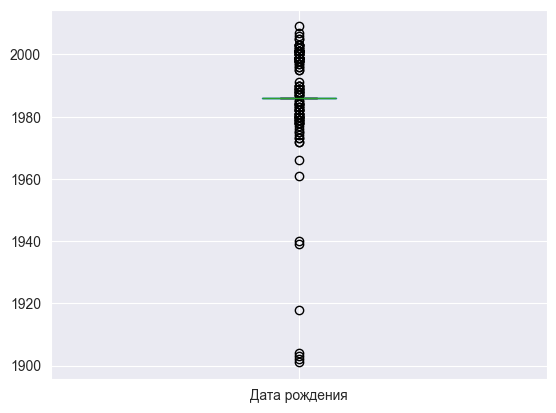

In [35]:
df.boxplot("–î–∞—Ç–∞ —Ä–æ–∂–¥–µ–Ω–∏—è")

<Axes: >

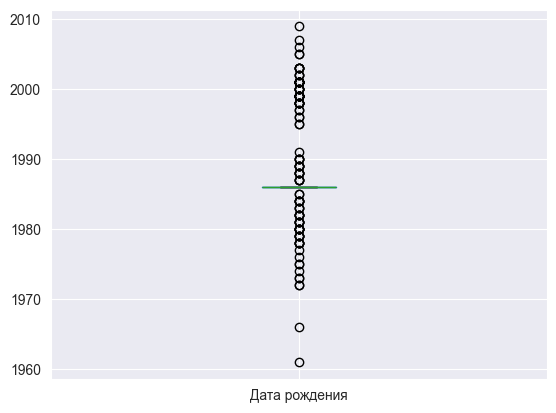

In [36]:
# –≠—Ç–æ—Ç –∫–æ–¥ —É—Å—Ç–∞–Ω–∞–≤–ª–∏–≤–∞–µ—Ç –∑–Ω–∞—á–µ–Ω–∏–µ None –¥–ª—è –≤—Å–µ—Ö –∑–Ω–∞—á–µ–Ω–∏–π –≤ —Å—Ç–æ–ª–±—Ü–µ "–î–∞—Ç–∞ —Ä–æ–∂–¥–µ–Ω–∏—è", –∫–æ—Ç–æ—Ä—ã–µ –º–µ–Ω—å—à–µ 1960 –≥–æ–¥–∞.
df.loc[df["–î–∞—Ç–∞ —Ä–æ–∂–¥–µ–Ω–∏—è"] < 1960, "–î–∞—Ç–∞ —Ä–æ–∂–¥–µ–Ω–∏—è"] = None

df.boxplot(column="–î–∞—Ç–∞ —Ä–æ–∂–¥–µ–Ω–∏—è")

–†–∞—Å—Å—á–∏—Ç—ã–≤–∞–µ–º –≤–æ–∑—Ä–∞—Å—Ç –Ω–∞ –æ—Å–Ω–æ–≤–µ –≥–æ–¥–∞ —Ä–æ–∂–¥–µ–Ω–∏—è –∏ –∞–Ω–∞–ª–∏–∑–∏—Ä—É–µ–º —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –≤–æ–∑—Ä–∞—Å—Ç–∞ —Å—Ä–µ–¥–∏ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π —á–µ—Ä–µ–∑ –≥—Ä–∞—Ñ–∏–∫–∏ –ø–ª–æ—Ç–Ω–æ—Å—Ç–∏ –∏ —è—â–∏–∫ —Å —É—Å–∞–º–∏. –û–±—Ä–∞–±–∞—Ç—ã–≤–∞–µ–º –ø—Ä–æ–ø—É—Å–∫–∏, –∑–∞–º–µ–Ω—è—è –∏—Ö –Ω–∞ –Ω—É–ª–∏ –∏–ª–∏ –¥—Ä—É–≥–∏–µ –∑–Ω–∞—á–∏–º—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è.

In [37]:
current_year = 2024
df["–í–æ–∑—Ä–∞—Å—Ç"] = current_year - df["–î–∞—Ç–∞ —Ä–æ–∂–¥–µ–Ω–∏—è"]

# df = df.rename(columns={"–î–∞—Ç–∞ —Ä–æ–∂–¥–µ–Ω–∏—è": "–í–æ–∑—Ä–∞—Å—Ç"})

# df.boxplot(column="–í–æ–∑—Ä–∞—Å—Ç")

/var/folders/p7/ftvgtpd17gn8nl3x825cfq8m0000gn/T/ipykernel_5391/2861291115.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df["–í–æ–∑—Ä–∞—Å—Ç"], shade=True, ax=axes[0])


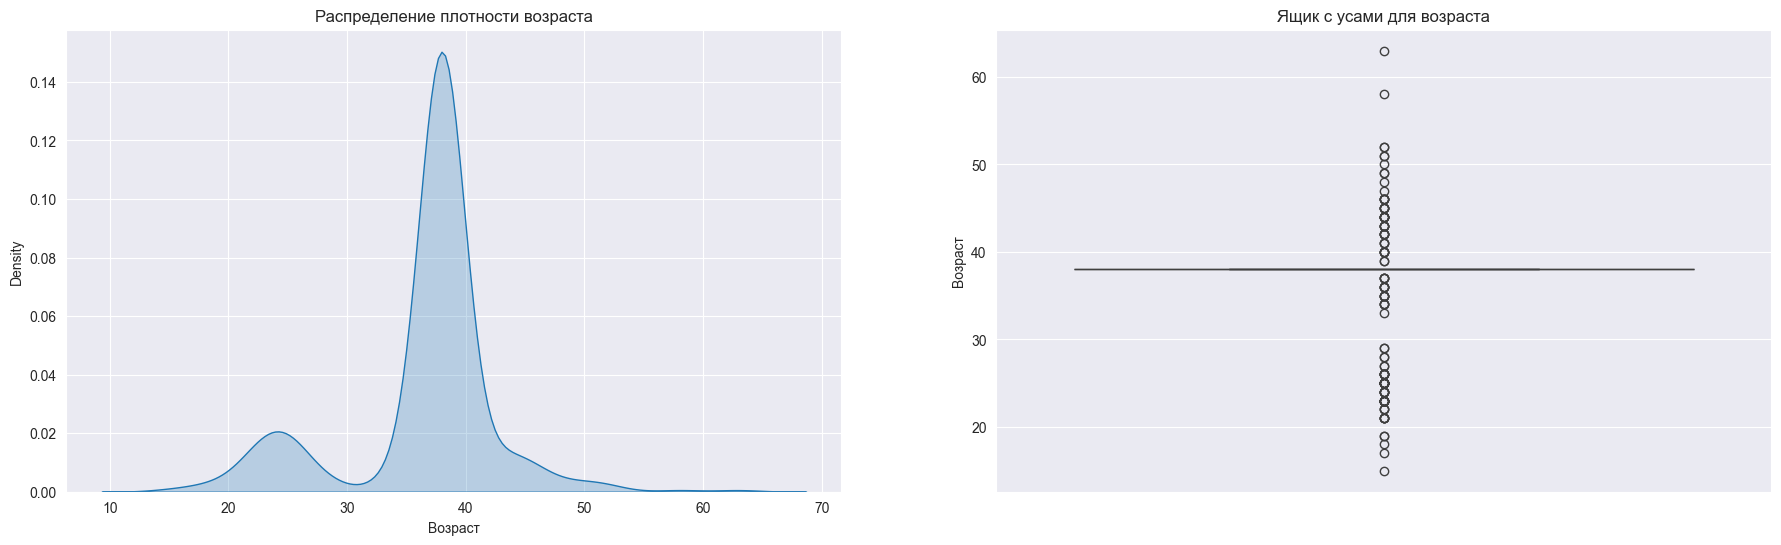

In [38]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(22, 6))

sns.kdeplot(df["–í–æ–∑—Ä–∞—Å—Ç"], shade=True, ax=axes[0])
axes[0].set_title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ø–ª–æ—Ç–Ω–æ—Å—Ç–∏ –≤–æ–∑—Ä–∞—Å—Ç–∞')

sns.boxplot(y=df["–í–æ–∑—Ä–∞—Å—Ç"], ax=axes[1])
axes[1].set_title('–Ø—â–∏–∫ —Å —É—Å–∞–º–∏ –¥–ª—è –≤–æ–∑—Ä–∞—Å—Ç–∞')

plt.show()

In [39]:
# –í—ã–≤–æ–¥–∏–º –ø—Ä–æ—Ü–µ–Ω—Ç –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π

missing_percentage = df["–í–æ–∑—Ä–∞—Å—Ç"].isnull().sum() / df.shape[0] * 100
print(f'–ü—Ä–æ—Ü–µ–Ω—Ç –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π –≤ –∫–æ–ª–æ–Ω–∫–µ "–í–æ–∑—Ä–∞—Å—Ç" : {missing_percentage}')


–ü—Ä–æ—Ü–µ–Ω—Ç –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π –≤ –∫–æ–ª–æ–Ω–∫–µ "–í–æ–∑—Ä–∞—Å—Ç" : 1.7500000000000002


In [40]:
df["–í–æ–∑—Ä–∞—Å—Ç"].fillna(0, inplace=True)

df.head()

/var/folders/p7/ftvgtpd17gn8nl3x825cfq8m0000gn/T/ipykernel_5391/4047274334.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["–í–æ–∑—Ä–∞—Å—Ç"].fillna(0, inplace=True)


id  –ï—Å—Ç—å –Ω–æ–º–µ—Ä  –ü–æ–¥–ø–∏—Å—á–∏–∫–∏  –û–±—â–∏–µ –¥—Ä—É–∑—å—è          –†–æ–¥–Ω–æ–π –≥–æ—Ä–æ–¥  \
0    800367         1.0       741.0           2.0  –ò—Ä–ø–µ–Ω—å –ö–∏–µ–≤—Å–∫–∞—è –æ–±–ª.   
1   3677059         1.0       309.0           3.0                   NaN   
2   5243790         1.0       703.0           3.0       Red Blue Moscow   
3   8888273         1.0         NaN           0.0                   NaN   
4  10738440         1.0       530.0           1.0                   NaN   

                                             –ü–æ–∑–∏—Ü–∏—è  \
0  {'langs': ['–†—É—Å—Å–∫–∏–π'], 'langs_full': [{'id': 0...   
1  {'alcohol': 0, 'inspired_by': '', 'life_main':...   
2  {'alcohol': 0, 'inspired_by': '', 'langs': ['–†...   
3                                                NaN   
4                                                NaN   

                                                –í–£–ó—ã  \
0  [{'city': 314, 'country': 0, 'id': 10637, 'nam...   
1  [{'city': 1, 'country': 1, 'id': 348, 'name': ...   
2  [{'city': 1, 'country': 1, 'education_form': '...   
3                                                NaN   
4                                                NaN   

                                               –®–∫–æ–ª—ã  –ü–æ–ª        –ò–º—è  –§–∞–º–∏–ª–∏—è  \
0                                                 []    2    –í–∏—Ç–∞–ª–∏–π  –ß–æ–±–æ—Ç–æ–∫   
1  [{'city': 625, 'class': '', 'class_id': 0, 'co...    1  –ê–Ω–∞—Å—Ç–∞—Å–∏—è   –ú–µ—Ö–æ–≤–∞   
2  [{'city': 1, 'class': '–±', 'class_id': 2, 'cou...    2    –î–º–∏—Ç—Ä–∏–π    –§–µ–¥–∏–Ω   
3                                                NaN    2    –ï–≤–≥–µ–Ω–∏–π  –í—ã—Å–æ–∫–æ–≤   
4                                                NaN    2     –ù–∏–∫–∏—Ç–∞    –ì–∞–ø–æ–Ω   

   –î–æ—Å—Ç—É–ø –∫ –∑–∞–∫—Ä—ã—Ç–æ–º—É –ø—Ä–æ—Ñ–∏–ª—é  –ó–∞–∫—Ä—ã—Ç—ã–π –ø—Ä–æ—Ñ–∏–ª—å  –î–∞—Ç–∞ —Ä–æ–∂–¥–µ–Ω–∏—è  \
0                        True             False         1986.0   
1                        True             False         1986.0   
2                        True             False         1986.0   
3                        True              True         1986.0   
4                        True             False         1999.0   

                         –°—Ç—Ä–∞–Ω–∞ –ù–µ–∞–∫—Ç–∏–≤–Ω–∞—è —Å—Ç—Ä–∞–Ω–∏—Ü–∞  \
0                           NaN                 NaN   
1  {'id': 1, 'title': '–†–æ—Å—Å–∏—è'}                 NaN   
2  {'id': 1, 'title': '–†–æ—Å—Å–∏—è'}                 NaN   
3  {'id': 1, 'title': '–†–æ—Å—Å–∏—è'}                 NaN   
4  {'id': 1, 'title': '–†–æ—Å—Å–∏—è'}                 NaN   

                                              –ì—Ä—É–ø–ø—ã  \
0                                                NaN   
1  [{"id": 211232966, "description": "\u2022 \u04...   
2  [{"id": 23693281, "description": "\u0423\u0436...   
3  [{"id": 42923159, "description": "\u0412 2011 ...   
4  [{"id": 211835756, "description": "\u00ab\u041...   

                                            –ü–æ–¥–ø–∏—Å–∫–∏  –í–æ–∑—Ä–∞—Å—Ç  
0  [{"id": 219254113, "description": "\u0420\u043...     38.0  
1  [{"id": 211232966, "description": "\u2022 \u04...     38.0  
2  [{"id": 218184104, "description": "\u0410\u043...     38.0  
3  [{"id": 42923159, "description": "\u0412 2011 ...     38.0  
4  [{"id": 85251453, "description": "\u041d\u0435...     25.0

In [41]:
df.drop(columns=["–î–∞—Ç–∞ —Ä–æ–∂–¥–µ–Ω–∏—è"], inplace=True)

In [42]:
df

id  –ï—Å—Ç—å –Ω–æ–º–µ—Ä  –ü–æ–¥–ø–∏—Å—á–∏–∫–∏  –û–±—â–∏–µ –¥—Ä—É–∑—å—è  \
0      800367         1.0       741.0           2.0   
1     3677059         1.0       309.0           3.0   
2     5243790         1.0       703.0           3.0   
3     8888273         1.0         NaN           0.0   
4    10738440         1.0       530.0           1.0   
..        ...         ...         ...           ...   
395   1679360         1.0       795.0           1.0   
396   1685737         1.0      4384.0           1.0   
397   1688008         1.0      1402.0           1.0   
398   1703036         1.0       407.0           1.0   
399   1724359         1.0      2170.0           1.0   

                                –†–æ–¥–Ω–æ–π –≥–æ—Ä–æ–¥  \
0                       –ò—Ä–ø–µ–Ω—å –ö–∏–µ–≤—Å–∫–∞—è –æ–±–ª.   
1                                        NaN   
2                            Red Blue Moscow   
3                                        NaN   
4                                        NaN   
..                                       ...   
395                              –°–µ–≤–∞—Å—Ç–æ–ø–æ–ª—å   
396  –õ—É—á—à–∏–π –≤ –º–∏—Ä–µ –≥–æ—Ä–æ–¥ - –≥–æ—Ä–æ–¥ –Ω–∞ –ù–µ–≤–µ!)))   
397                                      –°–ü–±   
398                   –ö–∞–∑–∞–Ω—å-–°–∞–Ω–∫—Ç-–ü–µ—Ç–µ—Ä–±—É—Ä–≥   
399                                      NaN   

                                               –ü–æ–∑–∏—Ü–∏—è  \
0    {'langs': ['–†—É—Å—Å–∫–∏–π'], 'langs_full': [{'id': 0...   
1    {'alcohol': 0, 'inspired_by': '', 'life_main':...   
2    {'alcohol': 0, 'inspired_by': '', 'langs': ['–†...   
3                                                  NaN   
4                                                  NaN   
..                                                 ...   
395  {'alcohol': 0, 'inspired_by': '', 'langs': ['–†...   
396  {'alcohol': 0, 'inspired_by': '', 'langs': ['–†...   
397  {'alcohol': 0, 'inspired_by': '', 'langs': ['–†...   
398        {'religion': '–†–µ–ª–∏–≥–∏—è - –æ–ø–∏—É–º –¥–ª—è –Ω–∞—Ä–æ–¥–∞!'}   
399                                                NaN   

                                                  –í–£–ó—ã  \
0    [{'city': 314, 'country': 0, 'id': 10637, 'nam...   
1    [{'city': 1, 'country': 1, 'id': 348, 'name': ...   
2    [{'city': 1, 'country': 1, 'education_form': '...   
3                                                  NaN   
4                                                  NaN   
..                                                 ...   
395  [{'chair': 70867, 'chair_name': '–ò–Ω—Ñ–æ—Ä–º–∞—Ü–∏–æ–Ω–Ω—ã...   
396  [{'chair': 1805223, 'chair_name': '–†–µ–∂–∏—Å—Å—É—Ä—ã –∏...   
397  [{'chair': 64528, 'chair_name': '–ê–≤—Ç–æ–º–∞—Ç–∏–∑–∞—Ü–∏–∏...   
398                                                 []   
399                                                NaN   

                                                 –®–∫–æ–ª—ã  –ü–æ–ª        –ò–º—è  \
0                                                   []    2    –í–∏—Ç–∞–ª–∏–π   
1    [{'city': 625, 'class': '', 'class_id': 0, 'co...    1  –ê–Ω–∞—Å—Ç–∞—Å–∏—è   
2    [{'city': 1, 'class': '–±', 'class_id': 2, 'cou...    2    –î–º–∏—Ç—Ä–∏–π   
3                                                  NaN    2    –ï–≤–≥–µ–Ω–∏–π   
4                                                  NaN    2     –ù–∏–∫–∏—Ç–∞   
..                                                 ...  ...        ...   
395  [{'city': 185, 'class': '–∞', 'class_id': 1, 'c...    2  –ê–ª–µ–∫—Å–∞–Ω–¥—Ä   
396                                                 []    1      –û–ª—å–≥–∞   
397  [{'city': 87, 'class': '–≤', 'class_id': 3, 'co...    1      –ò—Ä–∏–Ω–∞   
398                                                 []    2      –ê–π–¥–∞—Ä   
399                                                NaN    2     –ê–Ω–¥—Ä–µ–π   

         –§–∞–º–∏–ª–∏—è  –î–æ—Å—Ç—É–ø –∫ –∑–∞–∫—Ä—ã—Ç–æ–º—É –ø—Ä–æ—Ñ–∏–ª—é  –ó–∞–∫—Ä—ã—Ç—ã–π –ø—Ä–æ—Ñ–∏–ª—å  \
0        –ß–æ–±–æ—Ç–æ–∫                        True             False   
1         –ú–µ—Ö–æ–≤–∞      

–ò—Å–ø—Ä–∞–≤–ª—è–µ–º –∏ –∞–Ω–∞–ª–∏–∑–∏—Ä—É–µ–º –¥–∞–Ω–Ω—ã–µ –æ —Å—Ç—Ä–∞–Ω–µ. –ó–∞–º–µ–Ω—è–µ–º –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã–µ –∏ –Ω–µ–∫–æ—Ä—Ä–µ–∫—Ç–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è, —É–¥–∞–ª—è–µ–º –Ω–µ–Ω—É–∂–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ, —á—Ç–æ–±—ã —É–ø—Ä–æ—Å—Ç–∏—Ç—å –º–æ–¥–µ–ª—å –¥–∞–Ω–Ω—ã—Ö

In [43]:
df['–°—Ç—Ä–∞–Ω–∞'] = df['–°—Ç—Ä–∞–Ω–∞'].fillna('{"id":-1,"title":null}').apply(lambda x: json.loads(x.replace("'", '"'))['title'])
df

id  –ï—Å—Ç—å –Ω–æ–º–µ—Ä  –ü–æ–¥–ø–∏—Å—á–∏–∫–∏  –û–±—â–∏–µ –¥—Ä—É–∑—å—è  \
0      800367         1.0       741.0           2.0   
1     3677059         1.0       309.0           3.0   
2     5243790         1.0       703.0           3.0   
3     8888273         1.0         NaN           0.0   
4    10738440         1.0       530.0           1.0   
..        ...         ...         ...           ...   
395   1679360         1.0       795.0           1.0   
396   1685737         1.0      4384.0           1.0   
397   1688008         1.0      1402.0           1.0   
398   1703036         1.0       407.0           1.0   
399   1724359         1.0      2170.0           1.0   

                                –†–æ–¥–Ω–æ–π –≥–æ—Ä–æ–¥  \
0                       –ò—Ä–ø–µ–Ω—å –ö–∏–µ–≤—Å–∫–∞—è –æ–±–ª.   
1                                        NaN   
2                            Red Blue Moscow   
3                                        NaN   
4                                        NaN   
..                                       ...   
395                              –°–µ–≤–∞—Å—Ç–æ–ø–æ–ª—å   
396  –õ—É—á—à–∏–π –≤ –º–∏—Ä–µ –≥–æ—Ä–æ–¥ - –≥–æ—Ä–æ–¥ –Ω–∞ –ù–µ–≤–µ!)))   
397                                      –°–ü–±   
398                   –ö–∞–∑–∞–Ω—å-–°–∞–Ω–∫—Ç-–ü–µ—Ç–µ—Ä–±—É—Ä–≥   
399                                      NaN   

                                               –ü–æ–∑–∏—Ü–∏—è  \
0    {'langs': ['–†—É—Å—Å–∫–∏–π'], 'langs_full': [{'id': 0...   
1    {'alcohol': 0, 'inspired_by': '', 'life_main':...   
2    {'alcohol': 0, 'inspired_by': '', 'langs': ['–†...   
3                                                  NaN   
4                                                  NaN   
..                                                 ...   
395  {'alcohol': 0, 'inspired_by': '', 'langs': ['–†...   
396  {'alcohol': 0, 'inspired_by': '', 'langs': ['–†...   
397  {'alcohol': 0, 'inspired_by': '', 'langs': ['–†...   
398        {'religion': '–†–µ–ª–∏–≥–∏—è - –æ–ø–∏—É–º –¥–ª—è –Ω–∞—Ä–æ–¥–∞!'}   
399                                                NaN   

                                                  –í–£–ó—ã  \
0    [{'city': 314, 'country': 0, 'id': 10637, 'nam...   
1    [{'city': 1, 'country': 1, 'id': 348, 'name': ...   
2    [{'city': 1, 'country': 1, 'education_form': '...   
3                                                  NaN   
4                                                  NaN   
..                                                 ...   
395  [{'chair': 70867, 'chair_name': '–ò–Ω—Ñ–æ—Ä–º–∞—Ü–∏–æ–Ω–Ω—ã...   
396  [{'chair': 1805223, 'chair_name': '–†–µ–∂–∏—Å—Å—É—Ä—ã –∏...   
397  [{'chair': 64528, 'chair_name': '–ê–≤—Ç–æ–º–∞—Ç–∏–∑–∞—Ü–∏–∏...   
398                                                 []   
399                                                NaN   

                                                 –®–∫–æ–ª—ã  –ü–æ–ª        –ò–º—è  \
0                                                   []    2    –í–∏—Ç–∞–ª–∏–π   
1    [{'city': 625, 'class': '', 'class_id': 0, 'co...    1  –ê–Ω–∞—Å—Ç–∞—Å–∏—è   
2    [{'city': 1, 'class': '–±', 'class_id': 2, 'cou...    2    –î–º–∏—Ç—Ä–∏–π   
3                                                  NaN    2    –ï–≤–≥–µ–Ω–∏–π   
4                                                  NaN    2     –ù–∏–∫–∏—Ç–∞   
..                                                 ...  ...        ...   
395  [{'city': 185, 'class': '–∞', 'class_id': 1, 'c...    2  –ê–ª–µ–∫—Å–∞–Ω–¥—Ä   
396                                                 []    1      –û–ª—å–≥–∞   
397  [{'city': 87, 'class': '–≤', 'class_id': 3, 'co...    1      –ò—Ä–∏–Ω–∞   
398                                                 []    2      –ê–π–¥–∞—Ä   
399                                                NaN    2     –ê–Ω–¥—Ä–µ–π   

         –§–∞–º–∏–ª–∏—è  –î–æ—Å—Ç—É–ø –∫ –∑–∞–∫—Ä—ã—Ç–æ–º—É –ø—Ä–æ—Ñ–∏–ª—é  –ó–∞–∫—Ä—ã—Ç—ã–π –ø—Ä–æ—Ñ–∏–ª—å  –°—Ç—Ä–∞–Ω–∞  \
0        –ß–æ–±–æ—Ç–æ–∫                        True             False    None   
1     

In [44]:
df['–°—Ç—Ä–∞–Ω–∞'].value_counts(dropna=False)

–°—Ç—Ä–∞–Ω–∞
–†–æ—Å—Å–∏—è       331
None          53
–°–®–ê            3
–°–µ—Ä–±–∏—è         2
–ë–µ–ª–∞—Ä—É—Å—å       2
–®–≤–µ—Ü–∏—è         1
–ú–æ–ª–¥–æ–≤–∞        1
–í–µ–Ω–≥—Ä–∏—è        1
–ê–≤—Å—Ç—Ä–∞–ª–∏—è      1
–ù–∏—É—ç           1
–ò–æ—Ä–¥–∞–Ω–∏—è       1
–ü–æ–ª—å—à–∞         1
–ë—Ä–∞–∑–∏–ª–∏—è       1
–ì–µ—Ä–º–∞–Ω–∏—è       1
Name: count, dtype: int64

In [45]:
df.drop(columns=['–°—Ç—Ä–∞–Ω–∞'], inplace=True)

df.head()

id  –ï—Å—Ç—å –Ω–æ–º–µ—Ä  –ü–æ–¥–ø–∏—Å—á–∏–∫–∏  –û–±—â–∏–µ –¥—Ä—É–∑—å—è          –†–æ–¥–Ω–æ–π –≥–æ—Ä–æ–¥  \
0    800367         1.0       741.0           2.0  –ò—Ä–ø–µ–Ω—å –ö–∏–µ–≤—Å–∫–∞—è –æ–±–ª.   
1   3677059         1.0       309.0           3.0                   NaN   
2   5243790         1.0       703.0           3.0       Red Blue Moscow   
3   8888273         1.0         NaN           0.0                   NaN   
4  10738440         1.0       530.0           1.0                   NaN   

                                             –ü–æ–∑–∏—Ü–∏—è  \
0  {'langs': ['–†—É—Å—Å–∫–∏–π'], 'langs_full': [{'id': 0...   
1  {'alcohol': 0, 'inspired_by': '', 'life_main':...   
2  {'alcohol': 0, 'inspired_by': '', 'langs': ['–†...   
3                                                NaN   
4                                                NaN   

                                                –í–£–ó—ã  \
0  [{'city': 314, 'country': 0, 'id': 10637, 'nam...   
1  [{'city': 1, 'country': 1, 'id': 348, 'name': ...   
2  [{'city': 1, 'country': 1, 'education_form': '...   
3                                                NaN   
4                                                NaN   

                                               –®–∫–æ–ª—ã  –ü–æ–ª        –ò–º—è  –§–∞–º–∏–ª–∏—è  \
0                                                 []    2    –í–∏—Ç–∞–ª–∏–π  –ß–æ–±–æ—Ç–æ–∫   
1  [{'city': 625, 'class': '', 'class_id': 0, 'co...    1  –ê–Ω–∞—Å—Ç–∞—Å–∏—è   –ú–µ—Ö–æ–≤–∞   
2  [{'city': 1, 'class': '–±', 'class_id': 2, 'cou...    2    –î–º–∏—Ç—Ä–∏–π    –§–µ–¥–∏–Ω   
3                                                NaN    2    –ï–≤–≥–µ–Ω–∏–π  –í—ã—Å–æ–∫–æ–≤   
4                                                NaN    2     –ù–∏–∫–∏—Ç–∞    –ì–∞–ø–æ–Ω   

   –î–æ—Å—Ç—É–ø –∫ –∑–∞–∫—Ä—ã—Ç–æ–º—É –ø—Ä–æ—Ñ–∏–ª—é  –ó–∞–∫—Ä—ã—Ç—ã–π –ø—Ä–æ—Ñ–∏–ª—å –ù–µ–∞–∫—Ç–∏–≤–Ω–∞—è —Å—Ç—Ä–∞–Ω–∏—Ü–∞  \
0                        True             False                 NaN   
1                        True             False                 NaN   
2                        True             False                 NaN   
3                        True              True                 NaN   
4                        True             False                 NaN   

                                              –ì—Ä—É–ø–ø—ã  \
0                                                NaN   
1  [{"id": 211232966, "description": "\u2022 \u04...   
2  [{"id": 23693281, "description": "\u0423\u0436...   
3  [{"id": 42923159, "description": "\u0412 2011 ...   
4  [{"id": 211835756, "description": "\u00ab\u041...   

                                            –ü–æ–¥–ø–∏—Å–∫–∏  –í–æ–∑—Ä–∞—Å—Ç  
0  [{"id": 219254113, "description": "\u0420\u043...     38.0  
1  [{"id": 211232966, "description": "\u2022 \u04...     38.0  
2  [{"id": 218184104, "description": "\u0410\u043...     38.0  
3  [{"id": 42923159, "description": "\u0412 2011 ...     38.0  
4  [{"id": 85251453, "description": "\u041d\u0435...     25.0

–£–¥–∞–ª—è–µ–º –¥–∞–Ω–Ω—ã–µ –æ –Ω–∞–ª–∏—á–∏–∏ –Ω–æ–º–µ—Ä–∞ —Ç–µ–ª–µ—Ñ–æ–Ω–∞ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è, —Ç–∞–∫ –∫–∞–∫ –æ–Ω–∏ –º–æ–≥—É—Ç –±—ã—Ç—å –Ω–µ —Ä–µ–ª–µ–≤–∞–Ω—Ç–Ω—ã –¥–ª—è –¥–∞–ª—å–Ω–µ–π—à–µ–≥–æ –∞–Ω–∞–ª–∏–∑–∞.

In [46]:
df['–ï—Å—Ç—å –Ω–æ–º–µ—Ä'].value_counts(dropna=False)

–ï—Å—Ç—å –Ω–æ–º–µ—Ä
1.0    385
0.0     11
NaN      4
Name: count, dtype: int64

In [47]:
df.drop(columns=['–ï—Å—Ç—å –Ω–æ–º–µ—Ä'], inplace=True)

df.head()

id  –ü–æ–¥–ø–∏—Å—á–∏–∫–∏  –û–±—â–∏–µ –¥—Ä—É–∑—å—è          –†–æ–¥–Ω–æ–π –≥–æ—Ä–æ–¥  \
0    800367       741.0           2.0  –ò—Ä–ø–µ–Ω—å –ö–∏–µ–≤—Å–∫–∞—è –æ–±–ª.   
1   3677059       309.0           3.0                   NaN   
2   5243790       703.0           3.0       Red Blue Moscow   
3   8888273         NaN           0.0                   NaN   
4  10738440       530.0           1.0                   NaN   

                                             –ü–æ–∑–∏—Ü–∏—è  \
0  {'langs': ['–†—É—Å—Å–∫–∏–π'], 'langs_full': [{'id': 0...   
1  {'alcohol': 0, 'inspired_by': '', 'life_main':...   
2  {'alcohol': 0, 'inspired_by': '', 'langs': ['–†...   
3                                                NaN   
4                                                NaN   

                                                –í–£–ó—ã  \
0  [{'city': 314, 'country': 0, 'id': 10637, 'nam...   
1  [{'city': 1, 'country': 1, 'id': 348, 'name': ...   
2  [{'city': 1, 'country': 1, 'education_form': '...   
3                                                NaN   
4                                                NaN   

                                               –®–∫–æ–ª—ã  –ü–æ–ª        –ò–º—è  –§–∞–º–∏–ª–∏—è  \
0                                                 []    2    –í–∏—Ç–∞–ª–∏–π  –ß–æ–±–æ—Ç–æ–∫   
1  [{'city': 625, 'class': '', 'class_id': 0, 'co...    1  –ê–Ω–∞—Å—Ç–∞—Å–∏—è   –ú–µ—Ö–æ–≤–∞   
2  [{'city': 1, 'class': '–±', 'class_id': 2, 'cou...    2    –î–º–∏—Ç—Ä–∏–π    –§–µ–¥–∏–Ω   
3                                                NaN    2    –ï–≤–≥–µ–Ω–∏–π  –í—ã—Å–æ–∫–æ–≤   
4                                                NaN    2     –ù–∏–∫–∏—Ç–∞    –ì–∞–ø–æ–Ω   

   –î–æ—Å—Ç—É–ø –∫ –∑–∞–∫—Ä—ã—Ç–æ–º—É –ø—Ä–æ—Ñ–∏–ª—é  –ó–∞–∫—Ä—ã—Ç—ã–π –ø—Ä–æ—Ñ–∏–ª—å –ù–µ–∞–∫—Ç–∏–≤–Ω–∞—è —Å—Ç—Ä–∞–Ω–∏—Ü–∞  \
0                        True             False                 NaN   
1                        True             False                 NaN   
2                        True             False                 NaN   
3                        True              True                 NaN   
4                        True             False                 NaN   

                                              –ì—Ä—É–ø–ø—ã  \
0                                                NaN   
1  [{"id": 211232966, "description": "\u2022 \u04...   
2  [{"id": 23693281, "description": "\u0423\u0436...   
3  [{"id": 42923159, "description": "\u0412 2011 ...   
4  [{"id": 211835756, "description": "\u00ab\u041...   

                                            –ü–æ–¥–ø–∏—Å–∫–∏  –í–æ–∑—Ä–∞—Å—Ç  
0  [{"id": 219254113, "description": "\u0420\u043...     38.0  
1  [{"id": 211232966, "description": "\u2022 \u04...     38.0  
2  [{"id": 218184104, "description": "\u0410\u043...     38.0  
3  [{"id": 42923159, "description": "\u0412 2011 ...     38.0  
4  [{"id": 85251453, "description": "\u041d\u0435...     25.0

–ê–Ω–∞–ª–∏–∑–∏—Ä—É–µ–º –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø–æ–¥–ø–∏—Å—á–∏–∫–æ–≤ —á–µ—Ä–µ–∑ –≥—Ä–∞—Ñ–∏–∫–∏, –∑–∞–ø–æ–ª–Ω—è–µ–º –ø—Ä–æ–ø—É—Å–∫–∏ —Å—Ä–µ–¥–Ω–∏–º –∑–Ω–∞—á–µ–Ω–∏–µ–º –∏ –ø—Ä–µ–æ–±—Ä–∞–∑—É–µ–º –¥–∞–Ω–Ω—ã–µ –≤ —Ü–µ–ª–æ—á–∏—Å–ª–µ–Ω–Ω—ã–π —Ç–∏–ø –¥–ª—è —É–¥–æ–±—Å—Ç–≤–∞ —Ä–∞–±–æ—Ç—ã.

/var/folders/p7/ftvgtpd17gn8nl3x825cfq8m0000gn/T/ipykernel_5391/4100091697.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df["–ü–æ–¥–ø–∏—Å—á–∏–∫–∏"], shade=True, ax=axes[0])


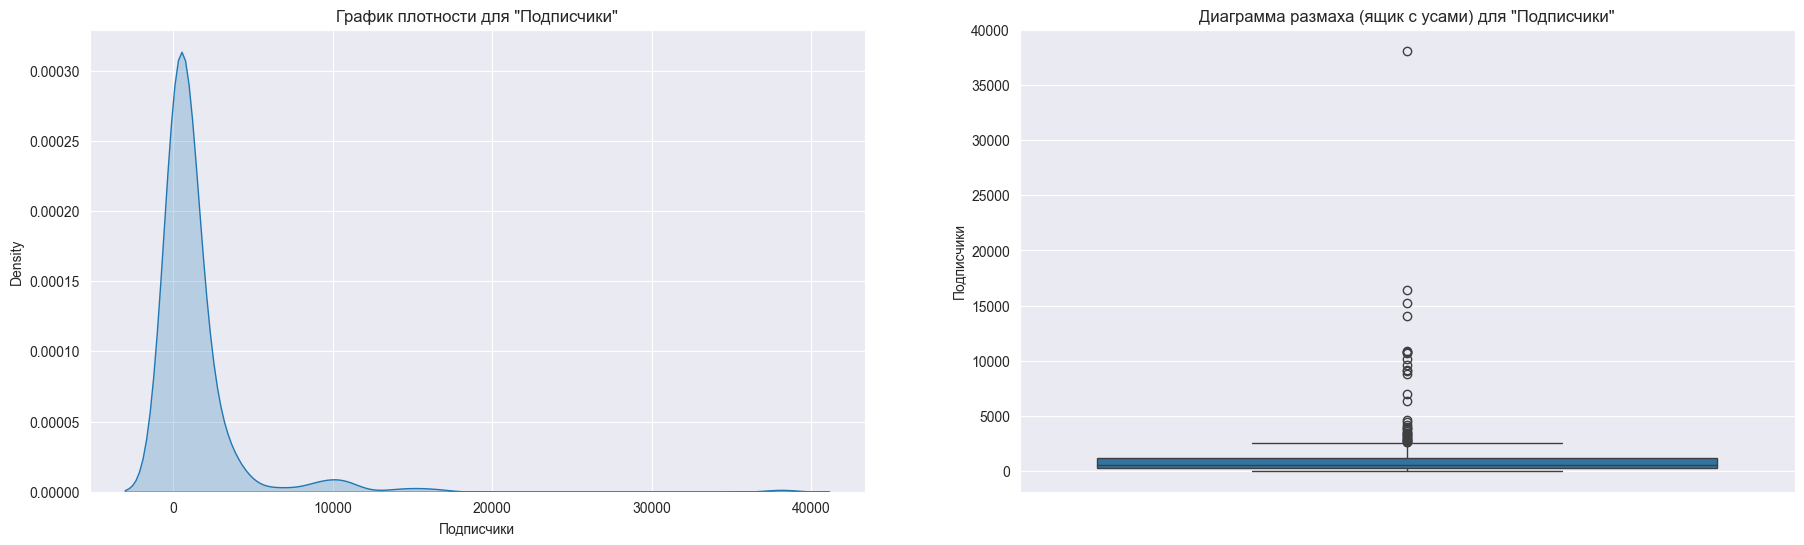

In [48]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(22, 6))

sns.kdeplot(df["–ü–æ–¥–ø–∏—Å—á–∏–∫–∏"], shade=True, ax=axes[0])
axes[0].set_title('–ì—Ä–∞—Ñ–∏–∫ –ø–ª–æ—Ç–Ω–æ—Å—Ç–∏ –¥–ª—è "–ü–æ–¥–ø–∏—Å—á–∏–∫–∏"')

sns.boxplot(y=df["–ü–æ–¥–ø–∏—Å—á–∏–∫–∏"], ax=axes[1])
axes[1].set_title('–î–∏–∞–≥—Ä–∞–º–º–∞ —Ä–∞–∑–º–∞—Ö–∞ (—è—â–∏–∫ —Å —É—Å–∞–º–∏) –¥–ª—è "–ü–æ–¥–ø–∏—Å—á–∏–∫–∏"')

plt.show()

In [49]:
print(f'–î–æ–ª—è –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π: {df["–ü–æ–¥–ø–∏—Å—á–∏–∫–∏"].isnull().sum() / df.shape[0] * 100:.2f}%')

–î–æ–ª—è –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π: 25.00%


In [50]:
# –∑–∞–º–µ–Ω—è–µ–º –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –≤ —Å—Ç–æ–ª–±—Ü–µ "–ü–æ–¥–ø–∏—Å—á–∏–∫–∏" –Ω–∞ —Å—Ä–µ–¥–Ω–µ–µ –∑–Ω–∞—á–µ–Ω–∏–µ —ç—Ç–æ–≥–æ —Å—Ç–æ–ª–±—Ü–∞, –æ–∫—Ä—É–≥–ª–µ–Ω–Ω–æ–µ –¥–æ –±–ª–∏–∂–∞–π—à–µ–≥–æ —Ü–µ–ª–æ–≥–æ —á–∏—Å–ª–∞.
df["–ü–æ–¥–ø–∏—Å—á–∏–∫–∏"].fillna(round(df["–ü–æ–¥–ø–∏—Å—á–∏–∫–∏"].mean()), inplace=True)

df.head()

/var/folders/p7/ftvgtpd17gn8nl3x825cfq8m0000gn/T/ipykernel_5391/1687059111.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["–ü–æ–¥–ø–∏—Å—á–∏–∫–∏"].fillna(round(df["–ü–æ–¥–ø–∏—Å—á–∏–∫–∏"].mean()), inplace=True)


id  –ü–æ–¥–ø–∏—Å—á–∏–∫–∏  –û–±—â–∏–µ –¥—Ä—É–∑—å—è          –†–æ–¥–Ω–æ–π –≥–æ—Ä–æ–¥  \
0    800367       741.0           2.0  –ò—Ä–ø–µ–Ω—å –ö–∏–µ–≤—Å–∫–∞—è –æ–±–ª.   
1   3677059       309.0           3.0                   NaN   
2   5243790       703.0           3.0       Red Blue Moscow   
3   8888273      1389.0           0.0                   NaN   
4  10738440       530.0           1.0                   NaN   

                                             –ü–æ–∑–∏—Ü–∏—è  \
0  {'langs': ['–†—É—Å—Å–∫–∏–π'], 'langs_full': [{'id': 0...   
1  {'alcohol': 0, 'inspired_by': '', 'life_main':...   
2  {'alcohol': 0, 'inspired_by': '', 'langs': ['–†...   
3                                                NaN   
4                                                NaN   

                                                –í–£–ó—ã  \
0  [{'city': 314, 'country': 0, 'id': 10637, 'nam...   
1  [{'city': 1, 'country': 1, 'id': 348, 'name': ...   
2  [{'city': 1, 'country': 1, 'education_form': '...   
3                                                NaN   
4                                                NaN   

                                               –®–∫–æ–ª—ã  –ü–æ–ª        –ò–º—è  –§–∞–º–∏–ª–∏—è  \
0                                                 []    2    –í–∏—Ç–∞–ª–∏–π  –ß–æ–±–æ—Ç–æ–∫   
1  [{'city': 625, 'class': '', 'class_id': 0, 'co...    1  –ê–Ω–∞—Å—Ç–∞—Å–∏—è   –ú–µ—Ö–æ–≤–∞   
2  [{'city': 1, 'class': '–±', 'class_id': 2, 'cou...    2    –î–º–∏—Ç—Ä–∏–π    –§–µ–¥–∏–Ω   
3                                                NaN    2    –ï–≤–≥–µ–Ω–∏–π  –í—ã—Å–æ–∫–æ–≤   
4                                                NaN    2     –ù–∏–∫–∏—Ç–∞    –ì–∞–ø–æ–Ω   

   –î–æ—Å—Ç—É–ø –∫ –∑–∞–∫—Ä—ã—Ç–æ–º—É –ø—Ä–æ—Ñ–∏–ª—é  –ó–∞–∫—Ä—ã—Ç—ã–π –ø—Ä–æ—Ñ–∏–ª—å –ù–µ–∞–∫—Ç–∏–≤–Ω–∞—è —Å—Ç—Ä–∞–Ω–∏—Ü–∞  \
0                        True             False                 NaN   
1                        True             False                 NaN   
2                        True             False                 NaN   
3                        True              True                 NaN   
4                        True             False                 NaN   

                                              –ì—Ä—É–ø–ø—ã  \
0                                                NaN   
1  [{"id": 211232966, "description": "\u2022 \u04...   
2  [{"id": 23693281, "description": "\u0423\u0436...   
3  [{"id": 42923159, "description": "\u0412 2011 ...   
4  [{"id": 211835756, "description": "\u00ab\u041...   

                                            –ü–æ–¥–ø–∏—Å–∫–∏  –í–æ–∑—Ä–∞—Å—Ç  
0  [{"id": 219254113, "description": "\u0420\u043...     38.0  
1  [{"id": 211232966, "description": "\u2022 \u04...     38.0  
2  [{"id": 218184104, "description": "\u0410\u043...     38.0  
3  [{"id": 42923159, "description": "\u0412 2011 ...     38.0  
4  [{"id": 85251453, "description": "\u041d\u0435...     25.0

In [51]:
df['–ü–æ–¥–ø–∏—Å—á–∏–∫–∏'] = df['–ü–æ–¥–ø–∏—Å—á–∏–∫–∏'].astype(int)

df.head()

id  –ü–æ–¥–ø–∏—Å—á–∏–∫–∏  –û–±—â–∏–µ –¥—Ä—É–∑—å—è          –†–æ–¥–Ω–æ–π –≥–æ—Ä–æ–¥  \
0    800367         741           2.0  –ò—Ä–ø–µ–Ω—å –ö–∏–µ–≤—Å–∫–∞—è –æ–±–ª.   
1   3677059         309           3.0                   NaN   
2   5243790         703           3.0       Red Blue Moscow   
3   8888273        1389           0.0                   NaN   
4  10738440         530           1.0                   NaN   

                                             –ü–æ–∑–∏—Ü–∏—è  \
0  {'langs': ['–†—É—Å—Å–∫–∏–π'], 'langs_full': [{'id': 0...   
1  {'alcohol': 0, 'inspired_by': '', 'life_main':...   
2  {'alcohol': 0, 'inspired_by': '', 'langs': ['–†...   
3                                                NaN   
4                                                NaN   

                                                –í–£–ó—ã  \
0  [{'city': 314, 'country': 0, 'id': 10637, 'nam...   
1  [{'city': 1, 'country': 1, 'id': 348, 'name': ...   
2  [{'city': 1, 'country': 1, 'education_form': '...   
3                                                NaN   
4                                                NaN   

                                               –®–∫–æ–ª—ã  –ü–æ–ª        –ò–º—è  –§–∞–º–∏–ª–∏—è  \
0                                                 []    2    –í–∏—Ç–∞–ª–∏–π  –ß–æ–±–æ—Ç–æ–∫   
1  [{'city': 625, 'class': '', 'class_id': 0, 'co...    1  –ê–Ω–∞—Å—Ç–∞—Å–∏—è   –ú–µ—Ö–æ–≤–∞   
2  [{'city': 1, 'class': '–±', 'class_id': 2, 'cou...    2    –î–º–∏—Ç—Ä–∏–π    –§–µ–¥–∏–Ω   
3                                                NaN    2    –ï–≤–≥–µ–Ω–∏–π  –í—ã—Å–æ–∫–æ–≤   
4                                                NaN    2     –ù–∏–∫–∏—Ç–∞    –ì–∞–ø–æ–Ω   

   –î–æ—Å—Ç—É–ø –∫ –∑–∞–∫—Ä—ã—Ç–æ–º—É –ø—Ä–æ—Ñ–∏–ª—é  –ó–∞–∫—Ä—ã—Ç—ã–π –ø—Ä–æ—Ñ–∏–ª—å –ù–µ–∞–∫—Ç–∏–≤–Ω–∞—è —Å—Ç—Ä–∞–Ω–∏—Ü–∞  \
0                        True             False                 NaN   
1                        True             False                 NaN   
2                        True             False                 NaN   
3                        True              True                 NaN   
4                        True             False                 NaN   

                                              –ì—Ä—É–ø–ø—ã  \
0                                                NaN   
1  [{"id": 211232966, "description": "\u2022 \u04...   
2  [{"id": 23693281, "description": "\u0423\u0436...   
3  [{"id": 42923159, "description": "\u0412 2011 ...   
4  [{"id": 211835756, "description": "\u00ab\u041...   

                                            –ü–æ–¥–ø–∏—Å–∫–∏  –í–æ–∑—Ä–∞—Å—Ç  
0  [{"id": 219254113, "description": "\u0420\u043...     38.0  
1  [{"id": 211232966, "description": "\u2022 \u04...     38.0  
2  [{"id": 218184104, "description": "\u0410\u043...     38.0  
3  [{"id": 42923159, "description": "\u0412 2011 ...     38.0  
4  [{"id": 85251453, "description": "\u041d\u0435...     25.0

–ê–Ω–∞–ª–∏–∑–∏—Ä—É–µ–º –∏ –æ–±—Ä–∞–±–∞—Ç—ã–≤–∞–µ–º –¥–∞–Ω–Ω—ã–µ –æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–µ –æ–±—â–∏—Ö –¥—Ä—É–∑–µ–π, —Å—Ç–∞–Ω–¥–∞—Ä—Ç–∏–∑–∏—Ä—É–µ–º –∏ –æ—á–∏—â–∞–µ–º –¥–∞–Ω–Ω—ã–µ –¥–ª—è —Ç–æ—á–Ω–æ—Å—Ç–∏ –ø–æ—Å–ª–µ–¥—É—é—â–∏—Ö –≤—ã—á–∏—Å–ª–µ–Ω–∏–π.

In [52]:
print(f"–ü—Ä–æ—Ü–µ–Ω—Ç –æ—Ç—Å—É—Ç—Å—Ç–≤—É—é—â–∏—Ö –¥–∞–Ω–Ω—ã—Ö: {df['–û–±—â–∏–µ –¥—Ä—É–∑—å—è'].isnull().mean() * 100:.2f}%")

–ü—Ä–æ—Ü–µ–Ω—Ç –æ—Ç—Å—É—Ç—Å—Ç–≤—É—é—â–∏—Ö –¥–∞–Ω–Ω—ã—Ö: 1.00%


In [53]:
df = df.dropna(subset=["–û–±—â–∏–µ –¥—Ä—É–∑—å—è"])

df

id  –ü–æ–¥–ø–∏—Å—á–∏–∫–∏  –û–±—â–∏–µ –¥—Ä—É–∑—å—è  \
0      800367         741           2.0   
1     3677059         309           3.0   
2     5243790         703           3.0   
3     8888273        1389           0.0   
4    10738440         530           1.0   
..        ...         ...           ...   
395   1679360         795           1.0   
396   1685737        4384           1.0   
397   1688008        1402           1.0   
398   1703036         407           1.0   
399   1724359        2170           1.0   

                                –†–æ–¥–Ω–æ–π –≥–æ—Ä–æ–¥  \
0                       –ò—Ä–ø–µ–Ω—å –ö–∏–µ–≤—Å–∫–∞—è –æ–±–ª.   
1                                        NaN   
2                            Red Blue Moscow   
3                                        NaN   
4                                        NaN   
..                                       ...   
395                              –°–µ–≤–∞—Å—Ç–æ–ø–æ–ª—å   
396  –õ—É—á—à–∏–π –≤ –º–∏—Ä–µ –≥–æ—Ä–æ–¥ - –≥–æ—Ä–æ–¥ –Ω–∞ –ù–µ–≤–µ!)))   
397                                      –°–ü–±   
398                   –ö–∞–∑–∞–Ω—å-–°–∞–Ω–∫—Ç-–ü–µ—Ç–µ—Ä–±—É—Ä–≥   
399                                      NaN   

                                               –ü–æ–∑–∏—Ü–∏—è  \
0    {'langs': ['–†—É—Å—Å–∫–∏–π'], 'langs_full': [{'id': 0...   
1    {'alcohol': 0, 'inspired_by': '', 'life_main':...   
2    {'alcohol': 0, 'inspired_by': '', 'langs': ['–†...   
3                                                  NaN   
4                                                  NaN   
..                                                 ...   
395  {'alcohol': 0, 'inspired_by': '', 'langs': ['–†...   
396  {'alcohol': 0, 'inspired_by': '', 'langs': ['–†...   
397  {'alcohol': 0, 'inspired_by': '', 'langs': ['–†...   
398        {'religion': '–†–µ–ª–∏–≥–∏—è - –æ–ø–∏—É–º –¥–ª—è –Ω–∞—Ä–æ–¥–∞!'}   
399                                                NaN   

                                                  –í–£–ó—ã  \
0    [{'city': 314, 'country': 0, 'id': 10637, 'nam...   
1    [{'city': 1, 'country': 1, 'id': 348, 'name': ...   
2    [{'city': 1, 'country': 1, 'education_form': '...   
3                                                  NaN   
4                                                  NaN   
..                                                 ...   
395  [{'chair': 70867, 'chair_name': '–ò–Ω—Ñ–æ—Ä–º–∞—Ü–∏–æ–Ω–Ω—ã...   
396  [{'chair': 1805223, 'chair_name': '–†–µ–∂–∏—Å—Å—É—Ä—ã –∏...   
397  [{'chair': 64528, 'chair_name': '–ê–≤—Ç–æ–º–∞—Ç–∏–∑–∞—Ü–∏–∏...   
398                                                 []   
399                                                NaN   

                                                 –®–∫–æ–ª—ã  –ü–æ–ª        –ò–º—è  \
0                                                   []    2    –í–∏—Ç–∞–ª–∏–π   
1    [{'city': 625, 'class': '', 'class_id': 0, 'co...    1  –ê–Ω–∞—Å—Ç–∞—Å–∏—è   
2    [{'city': 1, 'class': '–±', 'class_id': 2, 'cou...    2    –î–º–∏—Ç—Ä–∏–π   
3                                                  NaN    2    –ï–≤–≥–µ–Ω–∏–π   
4                                                  NaN    2     –ù–∏–∫–∏—Ç–∞   
..                                                 ...  ...        ...   
395  [{'city': 185, 'class': '–∞', 'class_id': 1, 'c...    2  –ê–ª–µ–∫—Å–∞–Ω–¥—Ä   
396                                                 []    1      –û–ª—å–≥–∞   
397  [{'city': 87, 'class': '–≤', 'class_id': 3, 'co...    1      –ò—Ä–∏–Ω–∞   
398                                                 []    2      –ê–π–¥–∞—Ä   
399                                                NaN    2     –ê–Ω–¥—Ä–µ–π   

         –§–∞–º–∏–ª–∏—è  –î–æ—Å—Ç—É–ø –∫ –∑–∞–∫—Ä—ã—Ç–æ–º—É –ø—Ä–æ—Ñ–∏–ª—é  –ó–∞–∫—Ä—ã—Ç—ã–π –ø—Ä–æ—Ñ–∏–ª—å  \
0        –ß–æ–±–æ—Ç–æ–∫                        True             False   
1         –ú–µ—Ö–æ–≤–∞                        True             False   
2          –§–µ–¥–∏–Ω                        True             False   
3        –í—ã—Å–æ–∫–æ–≤               

/var/folders/p7/ftvgtpd17gn8nl3x825cfq8m0000gn/T/ipykernel_5391/3914215938.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df["–û–±—â–∏–µ –¥—Ä—É–∑—å—è"], shade=True, ax=axes[0])


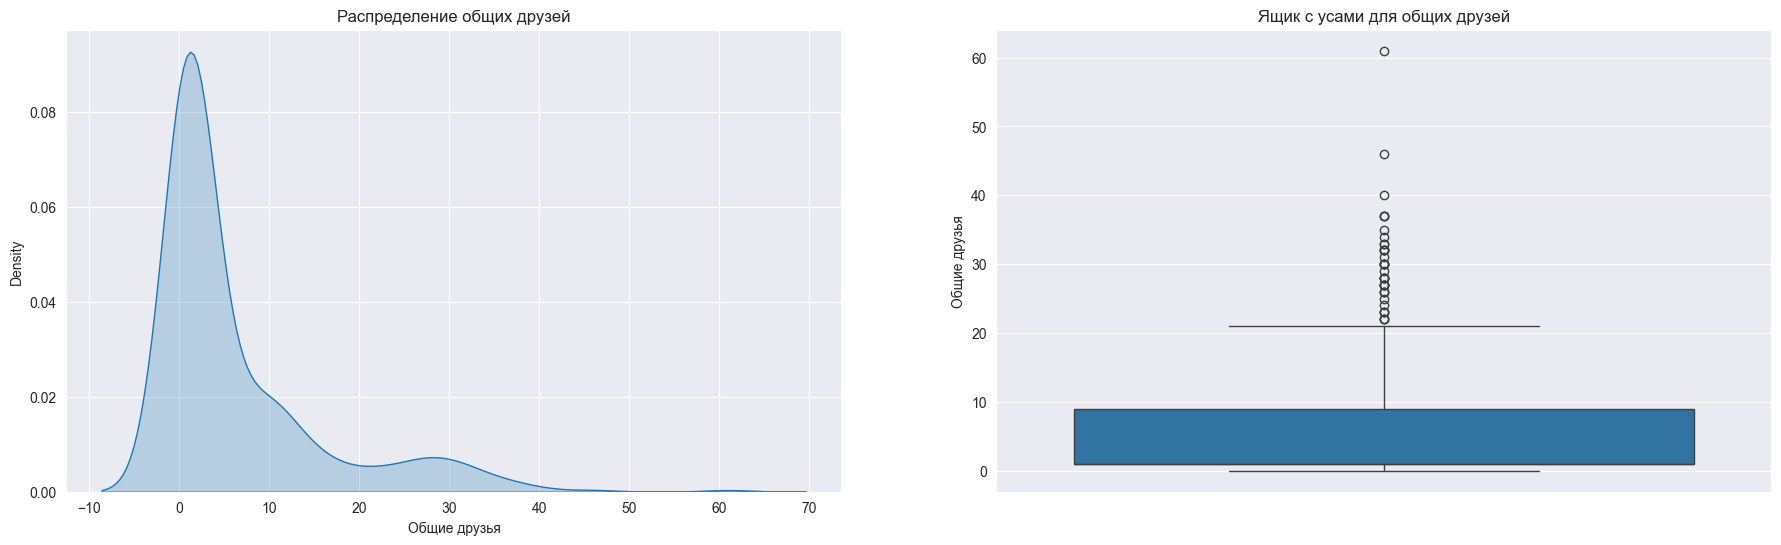

In [54]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(22, 6))

sns.kdeplot(df["–û–±—â–∏–µ –¥—Ä—É–∑—å—è"], shade=True, ax=axes[0])
axes[0].set_title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –æ–±—â–∏—Ö –¥—Ä—É–∑–µ–π')

sns.boxplot(y=df["–û–±—â–∏–µ –¥—Ä—É–∑—å—è"], ax=axes[1])
axes[1].set_title('–Ø—â–∏–∫ —Å —É—Å–∞–º–∏ –¥–ª—è –æ–±—â–∏—Ö –¥—Ä—É–∑–µ–π')

plt.show()

In [55]:
df["–û–±—â–∏–µ –¥—Ä—É–∑—å—è"] = df["–û–±—â–∏–µ –¥—Ä—É–∑—å—è"].astype(int)

df

/var/folders/p7/ftvgtpd17gn8nl3x825cfq8m0000gn/T/ipykernel_5391/589334263.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["–û–±—â–∏–µ –¥—Ä—É–∑—å—è"] = df["–û–±—â–∏–µ –¥—Ä—É–∑—å—è"].astype(int)


id  –ü–æ–¥–ø–∏—Å—á–∏–∫–∏  –û–±—â–∏–µ –¥—Ä—É–∑—å—è  \
0      800367         741             2   
1     3677059         309             3   
2     5243790         703             3   
3     8888273        1389             0   
4    10738440         530             1   
..        ...         ...           ...   
395   1679360         795             1   
396   1685737        4384             1   
397   1688008        1402             1   
398   1703036         407             1   
399   1724359        2170             1   

                                –†–æ–¥–Ω–æ–π –≥–æ—Ä–æ–¥  \
0                       –ò—Ä–ø–µ–Ω—å –ö–∏–µ–≤—Å–∫–∞—è –æ–±–ª.   
1                                        NaN   
2                            Red Blue Moscow   
3                                        NaN   
4                                        NaN   
..                                       ...   
395                              –°–µ–≤–∞—Å—Ç–æ–ø–æ–ª—å   
396  –õ—É—á—à–∏–π –≤ –º–∏—Ä–µ –≥–æ—Ä–æ–¥ - –≥–æ—Ä–æ–¥ –Ω–∞ –ù–µ–≤–µ!)))   
397                                      –°–ü–±   
398                   –ö–∞–∑–∞–Ω—å-–°–∞–Ω–∫—Ç-–ü–µ—Ç–µ—Ä–±—É—Ä–≥   
399                                      NaN   

                                               –ü–æ–∑–∏—Ü–∏—è  \
0    {'langs': ['–†—É—Å—Å–∫–∏–π'], 'langs_full': [{'id': 0...   
1    {'alcohol': 0, 'inspired_by': '', 'life_main':...   
2    {'alcohol': 0, 'inspired_by': '', 'langs': ['–†...   
3                                                  NaN   
4                                                  NaN   
..                                                 ...   
395  {'alcohol': 0, 'inspired_by': '', 'langs': ['–†...   
396  {'alcohol': 0, 'inspired_by': '', 'langs': ['–†...   
397  {'alcohol': 0, 'inspired_by': '', 'langs': ['–†...   
398        {'religion': '–†–µ–ª–∏–≥–∏—è - –æ–ø–∏—É–º –¥–ª—è –Ω–∞—Ä–æ–¥–∞!'}   
399                                                NaN   

                                                  –í–£–ó—ã  \
0    [{'city': 314, 'country': 0, 'id': 10637, 'nam...   
1    [{'city': 1, 'country': 1, 'id': 348, 'name': ...   
2    [{'city': 1, 'country': 1, 'education_form': '...   
3                                                  NaN   
4                                                  NaN   
..                                                 ...   
395  [{'chair': 70867, 'chair_name': '–ò–Ω—Ñ–æ—Ä–º–∞—Ü–∏–æ–Ω–Ω—ã...   
396  [{'chair': 1805223, 'chair_name': '–†–µ–∂–∏—Å—Å—É—Ä—ã –∏...   
397  [{'chair': 64528, 'chair_name': '–ê–≤—Ç–æ–º–∞—Ç–∏–∑–∞—Ü–∏–∏...   
398                                                 []   
399                                                NaN   

                                                 –®–∫–æ–ª—ã  –ü–æ–ª        –ò–º—è  \
0                                                   []    2    –í–∏—Ç–∞–ª–∏–π   
1    [{'city': 625, 'class': '', 'class_id': 0, 'co...    1  –ê–Ω–∞—Å—Ç–∞—Å–∏—è   
2    [{'city': 1, 'class': '–±', 'class_id': 2, 'cou...    2    –î–º–∏—Ç—Ä–∏–π   
3                                                  NaN    2    –ï–≤–≥–µ–Ω–∏–π   
4                                                  NaN    2     –ù–∏–∫–∏—Ç–∞   
..                                                 ...  ...        ...   
395  [{'city': 185, 'class': '–∞', 'class_id': 1, 'c...    2  –ê–ª–µ–∫—Å–∞–Ω–¥—Ä   
396                                                 []    1      –û–ª—å–≥–∞   
397  [{'city': 87, 'class': '–≤', 'class_id': 3, 'co...    1      –ò—Ä–∏–Ω–∞   
398                                                 []    2      –ê–π–¥–∞—Ä   
399                                                NaN    2     –ê–Ω–¥—Ä–µ–π   

         –§–∞–º–∏–ª–∏—è  –î–æ—Å—Ç—É–ø –∫ –∑–∞–∫—Ä—ã—Ç–æ–º—É –ø—Ä–æ—Ñ–∏–ª—é  –ó–∞–∫—Ä—ã—Ç—ã–π –ø—Ä–æ—Ñ–∏–ª—å  \
0        –ß–æ–±–æ—Ç–æ–∫                        True             False   
1         –ú–µ—Ö–æ–≤–∞                        True             False   
2          –§–µ–¥–∏–Ω                        True             False   
3        –í—ã—Å–æ–∫–æ–≤               

–û—á–∏—â–∞–µ–º –∏ –∞–Ω–∞–ª–∏–∑–∏—Ä—É–µ–º –¥–∞–Ω–Ω—ã–µ –æ —Ä–æ–¥–Ω–æ–º –≥–æ—Ä–æ–¥–µ, —É–¥–∞–ª—è—è –Ω–µ—Ä–µ–ª–µ–≤–∞–Ω—Ç–Ω—ã–µ –∏–ª–∏ –Ω–µ–ø–æ–ª–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ.

In [56]:
print(f'–î–æ–ª—è –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π: {df["–†–æ–¥–Ω–æ–π –≥–æ—Ä–æ–¥"].isnull().mean():.2%}')

–î–æ–ª—è –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π: 60.86%


In [57]:
df['–†–æ–¥–Ω–æ–π –≥–æ—Ä–æ–¥'].value_counts(dropna=False)

–†–æ–¥–Ω–æ–π –≥–æ—Ä–æ–¥
NaN                       241
–ú–æ—Å–∫–≤–∞                     44
–°–∞–Ω–∫—Ç-–ü–µ—Ç–µ—Ä–±—É—Ä–≥            21
–õ–µ–Ω–∏–Ω–≥—Ä–∞–¥                   8
–ü–∏—Ç–µ—Ä                       6
                         ... 
–ö—Ä–∞—Å–Ω–æ—è—Ä—Å–∫                  1
–ë—É–≥—É–ª—å–º–∞                    1
—Ä—è–∑–∞–Ω—å                      1
ùîêùî¨ùî∞ùî†ùî¨ùî¥                      1
–ö–∞–∑–∞–Ω—å-–°–∞–Ω–∫—Ç-–ü–µ—Ç–µ—Ä–±—É—Ä–≥      1
Name: count, Length: 72, dtype: int64

In [58]:
condition = df["–†–æ–¥–Ω–æ–π –≥–æ—Ä–æ–¥"].isin(["", "–ú–æ—Å–∫–≤–∞", "–º–æ—Å–∫–≤–∞","ùîêùî¨ùî∞ùî†ùî¨ùî¥","Moscow", "moscow"]) | df["–†–æ–¥–Ω–æ–π –≥–æ—Ä–æ–¥"].isnull()

#condition –±—É–¥–µ—Ç —Å–æ–¥–µ—Ä–∂–∞—Ç—å True –¥–ª—è —Å—Ç—Ä–æ–∫, –≥–¥–µ –∑–Ω–∞—á–µ–Ω–∏–µ –≤ —Å—Ç–æ–ª–±—Ü–µ "–†–æ–¥–Ω–æ–π –≥–æ—Ä–æ–¥" —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É–µ—Ç –æ–¥–Ω–æ–º—É –∏–∑ —É–∫–∞–∑–∞–Ω–Ω—ã—Ö –≤—ã—à–µ —É—Å–ª–æ–≤–∏–π.
print(f'–î–æ–ª—è –∑–Ω–∞—á–µ–Ω–∏–π –ú–æ—Å–∫–≤–∞ –∏–ª–∏ –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã—Ö: {condition.mean():.2%}')

–î–æ–ª—è –∑–Ω–∞—á–µ–Ω–∏–π –ú–æ—Å–∫–≤–∞ –∏–ª–∏ –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã—Ö: 73.99%


In [59]:
df.loc[~condition, "–†–æ–¥–Ω–æ–π –≥–æ—Ä–æ–¥"].value_counts()

–†–æ–¥–Ω–æ–π –≥–æ—Ä–æ–¥
–°–∞–Ω–∫—Ç-–ü–µ—Ç–µ—Ä–±—É—Ä–≥           21
–õ–µ–Ω–∏–Ω–≥—Ä–∞–¥                  8
–ü–∏—Ç–µ—Ä                      6
–°–ü–±                        4
–ü–µ—Ç–µ—Ä–±—É—Ä–≥                  2
                          ..
–ë—É–≥—É–ª—å–º–∞                   1
—Ä—è–∑–∞–Ω—å                     1
–¢–æ–ª—å—è—Ç—Ç–∏                   1
–£–µ–∑–¥–Ω—ã–π –≥–æ—Ä–æ–¥ –ö.           1
–ö–∞–∑–∞–Ω—å-–°–∞–Ω–∫—Ç-–ü–µ—Ç–µ—Ä–±—É—Ä–≥     1
Name: count, Length: 66, dtype: int64

In [60]:
df.drop(columns="–†–æ–¥–Ω–æ–π –≥–æ—Ä–æ–¥", inplace=True)

df

/var/folders/p7/ftvgtpd17gn8nl3x825cfq8m0000gn/T/ipykernel_5391/1396245883.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns="–†–æ–¥–Ω–æ–π –≥–æ—Ä–æ–¥", inplace=True)


id  –ü–æ–¥–ø–∏—Å—á–∏–∫–∏  –û–±—â–∏–µ –¥—Ä—É–∑—å—è  \
0      800367         741             2   
1     3677059         309             3   
2     5243790         703             3   
3     8888273        1389             0   
4    10738440         530             1   
..        ...         ...           ...   
395   1679360         795             1   
396   1685737        4384             1   
397   1688008        1402             1   
398   1703036         407             1   
399   1724359        2170             1   

                                               –ü–æ–∑–∏—Ü–∏—è  \
0    {'langs': ['–†—É—Å—Å–∫–∏–π'], 'langs_full': [{'id': 0...   
1    {'alcohol': 0, 'inspired_by': '', 'life_main':...   
2    {'alcohol': 0, 'inspired_by': '', 'langs': ['–†...   
3                                                  NaN   
4                                                  NaN   
..                                                 ...   
395  {'alcohol': 0, 'inspired_by': '', 'langs': ['–†...   
396  {'alcohol': 0, 'inspired_by': '', 'langs': ['–†...   
397  {'alcohol': 0, 'inspired_by': '', 'langs': ['–†...   
398        {'religion': '–†–µ–ª–∏–≥–∏—è - –æ–ø–∏—É–º –¥–ª—è –Ω–∞—Ä–æ–¥–∞!'}   
399                                                NaN   

                                                  –í–£–ó—ã  \
0    [{'city': 314, 'country': 0, 'id': 10637, 'nam...   
1    [{'city': 1, 'country': 1, 'id': 348, 'name': ...   
2    [{'city': 1, 'country': 1, 'education_form': '...   
3                                                  NaN   
4                                                  NaN   
..                                                 ...   
395  [{'chair': 70867, 'chair_name': '–ò–Ω—Ñ–æ—Ä–º–∞—Ü–∏–æ–Ω–Ω—ã...   
396  [{'chair': 1805223, 'chair_name': '–†–µ–∂–∏—Å—Å—É—Ä—ã –∏...   
397  [{'chair': 64528, 'chair_name': '–ê–≤—Ç–æ–º–∞—Ç–∏–∑–∞—Ü–∏–∏...   
398                                                 []   
399                                                NaN   

                                                 –®–∫–æ–ª—ã  –ü–æ–ª        –ò–º—è  \
0                                                   []    2    –í–∏—Ç–∞–ª–∏–π   
1    [{'city': 625, 'class': '', 'class_id': 0, 'co...    1  –ê–Ω–∞—Å—Ç–∞—Å–∏—è   
2    [{'city': 1, 'class': '–±', 'class_id': 2, 'cou...    2    –î–º–∏—Ç—Ä–∏–π   
3                                                  NaN    2    –ï–≤–≥–µ–Ω–∏–π   
4                                                  NaN    2     –ù–∏–∫–∏—Ç–∞   
..                                                 ...  ...        ...   
395  [{'city': 185, 'class': '–∞', 'class_id': 1, 'c...    2  –ê–ª–µ–∫—Å–∞–Ω–¥—Ä   
396                                                 []    1      –û–ª—å–≥–∞   
397  [{'city': 87, 'class': '–≤', 'class_id': 3, 'co...    1      –ò—Ä–∏–Ω–∞   
398                                                 []    2      –ê–π–¥–∞—Ä   
399                                                NaN    2     –ê–Ω–¥—Ä–µ–π   

         –§–∞–º–∏–ª–∏—è  –î–æ—Å—Ç—É–ø –∫ –∑–∞–∫—Ä—ã—Ç–æ–º—É –ø—Ä–æ—Ñ–∏–ª—é  –ó–∞–∫—Ä—ã—Ç—ã–π –ø—Ä–æ—Ñ–∏–ª—å  \
0        –ß–æ–±–æ—Ç–æ–∫                        True             False   
1         –ú–µ—Ö–æ–≤–∞                        True             False   
2          –§–µ–¥–∏–Ω                        True             False   
3        –í—ã—Å–æ–∫–æ–≤                        True              True   
4          –ì–∞–ø–æ–Ω                        True             False   
..           ...                         ...               ...   
395     –ì–æ–Ω—á–∞—Ä–æ–≤                        True             False   
396    –¢—Ä–æ—Ñ–∏–º–æ–≤–∞                        True             False   
397    –ú–∏—Ö–∞–π–ª–æ–≤–∞                        True             False   
398  –ê–±–¥—Ä–∞—Ö–º–∞–Ω–æ–≤                        True             False   
399        –õ–∏–¥–µ—Ä                        True             False   

    –ù–µ–∞–∫—Ç–∏–≤–Ω–∞—è —Å—Ç—Ä–∞–Ω–∏—Ü–∞                                             –ì—Ä—É–ø–ø—ã  \
0                  

In [61]:
df['–ü–æ–∑–∏—Ü–∏—è'].unique()

array(["{'langs': ['–†—É—Å—Å–∫–∏–π'], 'langs_full': [{'id': 0, 'native_name': '–†—É—Å—Å–∫–∏–π'}]}",
       "{'alcohol': 0, 'inspired_by': '', 'life_main': 0, 'people_main': 0, 'smoking': 0}",
       "{'alcohol': 0, 'inspired_by': '', 'langs': ['–†—É—Å—Å–∫–∏–π', 'English'], 'langs_full': [{'id': 0, 'native_name': '–†—É—Å—Å–∫–∏–π'}, {'id': 3, 'native_name': 'English'}], 'life_main': 0, 'people_main': 0, 'smoking': 0}",
       nan,
       "{'alcohol': 4, 'inspired_by': '', 'langs': ['–†—É—Å—Å–∫–∏–π'], 'langs_full': [{'id': 0, 'native_name': '–†—É—Å—Å–∫–∏–π'}], 'political': 3, 'religion': '–ü—Ä–∞–≤–æ—Å–ª–∞–≤–∏–µ', 'religion_id': 102, 'smoking': 4}",
       "{'alcohol': 0, 'inspired_by': '', 'langs': ['–†—É—Å—Å–∫–∏–π'], 'langs_full': [{'id': 0, 'native_name': '–†—É—Å—Å–∫–∏–π'}], 'life_main': 0, 'people_main': 0, 'smoking': 0}",
       "{'political': 6}",
       "{'alcohol': 0, 'inspired_by': '', 'langs': ['–†—É—Å—Å–∫–∏–π', 'English'], 'langs_full': [{'id': 0, 'native_name': '–†—É—Å—Å–∫–∏–π'

–ò–∑–≤–ª–µ–∫–∞–µ–º –∏ –∞–Ω–∞–ª–∏–∑–∏—Ä—É–µ–º –ø–µ—Ä—Å–æ–Ω–∞–ª—å–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π –∏–∑ —Å–ª–æ–∂–Ω—ã—Ö —Å—Ç—Ä—É–∫—Ç—É—Ä JSON, –≤–∫–ª—é—á–∞—è –∞–ª–∫–æ–≥–æ–ª—å, –≤–¥–æ—Ö–Ω–æ–≤–µ–Ω–∏–µ, —è–∑—ã–∫–∏ –∏ –¥—Ä—É–≥–∏–µ –ª–∏—á–Ω—ã–µ –ø—Ä–µ–¥–ø–æ—á—Ç–µ–Ω–∏—è.

In [62]:
personal_info = df['–ü–æ–∑–∏—Ü–∏—è'].fillna("{}").replace("[]", "{}").apply(ast.literal_eval).apply(pd.Series)

In [63]:
df = df.join(personal_info[[
    'alcohol',
    'inspired_by',
    'langs',
    'life_main',
    'people_main',
    'political',
    'smoking',
    'religion',
    'religion_id'
    ]
                           ]
             )

df.rename(columns={
    'alcohol': '–ê–ª–∫–æ–≥–æ–ª—å',
    'inspired_by': '–í–¥–æ—Ö–Ω–æ–≤–µ–Ω–∏–µ',
    'langs': '–Ø–∑—ã–∫–∏',
    'life_main': '–°–º—ã—Å–ª –∂–∏–∑–Ω–∏',
    'people_main': '–ì–ª–∞–≤–Ω–æ–µ –≤ –ª—é–¥—è—Ö',
    'political': '–ü–æ–ª–∏—Ç–∏—á–µ—Å–∫–∞—è –ø–æ–∑–∏—Ü–∏—è',
    'smoking': '–ö—É—Ä–µ–Ω–∏–µ',
    'religion': '–†–µ–ª–∏–≥–∏—è',
    'religion_id': 'id —Ä–µ–ª–∏–≥–∏–∏'},
          inplace=True
          )

df

id  –ü–æ–¥–ø–∏—Å—á–∏–∫–∏  –û–±—â–∏–µ –¥—Ä—É–∑—å—è  \
0      800367         741             2   
1     3677059         309             3   
2     5243790         703             3   
3     8888273        1389             0   
4    10738440         530             1   
..        ...         ...           ...   
395   1679360         795             1   
396   1685737        4384             1   
397   1688008        1402             1   
398   1703036         407             1   
399   1724359        2170             1   

                                               –ü–æ–∑–∏—Ü–∏—è  \
0    {'langs': ['–†—É—Å—Å–∫–∏–π'], 'langs_full': [{'id': 0...   
1    {'alcohol': 0, 'inspired_by': '', 'life_main':...   
2    {'alcohol': 0, 'inspired_by': '', 'langs': ['–†...   
3                                                  NaN   
4                                                  NaN   
..                                                 ...   
395  {'alcohol': 0, 'inspired_by': '', 'langs': ['–†...   
396  {'alcohol': 0, 'inspired_by': '', 'langs': ['–†...   
397  {'alcohol': 0, 'inspired_by': '', 'langs': ['–†...   
398        {'religion': '–†–µ–ª–∏–≥–∏—è - –æ–ø–∏—É–º –¥–ª—è –Ω–∞—Ä–æ–¥–∞!'}   
399                                                NaN   

                                                  –í–£–ó—ã  \
0    [{'city': 314, 'country': 0, 'id': 10637, 'nam...   
1    [{'city': 1, 'country': 1, 'id': 348, 'name': ...   
2    [{'city': 1, 'country': 1, 'education_form': '...   
3                                                  NaN   
4                                                  NaN   
..                                                 ...   
395  [{'chair': 70867, 'chair_name': '–ò–Ω—Ñ–æ—Ä–º–∞—Ü–∏–æ–Ω–Ω—ã...   
396  [{'chair': 1805223, 'chair_name': '–†–µ–∂–∏—Å—Å—É—Ä—ã –∏...   
397  [{'chair': 64528, 'chair_name': '–ê–≤—Ç–æ–º–∞—Ç–∏–∑–∞—Ü–∏–∏...   
398                                                 []   
399                                                NaN   

                                                 –®–∫–æ–ª—ã  –ü–æ–ª        –ò–º—è  \
0                                                   []    2    –í–∏—Ç–∞–ª–∏–π   
1    [{'city': 625, 'class': '', 'class_id': 0, 'co...    1  –ê–Ω–∞—Å—Ç–∞—Å–∏—è   
2    [{'city': 1, 'class': '–±', 'class_id': 2, 'cou...    2    –î–º–∏—Ç—Ä–∏–π   
3                                                  NaN    2    –ï–≤–≥–µ–Ω–∏–π   
4                                                  NaN    2     –ù–∏–∫–∏—Ç–∞   
..                                                 ...  ...        ...   
395  [{'city': 185, 'class': '–∞', 'class_id': 1, 'c...    2  –ê–ª–µ–∫—Å–∞–Ω–¥—Ä   
396                                                 []    1      –û–ª—å–≥–∞   
397  [{'city': 87, 'class': '–≤', 'class_id': 3, 'co...    1      –ò—Ä–∏–Ω–∞   
398                                                 []    2      –ê–π–¥–∞—Ä   
399                                                NaN    2     –ê–Ω–¥—Ä–µ–π   

         –§–∞–º–∏–ª–∏—è  –î–æ—Å—Ç—É–ø –∫ –∑–∞–∫—Ä—ã—Ç–æ–º—É –ø—Ä–æ—Ñ–∏–ª—é  ...  –í–æ–∑—Ä–∞—Å—Ç –ê–ª–∫–æ–≥–æ–ª—å  \
0        –ß–æ–±–æ—Ç–æ–∫                        True  ...     38.0      NaN   
1         –ú–µ—Ö–æ–≤–∞                        True  ...     38.0      0.0   
2          –§–µ–¥–∏–Ω                        True  ...     38.0      0.0   
3        –í—ã—Å–æ–∫–æ–≤                        True  ...     38.0      NaN   
4          –ì–∞–ø–æ–Ω                        True  ...     25.0      NaN   
..           ...                         ...  ...      ...      ...   
395     –ì–æ–Ω—á–∞—Ä–æ–≤                        True  ...     38.0      0.0   
396    –¢—Ä–æ—Ñ–∏–º–æ–≤–∞                        True  ...     38.0      0.0   
397    –ú–∏—Ö–∞–π–ª–æ–≤–∞                        True  ...     38.0      0.0   
398  –ê–±–¥—Ä–∞—Ö–º–∞–Ω–æ–≤                        True  ...     38.0      NaN   
399        –õ–∏–¥–µ—Ä                        True  ...     38.0      NaN   

    –í–¥–æ—Ö–Ω–æ–≤–µ–Ω–∏–µ               –Ø–∑—ã–∫–∏  –°–º—ã—Å

In [64]:
df['–ê–ª–∫–æ–≥–æ–ª—å'].unique()

array([nan,  0.,  4.,  2.,  3.,  1.,  5.])

In [65]:
df['–ê–ª–∫–æ–≥–æ–ª—å'] = df['–ê–ª–∫–æ–≥–æ–ª—å'].replace(0, None).fillna(round(df['–ê–ª–∫–æ–≥–æ–ª—å'].replace(0, None).mean()))

df

/var/folders/p7/ftvgtpd17gn8nl3x825cfq8m0000gn/T/ipykernel_5391/2632789138.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['–ê–ª–∫–æ–≥–æ–ª—å'] = df['–ê–ª–∫–æ–≥–æ–ª—å'].replace(0, None).fillna(round(df['–ê–ª–∫–æ–≥–æ–ª—å'].replace(0, None).mean()))


id  –ü–æ–¥–ø–∏—Å—á–∏–∫–∏  –û–±—â–∏–µ –¥—Ä—É–∑—å—è  \
0      800367         741             2   
1     3677059         309             3   
2     5243790         703             3   
3     8888273        1389             0   
4    10738440         530             1   
..        ...         ...           ...   
395   1679360         795             1   
396   1685737        4384             1   
397   1688008        1402             1   
398   1703036         407             1   
399   1724359        2170             1   

                                               –ü–æ–∑–∏—Ü–∏—è  \
0    {'langs': ['–†—É—Å—Å–∫–∏–π'], 'langs_full': [{'id': 0...   
1    {'alcohol': 0, 'inspired_by': '', 'life_main':...   
2    {'alcohol': 0, 'inspired_by': '', 'langs': ['–†...   
3                                                  NaN   
4                                                  NaN   
..                                                 ...   
395  {'alcohol': 0, 'inspired_by': '', 'langs': ['–†...   
396  {'alcohol': 0, 'inspired_by': '', 'langs': ['–†...   
397  {'alcohol': 0, 'inspired_by': '', 'langs': ['–†...   
398        {'religion': '–†–µ–ª–∏–≥–∏—è - –æ–ø–∏—É–º –¥–ª—è –Ω–∞—Ä–æ–¥–∞!'}   
399                                                NaN   

                                                  –í–£–ó—ã  \
0    [{'city': 314, 'country': 0, 'id': 10637, 'nam...   
1    [{'city': 1, 'country': 1, 'id': 348, 'name': ...   
2    [{'city': 1, 'country': 1, 'education_form': '...   
3                                                  NaN   
4                                                  NaN   
..                                                 ...   
395  [{'chair': 70867, 'chair_name': '–ò–Ω—Ñ–æ—Ä–º–∞—Ü–∏–æ–Ω–Ω—ã...   
396  [{'chair': 1805223, 'chair_name': '–†–µ–∂–∏—Å—Å—É—Ä—ã –∏...   
397  [{'chair': 64528, 'chair_name': '–ê–≤—Ç–æ–º–∞—Ç–∏–∑–∞—Ü–∏–∏...   
398                                                 []   
399                                                NaN   

                                                 –®–∫–æ–ª—ã  –ü–æ–ª        –ò–º—è  \
0                                                   []    2    –í–∏—Ç–∞–ª–∏–π   
1    [{'city': 625, 'class': '', 'class_id': 0, 'co...    1  –ê–Ω–∞—Å—Ç–∞—Å–∏—è   
2    [{'city': 1, 'class': '–±', 'class_id': 2, 'cou...    2    –î–º–∏—Ç—Ä–∏–π   
3                                                  NaN    2    –ï–≤–≥–µ–Ω–∏–π   
4                                                  NaN    2     –ù–∏–∫–∏—Ç–∞   
..                                                 ...  ...        ...   
395  [{'city': 185, 'class': '–∞', 'class_id': 1, 'c...    2  –ê–ª–µ–∫—Å–∞–Ω–¥—Ä   
396                                                 []    1      –û–ª—å–≥–∞   
397  [{'city': 87, 'class': '–≤', 'class_id': 3, 'co...    1      –ò—Ä–∏–Ω–∞   
398                                                 []    2      –ê–π–¥–∞—Ä   
399                                                NaN    2     –ê–Ω–¥—Ä–µ–π   

         –§–∞–º–∏–ª–∏—è  –î–æ—Å—Ç—É–ø –∫ –∑–∞–∫—Ä—ã—Ç–æ–º—É –ø—Ä–æ—Ñ–∏–ª—é  ...  –í–æ–∑—Ä–∞—Å—Ç –ê–ª–∫–æ–≥–æ–ª—å  \
0        –ß–æ–±–æ—Ç–æ–∫                        True  ...     38.0      3.0   
1         –ú–µ—Ö–æ–≤–∞                        True  ...     38.0      3.0   
2          –§–µ–¥–∏–Ω                        True  ...     38.0      3.0   
3        –í—ã—Å–æ–∫–æ–≤                        True  ...     38.0      3.0   
4          –ì–∞–ø–æ–Ω                        True  ...     25.0      3.0   
..           ...                         ...  ...      ...      ...   
395     –ì–æ–Ω—á–∞—Ä–æ–≤                        True  ...     38.0      3.0   
396    –¢—Ä–æ—Ñ–∏–º–æ–≤–∞                        True  ...     38.0      3.0   
397    –ú–∏—Ö–∞–π–ª–æ–≤–∞                        True  ...     38.0      3.0   
398  –ê–±–¥—Ä–∞—Ö–º–∞–Ω–æ–≤                        True  ...     38.0      3.0   
399        –õ–∏–¥–µ—Ä                        True  ...     38.0      3.0   

    –í–¥–æ—Ö–Ω–æ–≤–µ–Ω–∏–µ               –Ø–∑—ã–∫–∏  –°–º—ã—Å

In [66]:
df["–Ø–∑—ã–∫–∏"].astype(str).value_counts()

–Ø–∑—ã–∫–∏
nan                                                                        246
['–†—É—Å—Å–∫–∏–π']                                                                 96
['–†—É—Å—Å–∫–∏–π', 'English']                                                      25
['–†—É—Å—Å–∫–∏–π', 'English', 'Deutsch']                                            5
['English']                                                                  3
['–†—É—Å—Å–∫–∏–π', 'Deutsch', 'English']                                            1
['Deutsch']                                                                  1
['English', 'Fran√ßais']                                                      1
['–†—É—Å—Å–∫–∏–π', '–í–∞–¥—É–Ω –∞—Ä—É—É']                                                    1
['–†—É—Å—Å–∫–∏–π', 'English', 'Suomi']                                              1
['–†—É—Å—Å–∫–∏–π', 'Ê±âËØ≠']                                                            1
['Italiano', 'English', 'Fran√ßais', 'Deutsch', 'Suomi', 

In [67]:
df.drop(columns=['–Ø–∑—ã–∫–∏'], inplace=True)

df

id  –ü–æ–¥–ø–∏—Å—á–∏–∫–∏  –û–±—â–∏–µ –¥—Ä—É–∑—å—è  \
0      800367         741             2   
1     3677059         309             3   
2     5243790         703             3   
3     8888273        1389             0   
4    10738440         530             1   
..        ...         ...           ...   
395   1679360         795             1   
396   1685737        4384             1   
397   1688008        1402             1   
398   1703036         407             1   
399   1724359        2170             1   

                                               –ü–æ–∑–∏—Ü–∏—è  \
0    {'langs': ['–†—É—Å—Å–∫–∏–π'], 'langs_full': [{'id': 0...   
1    {'alcohol': 0, 'inspired_by': '', 'life_main':...   
2    {'alcohol': 0, 'inspired_by': '', 'langs': ['–†...   
3                                                  NaN   
4                                                  NaN   
..                                                 ...   
395  {'alcohol': 0, 'inspired_by': '', 'langs': ['–†...   
396  {'alcohol': 0, 'inspired_by': '', 'langs': ['–†...   
397  {'alcohol': 0, 'inspired_by': '', 'langs': ['–†...   
398        {'religion': '–†–µ–ª–∏–≥–∏—è - –æ–ø–∏—É–º –¥–ª—è –Ω–∞—Ä–æ–¥–∞!'}   
399                                                NaN   

                                                  –í–£–ó—ã  \
0    [{'city': 314, 'country': 0, 'id': 10637, 'nam...   
1    [{'city': 1, 'country': 1, 'id': 348, 'name': ...   
2    [{'city': 1, 'country': 1, 'education_form': '...   
3                                                  NaN   
4                                                  NaN   
..                                                 ...   
395  [{'chair': 70867, 'chair_name': '–ò–Ω—Ñ–æ—Ä–º–∞—Ü–∏–æ–Ω–Ω—ã...   
396  [{'chair': 1805223, 'chair_name': '–†–µ–∂–∏—Å—Å—É—Ä—ã –∏...   
397  [{'chair': 64528, 'chair_name': '–ê–≤—Ç–æ–º–∞—Ç–∏–∑–∞—Ü–∏–∏...   
398                                                 []   
399                                                NaN   

                                                 –®–∫–æ–ª—ã  –ü–æ–ª        –ò–º—è  \
0                                                   []    2    –í–∏—Ç–∞–ª–∏–π   
1    [{'city': 625, 'class': '', 'class_id': 0, 'co...    1  –ê–Ω–∞—Å—Ç–∞—Å–∏—è   
2    [{'city': 1, 'class': '–±', 'class_id': 2, 'cou...    2    –î–º–∏—Ç—Ä–∏–π   
3                                                  NaN    2    –ï–≤–≥–µ–Ω–∏–π   
4                                                  NaN    2     –ù–∏–∫–∏—Ç–∞   
..                                                 ...  ...        ...   
395  [{'city': 185, 'class': '–∞', 'class_id': 1, 'c...    2  –ê–ª–µ–∫—Å–∞–Ω–¥—Ä   
396                                                 []    1      –û–ª—å–≥–∞   
397  [{'city': 87, 'class': '–≤', 'class_id': 3, 'co...    1      –ò—Ä–∏–Ω–∞   
398                                                 []    2      –ê–π–¥–∞—Ä   
399                                                NaN    2     –ê–Ω–¥—Ä–µ–π   

         –§–∞–º–∏–ª–∏—è  –î–æ—Å—Ç—É–ø –∫ –∑–∞–∫—Ä—ã—Ç–æ–º—É –ø—Ä–æ—Ñ–∏–ª—é  ...  \
0        –ß–æ–±–æ—Ç–æ–∫                        True  ...   
1         –ú–µ—Ö–æ–≤–∞                        True  ...   
2          –§–µ–¥–∏–Ω                        True  ...   
3        –í—ã—Å–æ–∫–æ–≤                        True  ...   
4          –ì–∞–ø–æ–Ω                        True  ...   
..           ...                         ...  ...   
395     –ì–æ–Ω—á–∞—Ä–æ–≤                        True  ...   
396    –¢—Ä–æ—Ñ–∏–º–æ–≤–∞                        True  ...   
397    –ú–∏—Ö–∞–π–ª–æ–≤–∞                        True  ...   
398  –ê–±–¥—Ä–∞—Ö–º–∞–Ω–æ–≤                        True  ...   
399        –õ–∏–¥–µ—Ä                        True  ...   

                                              –ü–æ–¥–ø–∏—Å–∫–∏ –í–æ–∑—Ä–∞—Å—Ç –ê–ª–∫–æ–≥–æ–ª—å  \
0    [{"id": 219254113, "description": "\u0420\u043...    38.0      3.0   
1    [{"id": 211232966, "description": "\u2022 \u04...    38.0      3.0   
2    [{"id": 218184104, "description": "\u04

In [68]:
meanings_of_life = {
    1: "–°–µ–º—å—è –∏ –¥–µ—Ç–∏",
    2: "–ö–∞—Ä—å–µ—Ä–∞ –∏ –¥–µ–Ω—å–≥–∏",
    3: "–†–∞–∑–≤–ª–µ—á–µ–Ω–∏–µ –∏ –æ—Ç–¥—ã—Ö",
    4: "–ù–∞—É–∫–∞ –∏ –∏—Å—Å–ª–µ–¥–æ–≤–∞–Ω–∏—è",
    5: "–°–æ–≤–µ—Ä—à–µ–Ω—Å—Ç–≤–æ–≤–∞–Ω–∏–µ –º–∏—Ä–∞",
    6: "–°–∞–º–æ—Ä–∞–∑–≤–∏—Ç–∏–µ",
    7: "–ö—Ä–∞—Å–æ—Ç–∞ –∏ –∏—Å–∫—É—Å—Å—Ç–≤–æ",
    8: "–°–ª–∞–≤–∞ –∏ –≤–ª–∏—è–Ω–∏–µ"
    }

In [69]:
df['–°–º—ã—Å–ª –∂–∏–∑–Ω–∏'] = df['–°–º—ã—Å–ª –∂–∏–∑–Ω–∏'].replace(0, None).replace(meanings_of_life)

df["–°–º—ã—Å–ª –∂–∏–∑–Ω–∏"]

0               NaN
1              None
2              None
3               NaN
4               NaN
           ...     
395    –°–∞–º–æ—Ä–∞–∑–≤–∏—Ç–∏–µ
396            None
397            None
398             NaN
399             NaN
Name: –°–º—ã—Å–ª –∂–∏–∑–Ω–∏, Length: 396, dtype: object

In [70]:
df["–°–º—ã—Å–ª –∂–∏–∑–Ω–∏"].value_counts()

–°–º—ã—Å–ª –∂–∏–∑–Ω–∏
–°–∞–º–æ—Ä–∞–∑–≤–∏—Ç–∏–µ              13
–°–µ–º—å—è –∏ –¥–µ—Ç–∏               7
–†–∞–∑–≤–ª–µ—á–µ–Ω–∏–µ –∏ –æ—Ç–¥—ã—Ö        5
–°–æ–≤–µ—Ä—à–µ–Ω—Å—Ç–≤–æ–≤–∞–Ω–∏–µ –º–∏—Ä–∞     5
–ö–∞—Ä—å–µ—Ä–∞ –∏ –¥–µ–Ω—å–≥–∏           4
–ù–∞—É–∫–∞ –∏ –∏—Å—Å–ª–µ–¥–æ–≤–∞–Ω–∏—è       4
–ö—Ä–∞—Å–æ—Ç–∞ –∏ –∏—Å–∫—É—Å—Å—Ç–≤–æ        4
–°–ª–∞–≤–∞ –∏ –≤–ª–∏—è–Ω–∏–µ            1
Name: count, dtype: int64

In [71]:
df["–°–º—ã—Å–ª –∂–∏–∑–Ω–∏"].isnull().sum()

np.int64(353)

In [72]:
values_in_people = {
    1: "–£–º –∏ –∫—Ä–µ–∞—Ç–∏–≤–Ω–æ—Å—Ç—å",
    2: "–î–æ–±—Ä–æ—Ç–∞ –∏ —á–µ—Å—Ç–Ω–æ—Å—Ç—å",
    3: "–ö—Ä–∞—Å–æ—Ç–∞ –∏ –∑–¥–æ—Ä–æ–≤—å–µ",
    4: "–í–ª–∞—Å—Ç—å –∏ –±–æ–≥–∞—Ç—Å—Ç–≤–æ",
    5: "–°–º–µ–ª–æ—Å—Ç—å –∏ —É–ø–æ—Ä—Å—Ç–≤–æ",
    6: "–Æ–º–æ—Ä –∏ –∂–∏–∑–Ω–µ–ª—é–±–∏–µ"
    }

In [73]:
df['–ì–ª–∞–≤–Ω–æ–µ –≤ –ª—é–¥—è—Ö'] = df['–ì–ª–∞–≤–Ω–æ–µ –≤ –ª—é–¥—è—Ö'].replace(0, None).replace(values_in_people)

df["–ì–ª–∞–≤–Ω–æ–µ –≤ –ª—é–¥—è—Ö"]

0       NaN
1      None
2      None
3       NaN
4       NaN
       ... 
395    None
396    None
397    None
398     NaN
399     NaN
Name: –ì–ª–∞–≤–Ω–æ–µ –≤ –ª—é–¥—è—Ö, Length: 396, dtype: object

In [74]:
df["–ì–ª–∞–≤–Ω–æ–µ –≤ –ª—é–¥—è—Ö"].isnull().sum()

np.int64(353)

In [75]:
df["–ì–ª–∞–≤–Ω–æ–µ –≤ –ª—é–¥—è—Ö"].value_counts()

–ì–ª–∞–≤–Ω–æ–µ –≤ –ª—é–¥—è—Ö
–î–æ–±—Ä–æ—Ç–∞ –∏ —á–µ—Å—Ç–Ω–æ—Å—Ç—å    21
–Æ–º–æ—Ä –∏ –∂–∏–∑–Ω–µ–ª—é–±–∏–µ       9
–°–º–µ–ª–æ—Å—Ç—å –∏ —É–ø–æ—Ä—Å—Ç–≤–æ     5
–£–º –∏ –∫—Ä–µ–∞—Ç–∏–≤–Ω–æ—Å—Ç—å       5
–ö—Ä–∞—Å–æ—Ç–∞ –∏ –∑–¥–æ—Ä–æ–≤—å–µ      2
–í–ª–∞—Å—Ç—å –∏ –±–æ–≥–∞—Ç—Å—Ç–≤–æ      1
Name: count, dtype: int64

In [76]:
political_positions = {
    1: "–ö–æ–º–º—É–Ω–∏–∑–º",
    2: "–°–æ—Ü–∏–∞–ª–∏–∑–º",
    3: "–ê–ø–æ–ª–∏—Ç–∏—á–µ—Å–∫–∞—è",
    4: "–õ–∏–±–µ—Ä–∞–ª–∏–∑–º",
    5: "–ö–æ–Ω—Å–µ—Ä–≤–∞—Ç–∏–∑–º",
    6: "–ú–æ–Ω–∞—Ä—Ö–∏—è",
    7: "–£–ª—å—Ç—Ä–∞–∫–æ–Ω—Å–µ—Ä–≤–∞—Ç–∏–∑–º",
    8: "–ê–ø–æ–ª–∏—Ç–∏—á–µ—Å–∫–∞—è",
    9: "–õ–∏–±–µ—Ä—Ç–∞—Ä–∏–∞–Ω—Å—Ç–≤–æ"
    }

In [77]:
df['–ü–æ–ª–∏—Ç–∏—á–µ—Å–∫–∞—è –ø–æ–∑–∏—Ü–∏—è'] = df['–ü–æ–ª–∏—Ç–∏—á–µ—Å–∫–∞—è –ø–æ–∑–∏—Ü–∏—è'].replace(0, None).replace(political_positions)

df["–ü–æ–ª–∏—Ç–∏—á–µ—Å–∫–∞—è –ø–æ–∑–∏—Ü–∏—è"]

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
395    –ú–æ–Ω–∞—Ä—Ö–∏—è
396         NaN
397         NaN
398         NaN
399         NaN
Name: –ü–æ–ª–∏—Ç–∏—á–µ—Å–∫–∞—è –ø–æ–∑–∏—Ü–∏—è, Length: 396, dtype: object

In [78]:
df["–ì–ª–∞–≤–Ω–æ–µ –≤ –ª—é–¥—è—Ö"].isnull().sum()

np.int64(353)

In [79]:
df['–ö—É—Ä–µ–Ω–∏–µ'] = df['–ö—É—Ä–µ–Ω–∏–µ'].replace(0, None).fillna(round(df['–ö—É—Ä–µ–Ω–∏–µ'].replace(0, None).mean()))

df

/var/folders/p7/ftvgtpd17gn8nl3x825cfq8m0000gn/T/ipykernel_5391/1183388048.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['–ö—É—Ä–µ–Ω–∏–µ'] = df['–ö—É—Ä–µ–Ω–∏–µ'].replace(0, None).fillna(round(df['–ö—É—Ä–µ–Ω–∏–µ'].replace(0, None).mean()))


id  –ü–æ–¥–ø–∏—Å—á–∏–∫–∏  –û–±—â–∏–µ –¥—Ä—É–∑—å—è  \
0      800367         741             2   
1     3677059         309             3   
2     5243790         703             3   
3     8888273        1389             0   
4    10738440         530             1   
..        ...         ...           ...   
395   1679360         795             1   
396   1685737        4384             1   
397   1688008        1402             1   
398   1703036         407             1   
399   1724359        2170             1   

                                               –ü–æ–∑–∏—Ü–∏—è  \
0    {'langs': ['–†—É—Å—Å–∫–∏–π'], 'langs_full': [{'id': 0...   
1    {'alcohol': 0, 'inspired_by': '', 'life_main':...   
2    {'alcohol': 0, 'inspired_by': '', 'langs': ['–†...   
3                                                  NaN   
4                                                  NaN   
..                                                 ...   
395  {'alcohol': 0, 'inspired_by': '', 'langs': ['–†...   
396  {'alcohol': 0, 'inspired_by': '', 'langs': ['–†...   
397  {'alcohol': 0, 'inspired_by': '', 'langs': ['–†...   
398        {'religion': '–†–µ–ª–∏–≥–∏—è - –æ–ø–∏—É–º –¥–ª—è –Ω–∞—Ä–æ–¥–∞!'}   
399                                                NaN   

                                                  –í–£–ó—ã  \
0    [{'city': 314, 'country': 0, 'id': 10637, 'nam...   
1    [{'city': 1, 'country': 1, 'id': 348, 'name': ...   
2    [{'city': 1, 'country': 1, 'education_form': '...   
3                                                  NaN   
4                                                  NaN   
..                                                 ...   
395  [{'chair': 70867, 'chair_name': '–ò–Ω—Ñ–æ—Ä–º–∞—Ü–∏–æ–Ω–Ω—ã...   
396  [{'chair': 1805223, 'chair_name': '–†–µ–∂–∏—Å—Å—É—Ä—ã –∏...   
397  [{'chair': 64528, 'chair_name': '–ê–≤—Ç–æ–º–∞—Ç–∏–∑–∞—Ü–∏–∏...   
398                                                 []   
399                                                NaN   

                                                 –®–∫–æ–ª—ã  –ü–æ–ª        –ò–º—è  \
0                                                   []    2    –í–∏—Ç–∞–ª–∏–π   
1    [{'city': 625, 'class': '', 'class_id': 0, 'co...    1  –ê–Ω–∞—Å—Ç–∞—Å–∏—è   
2    [{'city': 1, 'class': '–±', 'class_id': 2, 'cou...    2    –î–º–∏—Ç—Ä–∏–π   
3                                                  NaN    2    –ï–≤–≥–µ–Ω–∏–π   
4                                                  NaN    2     –ù–∏–∫–∏—Ç–∞   
..                                                 ...  ...        ...   
395  [{'city': 185, 'class': '–∞', 'class_id': 1, 'c...    2  –ê–ª–µ–∫—Å–∞–Ω–¥—Ä   
396                                                 []    1      –û–ª—å–≥–∞   
397  [{'city': 87, 'class': '–≤', 'class_id': 3, 'co...    1      –ò—Ä–∏–Ω–∞   
398                                                 []    2      –ê–π–¥–∞—Ä   
399                                                NaN    2     –ê–Ω–¥—Ä–µ–π   

         –§–∞–º–∏–ª–∏—è  –î–æ—Å—Ç—É–ø –∫ –∑–∞–∫—Ä—ã—Ç–æ–º—É –ø—Ä–æ—Ñ–∏–ª—é  ...  \
0        –ß–æ–±–æ—Ç–æ–∫                        True  ...   
1         –ú–µ—Ö–æ–≤–∞                        True  ...   
2          –§–µ–¥–∏–Ω                        True  ...   
3        –í—ã—Å–æ–∫–æ–≤                        True  ...   
4          –ì–∞–ø–æ–Ω                        True  ...   
..           ...                         ...  ...   
395     –ì–æ–Ω—á–∞—Ä–æ–≤                        True  ...   
396    –¢—Ä–æ—Ñ–∏–º–æ–≤–∞                        True  ...   
397    –ú–∏—Ö–∞–π–ª–æ–≤–∞                        True  ...   
398  –ê–±–¥—Ä–∞—Ö–º–∞–Ω–æ–≤                        True  ...   
399        –õ–∏–¥–µ—Ä                        True  ...   

                                              –ü–æ–¥–ø–∏—Å–∫–∏ –í–æ–∑—Ä–∞—Å—Ç –ê–ª–∫–æ–≥–æ–ª—å  \
0    [{"id": 219254113, "description": "\u0420\u043...    38.0      3.0   
1    [{"id": 211232966, "description": "\u2022 \u04...    38.0      3.0   
2    [{"id": 218184104, "description": "\u04

In [80]:
df["id —Ä–µ–ª–∏–≥–∏–∏"].notnull().sum()

np.int64(16)

In [81]:
df.drop(columns=['id —Ä–µ–ª–∏–≥–∏–∏'], inplace=True)

In [82]:
df["–†–µ–ª–∏–≥–∏—è"].notnull().sum()

np.int64(32)

In [83]:
df["–†–µ–ª–∏–≥–∏—è"].value_counts()

–†–µ–ª–∏–≥–∏—è
–ü—Ä–∞–≤–æ—Å–ª–∞–≤–∏–µ                    11
–ê–≥–Ω–æ—Å—Ç–∏—Ü–∏–∑–º                     2
–ü–∞—Å—Ç–∞—Ñ–∞—Ä–∏–∞–Ω—Å—Ç–≤–æ                 2
–ë–æ–∂–µ–Ω—å–∫—É –ª—é–±–ª—é! 187330          1
—è–∑—ã—á–Ω–∏–∫                         1
–Ø –≤–µ—Ä—é –≤ –°–≤–µ—Ç!                  1
–ò—É–¥–µ–π—Å—Ç–≤–æ –∏ –ï–≤—Ä–µ–∏–∑–º             1
–í–µ—Ä—é –≤ –º–µ—á—Ç—É ;)                 1
Ô£ø                               1
–Ω–µ—Ç                             1
–ö–∞—Ç–æ–ª–∏—Ü–∏–∑–º                      1
–ö—É–ª—å—Ç —Å–≤—è—â–µ–Ω–Ω–æ–π —Ç–∞–±—É—Ä–µ—Ç–∫–∏       1
Iggy pop                        1
—ã–¥—è–ª–≥–∑–≤  –µ—ã–Ω–∑–æ–∏–≥–∏–ª–µ—Ä            1
–õ–∏–±–µ—Ä–∞–ª—å–Ω—ã–π —Ñ–µ–º–∏–Ω–∏–∑–º            1
Mac OS X                        1
–∂–∏–≤–∏ –∏ –¥–∞–π –∂–∏—Ç—å –¥—Ä—É–≥–∏–º.         1
–ë—É–¥–¥–∏–∑–º                         1
–ù–µ–æ—è–∑—ã—á–µ—Å—Ç–≤–æ (–í–∏–∫–∫–∞)            1
–†–µ–ª–∏–≥–∏—è - –æ–ø–∏—É–º –¥–ª—è –Ω–∞—Ä–æ–¥–∞!     1
Name: count, dtype: int64

In [84]:
df

id  –ü–æ–¥–ø–∏—Å—á–∏–∫–∏  –û–±—â–∏–µ –¥—Ä—É–∑—å—è  \
0      800367         741             2   
1     3677059         309             3   
2     5243790         703             3   
3     8888273        1389             0   
4    10738440         530             1   
..        ...         ...           ...   
395   1679360         795             1   
396   1685737        4384             1   
397   1688008        1402             1   
398   1703036         407             1   
399   1724359        2170             1   

                                               –ü–æ–∑–∏—Ü–∏—è  \
0    {'langs': ['–†—É—Å—Å–∫–∏–π'], 'langs_full': [{'id': 0...   
1    {'alcohol': 0, 'inspired_by': '', 'life_main':...   
2    {'alcohol': 0, 'inspired_by': '', 'langs': ['–†...   
3                                                  NaN   
4                                                  NaN   
..                                                 ...   
395  {'alcohol': 0, 'inspired_by': '', 'langs': ['–†...   
396  {'alcohol': 0, 'inspired_by': '', 'langs': ['–†...   
397  {'alcohol': 0, 'inspired_by': '', 'langs': ['–†...   
398        {'religion': '–†–µ–ª–∏–≥–∏—è - –æ–ø–∏—É–º –¥–ª—è –Ω–∞—Ä–æ–¥–∞!'}   
399                                                NaN   

                                                  –í–£–ó—ã  \
0    [{'city': 314, 'country': 0, 'id': 10637, 'nam...   
1    [{'city': 1, 'country': 1, 'id': 348, 'name': ...   
2    [{'city': 1, 'country': 1, 'education_form': '...   
3                                                  NaN   
4                                                  NaN   
..                                                 ...   
395  [{'chair': 70867, 'chair_name': '–ò–Ω—Ñ–æ—Ä–º–∞—Ü–∏–æ–Ω–Ω—ã...   
396  [{'chair': 1805223, 'chair_name': '–†–µ–∂–∏—Å—Å—É—Ä—ã –∏...   
397  [{'chair': 64528, 'chair_name': '–ê–≤—Ç–æ–º–∞—Ç–∏–∑–∞—Ü–∏–∏...   
398                                                 []   
399                                                NaN   

                                                 –®–∫–æ–ª—ã  –ü–æ–ª        –ò–º—è  \
0                                                   []    2    –í–∏—Ç–∞–ª–∏–π   
1    [{'city': 625, 'class': '', 'class_id': 0, 'co...    1  –ê–Ω–∞—Å—Ç–∞—Å–∏—è   
2    [{'city': 1, 'class': '–±', 'class_id': 2, 'cou...    2    –î–º–∏—Ç—Ä–∏–π   
3                                                  NaN    2    –ï–≤–≥–µ–Ω–∏–π   
4                                                  NaN    2     –ù–∏–∫–∏—Ç–∞   
..                                                 ...  ...        ...   
395  [{'city': 185, 'class': '–∞', 'class_id': 1, 'c...    2  –ê–ª–µ–∫—Å–∞–Ω–¥—Ä   
396                                                 []    1      –û–ª—å–≥–∞   
397  [{'city': 87, 'class': '–≤', 'class_id': 3, 'co...    1      –ò—Ä–∏–Ω–∞   
398                                                 []    2      –ê–π–¥–∞—Ä   
399                                                NaN    2     –ê–Ω–¥—Ä–µ–π   

         –§–∞–º–∏–ª–∏—è  –î–æ—Å—Ç—É–ø –∫ –∑–∞–∫—Ä—ã—Ç–æ–º—É –ø—Ä–æ—Ñ–∏–ª—é  ...  \
0        –ß–æ–±–æ—Ç–æ–∫                        True  ...   
1         –ú–µ—Ö–æ–≤–∞                        True  ...   
2          –§–µ–¥–∏–Ω                        True  ...   
3        –í—ã—Å–æ–∫–æ–≤                        True  ...   
4          –ì–∞–ø–æ–Ω                        True  ...   
..           ...                         ...  ...   
395     –ì–æ–Ω—á–∞—Ä–æ–≤                        True  ...   
396    –¢—Ä–æ—Ñ–∏–º–æ–≤–∞                        True  ...   
397    –ú–∏—Ö–∞–π–ª–æ–≤–∞                        True  ...   
398  –ê–±–¥—Ä–∞—Ö–º–∞–Ω–æ–≤                        True  ...   
399        –õ–∏–¥–µ—Ä                        True  ...   

                                                –ì—Ä—É–ø–ø—ã  \
0                                                  NaN   
1    [{"id": 211232966, "description": "\u2022 \u04...   
2    [{"id": 23693281, "description": "\u0423\u0436...   
3    [{"id": 42923159, "description": "\u0412 2011 ...

In [85]:
df.drop(columns=["–í–£–ó—ã", "–®–∫–æ–ª—ã"], inplace=True)

In [86]:
df

id  –ü–æ–¥–ø–∏—Å—á–∏–∫–∏  –û–±—â–∏–µ –¥—Ä—É–∑—å—è  \
0      800367         741             2   
1     3677059         309             3   
2     5243790         703             3   
3     8888273        1389             0   
4    10738440         530             1   
..        ...         ...           ...   
395   1679360         795             1   
396   1685737        4384             1   
397   1688008        1402             1   
398   1703036         407             1   
399   1724359        2170             1   

                                               –ü–æ–∑–∏—Ü–∏—è  –ü–æ–ª        –ò–º—è  \
0    {'langs': ['–†—É—Å—Å–∫–∏–π'], 'langs_full': [{'id': 0...    2    –í–∏—Ç–∞–ª–∏–π   
1    {'alcohol': 0, 'inspired_by': '', 'life_main':...    1  –ê–Ω–∞—Å—Ç–∞—Å–∏—è   
2    {'alcohol': 0, 'inspired_by': '', 'langs': ['–†...    2    –î–º–∏—Ç—Ä–∏–π   
3                                                  NaN    2    –ï–≤–≥–µ–Ω–∏–π   
4                                                  NaN    2     –ù–∏–∫–∏—Ç–∞   
..                                                 ...  ...        ...   
395  {'alcohol': 0, 'inspired_by': '', 'langs': ['–†...    2  –ê–ª–µ–∫—Å–∞–Ω–¥—Ä   
396  {'alcohol': 0, 'inspired_by': '', 'langs': ['–†...    1      –û–ª—å–≥–∞   
397  {'alcohol': 0, 'inspired_by': '', 'langs': ['–†...    1      –ò—Ä–∏–Ω–∞   
398        {'religion': '–†–µ–ª–∏–≥–∏—è - –æ–ø–∏—É–º –¥–ª—è –Ω–∞—Ä–æ–¥–∞!'}    2      –ê–π–¥–∞—Ä   
399                                                NaN    2     –ê–Ω–¥—Ä–µ–π   

         –§–∞–º–∏–ª–∏—è  –î–æ—Å—Ç—É–ø –∫ –∑–∞–∫—Ä—ã—Ç–æ–º—É –ø—Ä–æ—Ñ–∏–ª—é  –ó–∞–∫—Ä—ã—Ç—ã–π –ø—Ä–æ—Ñ–∏–ª—å  \
0        –ß–æ–±–æ—Ç–æ–∫                        True             False   
1         –ú–µ—Ö–æ–≤–∞                        True             False   
2          –§–µ–¥–∏–Ω                        True             False   
3        –í—ã—Å–æ–∫–æ–≤                        True              True   
4          –ì–∞–ø–æ–Ω                        True             False   
..           ...                         ...               ...   
395     –ì–æ–Ω—á–∞—Ä–æ–≤                        True             False   
396    –¢—Ä–æ—Ñ–∏–º–æ–≤–∞                        True             False   
397    –ú–∏—Ö–∞–π–ª–æ–≤–∞                        True             False   
398  –ê–±–¥—Ä–∞—Ö–º–∞–Ω–æ–≤                        True             False   
399        –õ–∏–¥–µ—Ä                        True             False   

    –ù–µ–∞–∫—Ç–∏–≤–Ω–∞—è —Å—Ç—Ä–∞–Ω–∏—Ü–∞                                             –ì—Ä—É–ø–ø—ã  \
0                   NaN                                                NaN   
1                   NaN  [{"id": 211232966, "description": "\u2022 \u04...   
2                   NaN  [{"id": 23693281, "description": "\u0423\u0436...   
3                   NaN  [{"id": 42923159, "description": "\u0412 2011 ...   
4                   NaN  [{"id": 211835756, "description": "\u00ab\u041...   
..                  ...                                                ...   
395                 NaN  [{"id": 219309149, "description": "\u042f \u04...   
396                 NaN  [{"id": 38091858, "description": "\u0432 \u043...   
397                 NaN  [{"id": 272049, "description": "\u27a1\ufe0f \...   
398                 NaN  [{"id": 183031, "description": "\u041d\u043e\u...   
399                 NaN  [{"id": 92337511, "description": "\u0443 \u043...   

                                              –ü–æ–¥–ø–∏—Å–∫–∏  –í–æ–∑—Ä–∞—Å—Ç  –ê–ª–∫–æ–≥–æ–ª—å  \
0    [{"id": 219254113, "description": "\u0420\u043...     38.0       3.0   
1    [{"id": 211232966, "description": "\u2022 \u04...     38.0       3.0   
2    [{"id": 218184104, "description": "\u0410\u043...     38.0       3.0   
3    [{"id": 42923159, "description": "\u0412 2011 ...     38.0       3.0   
4    [{"id": 85251453, "description": "\u041d\u0435...     25.0       3.0   
..                                                 ...      ...       ...   
395  [{"id": 219309149, "description": "

In [87]:
open_profiles = df["–î–æ—Å—Ç—É–ø –∫ –∑–∞–∫—Ä—ã—Ç–æ–º—É –ø—Ä–æ—Ñ–∏–ª—é"] != False

In [88]:
open_profiles.sum()

np.int64(355)

In [89]:
# –§–∏–ª—å—Ç—Ä—É–µ–º –∑–∞–∫—Ä—ã—Ç—ã–µ –ø—Ä–æ—Ñ–∏–ª–∏
df = df[open_profiles]

df

id  –ü–æ–¥–ø–∏—Å—á–∏–∫–∏  –û–±—â–∏–µ –¥—Ä—É–∑—å—è  \
0      800367         741             2   
1     3677059         309             3   
2     5243790         703             3   
3     8888273        1389             0   
4    10738440         530             1   
..        ...         ...           ...   
395   1679360         795             1   
396   1685737        4384             1   
397   1688008        1402             1   
398   1703036         407             1   
399   1724359        2170             1   

                                               –ü–æ–∑–∏—Ü–∏—è  –ü–æ–ª        –ò–º—è  \
0    {'langs': ['–†—É—Å—Å–∫–∏–π'], 'langs_full': [{'id': 0...    2    –í–∏—Ç–∞–ª–∏–π   
1    {'alcohol': 0, 'inspired_by': '', 'life_main':...    1  –ê–Ω–∞—Å—Ç–∞—Å–∏—è   
2    {'alcohol': 0, 'inspired_by': '', 'langs': ['–†...    2    –î–º–∏—Ç—Ä–∏–π   
3                                                  NaN    2    –ï–≤–≥–µ–Ω–∏–π   
4                                                  NaN    2     –ù–∏–∫–∏—Ç–∞   
..                                                 ...  ...        ...   
395  {'alcohol': 0, 'inspired_by': '', 'langs': ['–†...    2  –ê–ª–µ–∫—Å–∞–Ω–¥—Ä   
396  {'alcohol': 0, 'inspired_by': '', 'langs': ['–†...    1      –û–ª—å–≥–∞   
397  {'alcohol': 0, 'inspired_by': '', 'langs': ['–†...    1      –ò—Ä–∏–Ω–∞   
398        {'religion': '–†–µ–ª–∏–≥–∏—è - –æ–ø–∏—É–º –¥–ª—è –Ω–∞—Ä–æ–¥–∞!'}    2      –ê–π–¥–∞—Ä   
399                                                NaN    2     –ê–Ω–¥—Ä–µ–π   

         –§–∞–º–∏–ª–∏—è  –î–æ—Å—Ç—É–ø –∫ –∑–∞–∫—Ä—ã—Ç–æ–º—É –ø—Ä–æ—Ñ–∏–ª—é  –ó–∞–∫—Ä—ã—Ç—ã–π –ø—Ä–æ—Ñ–∏–ª—å  \
0        –ß–æ–±–æ—Ç–æ–∫                        True             False   
1         –ú–µ—Ö–æ–≤–∞                        True             False   
2          –§–µ–¥–∏–Ω                        True             False   
3        –í—ã—Å–æ–∫–æ–≤                        True              True   
4          –ì–∞–ø–æ–Ω                        True             False   
..           ...                         ...               ...   
395     –ì–æ–Ω—á–∞—Ä–æ–≤                        True             False   
396    –¢—Ä–æ—Ñ–∏–º–æ–≤–∞                        True             False   
397    –ú–∏—Ö–∞–π–ª–æ–≤–∞                        True             False   
398  –ê–±–¥—Ä–∞—Ö–º–∞–Ω–æ–≤                        True             False   
399        –õ–∏–¥–µ—Ä                        True             False   

    –ù–µ–∞–∫—Ç–∏–≤–Ω–∞—è —Å—Ç—Ä–∞–Ω–∏—Ü–∞                                             –ì—Ä—É–ø–ø—ã  \
0                   NaN                                                NaN   
1                   NaN  [{"id": 211232966, "description": "\u2022 \u04...   
2                   NaN  [{"id": 23693281, "description": "\u0423\u0436...   
3                   NaN  [{"id": 42923159, "description": "\u0412 2011 ...   
4                   NaN  [{"id": 211835756, "description": "\u00ab\u041...   
..                  ...                                                ...   
395                 NaN  [{"id": 219309149, "description": "\u042f \u04...   
396                 NaN  [{"id": 38091858, "description": "\u0432 \u043...   
397                 NaN  [{"id": 272049, "description": "\u27a1\ufe0f \...   
398                 NaN  [{"id": 183031, "description": "\u041d\u043e\u...   
399                 NaN  [{"id": 92337511, "description": "\u0443 \u043...   

                                              –ü–æ–¥–ø–∏—Å–∫–∏  –í–æ–∑—Ä–∞—Å—Ç  –ê–ª–∫–æ–≥–æ–ª—å  \
0    [{"id": 219254113, "description": "\u0420\u043...     38.0       3.0   
1    [{"id": 211232966, "description": "\u2022 \u04...     38.0       3.0   
2    [{"id": 218184104, "description": "\u0410\u043...     38.0       3.0   
3    [{"id": 42923159, "description": "\u0412 2011 ...     38.0       3.0   
4    [{"id": 85251453, "description": "\u041d\u0435...     25.0       3.0   
..                                                 ...      ...       ...   
395  [{"id": 219309149, "description": "

In [90]:
# —É–¥–∞–ª—è–µ–º –ª–∏—à–Ω–∏–µ –∫–æ–ª–æ–Ω–∫–∏
df.drop(columns=["–ó–∞–∫—Ä—ã—Ç—ã–π –ø—Ä–æ—Ñ–∏–ª—å", "–î–æ—Å—Ç—É–ø –∫ –∑–∞–∫—Ä—ã—Ç–æ–º—É –ø—Ä–æ—Ñ–∏–ª—é", '–ü–æ–∑–∏—Ü–∏—è'], inplace=True)

df

/var/folders/p7/ftvgtpd17gn8nl3x825cfq8m0000gn/T/ipykernel_5391/1536941659.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=["–ó–∞–∫—Ä—ã—Ç—ã–π –ø—Ä–æ—Ñ–∏–ª—å", "–î–æ—Å—Ç—É–ø –∫ –∑–∞–∫—Ä—ã—Ç–æ–º—É –ø—Ä–æ—Ñ–∏–ª—é", '–ü–æ–∑–∏—Ü–∏—è'], inplace=True)


id  –ü–æ–¥–ø–∏—Å—á–∏–∫–∏  –û–±—â–∏–µ –¥—Ä—É–∑—å—è  –ü–æ–ª        –ò–º—è      –§–∞–º–∏–ª–∏—è  \
0      800367         741             2    2    –í–∏—Ç–∞–ª–∏–π      –ß–æ–±–æ—Ç–æ–∫   
1     3677059         309             3    1  –ê–Ω–∞—Å—Ç–∞—Å–∏—è       –ú–µ—Ö–æ–≤–∞   
2     5243790         703             3    2    –î–º–∏—Ç—Ä–∏–π        –§–µ–¥–∏–Ω   
3     8888273        1389             0    2    –ï–≤–≥–µ–Ω–∏–π      –í—ã—Å–æ–∫–æ–≤   
4    10738440         530             1    2     –ù–∏–∫–∏—Ç–∞        –ì–∞–ø–æ–Ω   
..        ...         ...           ...  ...        ...          ...   
395   1679360         795             1    2  –ê–ª–µ–∫—Å–∞–Ω–¥—Ä     –ì–æ–Ω—á–∞—Ä–æ–≤   
396   1685737        4384             1    1      –û–ª—å–≥–∞    –¢—Ä–æ—Ñ–∏–º–æ–≤–∞   
397   1688008        1402             1    1      –ò—Ä–∏–Ω–∞    –ú–∏—Ö–∞–π–ª–æ–≤–∞   
398   1703036         407             1    2      –ê–π–¥–∞—Ä  –ê–±–¥—Ä–∞—Ö–º–∞–Ω–æ–≤   
399   1724359        2170             1    2     –ê–Ω–¥—Ä–µ–π        –õ–∏–¥–µ—Ä   

    –ù–µ–∞–∫—Ç–∏–≤–Ω–∞—è —Å—Ç—Ä–∞–Ω–∏—Ü–∞                                             –ì—Ä—É–ø–ø—ã  \
0                   NaN                                                NaN   
1                   NaN  [{"id": 211232966, "description": "\u2022 \u04...   
2                   NaN  [{"id": 23693281, "description": "\u0423\u0436...   
3                   NaN  [{"id": 42923159, "description": "\u0412 2011 ...   
4                   NaN  [{"id": 211835756, "description": "\u00ab\u041...   
..                  ...                                                ...   
395                 NaN  [{"id": 219309149, "description": "\u042f \u04...   
396                 NaN  [{"id": 38091858, "description": "\u0432 \u043...   
397                 NaN  [{"id": 272049, "description": "\u27a1\ufe0f \...   
398                 NaN  [{"id": 183031, "description": "\u041d\u043e\u...   
399                 NaN  [{"id": 92337511, "description": "\u0443 \u043...   

                                              –ü–æ–¥–ø–∏—Å–∫–∏  –í–æ–∑—Ä–∞—Å—Ç  –ê–ª–∫–æ–≥–æ–ª—å  \
0    [{"id": 219254113, "description": "\u0420\u043...     38.0       3.0   
1    [{"id": 211232966, "description": "\u2022 \u04...     38.0       3.0   
2    [{"id": 218184104, "description": "\u0410\u043...     38.0       3.0   
3    [{"id": 42923159, "description": "\u0412 2011 ...     38.0       3.0   
4    [{"id": 85251453, "description": "\u041d\u0435...     25.0       3.0   
..                                                 ...      ...       ...   
395  [{"id": 219309149, "description": "\u042f \u04...     38.0       3.0   
396  [{"id": 38091858, "description": "\u0432 \u043...     38.0       3.0   
397  [{"id": 199807922, "description": "\u041f\u043...     38.0       3.0   
398  [{"id": 183031, "description": "\u041d\u043e\u...     38.0       3.0   
399  [{"id": 92337511, "description": "\u0443 \u043...     38.0       3.0   

    –í–¥–æ—Ö–Ω–æ–≤–µ–Ω–∏–µ   –°–º—ã—Å–ª –∂–∏–∑–Ω–∏ –ì–ª–∞–≤–Ω–æ–µ –≤ –ª—é–¥—è—Ö –ü–æ–ª–∏—Ç–∏—á–µ—Å–∫–∞—è –ø–æ–∑–∏—Ü–∏—è  –ö—É—Ä–µ–Ω–∏–µ  \
0           NaN           NaN             NaN                  NaN      3.0   
1                        None            None                  NaN      3.0   
2                        None            None                  NaN      3.0   
3           NaN           NaN             NaN                  NaN      3.0   
4           NaN           NaN             NaN                  NaN      3.0   
..          ...           ...             ...                  ...      ...   
395              –°–∞–º–æ—Ä–∞–∑–≤–∏—Ç–∏–µ            None             –ú–æ–Ω–∞—Ä—Ö–∏—è      3.0   
396                      None            None                  NaN      3.0   
397                      None            None                  NaN      3.0   
398         NaN           NaN             NaN                  NaN      3.0   
399         NaN           NaN             NaN                  NaN      3.0   

                         –†–µ–ª–∏–≥–

In [91]:
df[df["–ù–µ–∞–∫—Ç–∏–≤–Ω–∞—è —Å—Ç—Ä–∞–Ω–∏—Ü–∞"].isnull()]

id  –ü–æ–¥–ø–∏—Å—á–∏–∫–∏  –û–±—â–∏–µ –¥—Ä—É–∑—å—è  –ü–æ–ª        –ò–º—è      –§–∞–º–∏–ª–∏—è  \
0      800367         741             2    2    –í–∏—Ç–∞–ª–∏–π      –ß–æ–±–æ—Ç–æ–∫   
1     3677059         309             3    1  –ê–Ω–∞—Å—Ç–∞—Å–∏—è       –ú–µ—Ö–æ–≤–∞   
2     5243790         703             3    2    –î–º–∏—Ç—Ä–∏–π        –§–µ–¥–∏–Ω   
3     8888273        1389             0    2    –ï–≤–≥–µ–Ω–∏–π      –í—ã—Å–æ–∫–æ–≤   
4    10738440         530             1    2     –ù–∏–∫–∏—Ç–∞        –ì–∞–ø–æ–Ω   
..        ...         ...           ...  ...        ...          ...   
395   1679360         795             1    2  –ê–ª–µ–∫—Å–∞–Ω–¥—Ä     –ì–æ–Ω—á–∞—Ä–æ–≤   
396   1685737        4384             1    1      –û–ª—å–≥–∞    –¢—Ä–æ—Ñ–∏–º–æ–≤–∞   
397   1688008        1402             1    1      –ò—Ä–∏–Ω–∞    –ú–∏—Ö–∞–π–ª–æ–≤–∞   
398   1703036         407             1    2      –ê–π–¥–∞—Ä  –ê–±–¥—Ä–∞—Ö–º–∞–Ω–æ–≤   
399   1724359        2170             1    2     –ê–Ω–¥—Ä–µ–π        –õ–∏–¥–µ—Ä   

    –ù–µ–∞–∫—Ç–∏–≤–Ω–∞—è —Å—Ç—Ä–∞–Ω–∏—Ü–∞                                             –ì—Ä—É–ø–ø—ã  \
0                   NaN                                                NaN   
1                   NaN  [{"id": 211232966, "description": "\u2022 \u04...   
2                   NaN  [{"id": 23693281, "description": "\u0423\u0436...   
3                   NaN  [{"id": 42923159, "description": "\u0412 2011 ...   
4                   NaN  [{"id": 211835756, "description": "\u00ab\u041...   
..                  ...                                                ...   
395                 NaN  [{"id": 219309149, "description": "\u042f \u04...   
396                 NaN  [{"id": 38091858, "description": "\u0432 \u043...   
397                 NaN  [{"id": 272049, "description": "\u27a1\ufe0f \...   
398                 NaN  [{"id": 183031, "description": "\u041d\u043e\u...   
399                 NaN  [{"id": 92337511, "description": "\u0443 \u043...   

                                              –ü–æ–¥–ø–∏—Å–∫–∏  –í–æ–∑—Ä–∞—Å—Ç  –ê–ª–∫–æ–≥–æ–ª—å  \
0    [{"id": 219254113, "description": "\u0420\u043...     38.0       3.0   
1    [{"id": 211232966, "description": "\u2022 \u04...     38.0       3.0   
2    [{"id": 218184104, "description": "\u0410\u043...     38.0       3.0   
3    [{"id": 42923159, "description": "\u0412 2011 ...     38.0       3.0   
4    [{"id": 85251453, "description": "\u041d\u0435...     25.0       3.0   
..                                                 ...      ...       ...   
395  [{"id": 219309149, "description": "\u042f \u04...     38.0       3.0   
396  [{"id": 38091858, "description": "\u0432 \u043...     38.0       3.0   
397  [{"id": 199807922, "description": "\u041f\u043...     38.0       3.0   
398  [{"id": 183031, "description": "\u041d\u043e\u...     38.0       3.0   
399  [{"id": 92337511, "description": "\u0443 \u043...     38.0       3.0   

    –í–¥–æ—Ö–Ω–æ–≤–µ–Ω–∏–µ   –°–º—ã—Å–ª –∂–∏–∑–Ω–∏ –ì–ª–∞–≤–Ω–æ–µ –≤ –ª—é–¥—è—Ö –ü–æ–ª–∏—Ç–∏—á–µ—Å–∫–∞—è –ø–æ–∑–∏—Ü–∏—è  –ö—É—Ä–µ–Ω–∏–µ  \
0           NaN           NaN             NaN                  NaN      3.0   
1                        None            None                  NaN      3.0   
2                        None            None                  NaN      3.0   
3           NaN           NaN             NaN                  NaN      3.0   
4           NaN           NaN             NaN                  NaN      3.0   
..          ...           ...             ...                  ...      ...   
395              –°–∞–º–æ—Ä–∞–∑–≤–∏—Ç–∏–µ            None             –ú–æ–Ω–∞—Ä—Ö–∏—è      3.0   
396                      None            None                  NaN      3.0   
397                      None            None                  NaN      3.0   
398         NaN           NaN             NaN                  NaN      3.0   
399         NaN           NaN             NaN                  NaN      3.0   

                         –†–µ–ª–∏–≥–

In [92]:
df.drop(columns=["–ù–µ–∞–∫—Ç–∏–≤–Ω–∞—è —Å—Ç—Ä–∞–Ω–∏—Ü–∞"], inplace=True)

df

/var/folders/p7/ftvgtpd17gn8nl3x825cfq8m0000gn/T/ipykernel_5391/3439192732.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=["–ù–µ–∞–∫—Ç–∏–≤–Ω–∞—è —Å—Ç—Ä–∞–Ω–∏—Ü–∞"], inplace=True)


id  –ü–æ–¥–ø–∏—Å—á–∏–∫–∏  –û–±—â–∏–µ –¥—Ä—É–∑—å—è  –ü–æ–ª        –ò–º—è      –§–∞–º–∏–ª–∏—è  \
0      800367         741             2    2    –í–∏—Ç–∞–ª–∏–π      –ß–æ–±–æ—Ç–æ–∫   
1     3677059         309             3    1  –ê–Ω–∞—Å—Ç–∞—Å–∏—è       –ú–µ—Ö–æ–≤–∞   
2     5243790         703             3    2    –î–º–∏—Ç—Ä–∏–π        –§–µ–¥–∏–Ω   
3     8888273        1389             0    2    –ï–≤–≥–µ–Ω–∏–π      –í—ã—Å–æ–∫–æ–≤   
4    10738440         530             1    2     –ù–∏–∫–∏—Ç–∞        –ì–∞–ø–æ–Ω   
..        ...         ...           ...  ...        ...          ...   
395   1679360         795             1    2  –ê–ª–µ–∫—Å–∞–Ω–¥—Ä     –ì–æ–Ω—á–∞—Ä–æ–≤   
396   1685737        4384             1    1      –û–ª—å–≥–∞    –¢—Ä–æ—Ñ–∏–º–æ–≤–∞   
397   1688008        1402             1    1      –ò—Ä–∏–Ω–∞    –ú–∏—Ö–∞–π–ª–æ–≤–∞   
398   1703036         407             1    2      –ê–π–¥–∞—Ä  –ê–±–¥—Ä–∞—Ö–º–∞–Ω–æ–≤   
399   1724359        2170             1    2     –ê–Ω–¥—Ä–µ–π        –õ–∏–¥–µ—Ä   

                                                –ì—Ä—É–ø–ø—ã  \
0                                                  NaN   
1    [{"id": 211232966, "description": "\u2022 \u04...   
2    [{"id": 23693281, "description": "\u0423\u0436...   
3    [{"id": 42923159, "description": "\u0412 2011 ...   
4    [{"id": 211835756, "description": "\u00ab\u041...   
..                                                 ...   
395  [{"id": 219309149, "description": "\u042f \u04...   
396  [{"id": 38091858, "description": "\u0432 \u043...   
397  [{"id": 272049, "description": "\u27a1\ufe0f \...   
398  [{"id": 183031, "description": "\u041d\u043e\u...   
399  [{"id": 92337511, "description": "\u0443 \u043...   

                                              –ü–æ–¥–ø–∏—Å–∫–∏  –í–æ–∑—Ä–∞—Å—Ç  –ê–ª–∫–æ–≥–æ–ª—å  \
0    [{"id": 219254113, "description": "\u0420\u043...     38.0       3.0   
1    [{"id": 211232966, "description": "\u2022 \u04...     38.0       3.0   
2    [{"id": 218184104, "description": "\u0410\u043...     38.0       3.0   
3    [{"id": 42923159, "description": "\u0412 2011 ...     38.0       3.0   
4    [{"id": 85251453, "description": "\u041d\u0435...     25.0       3.0   
..                                                 ...      ...       ...   
395  [{"id": 219309149, "description": "\u042f \u04...     38.0       3.0   
396  [{"id": 38091858, "description": "\u0432 \u043...     38.0       3.0   
397  [{"id": 199807922, "description": "\u041f\u043...     38.0       3.0   
398  [{"id": 183031, "description": "\u041d\u043e\u...     38.0       3.0   
399  [{"id": 92337511, "description": "\u0443 \u043...     38.0       3.0   

    –í–¥–æ—Ö–Ω–æ–≤–µ–Ω–∏–µ   –°–º—ã—Å–ª –∂–∏–∑–Ω–∏ –ì–ª–∞–≤–Ω–æ–µ –≤ –ª—é–¥—è—Ö –ü–æ–ª–∏—Ç–∏—á–µ—Å–∫–∞—è –ø–æ–∑–∏—Ü–∏—è  –ö—É—Ä–µ–Ω–∏–µ  \
0           NaN           NaN             NaN                  NaN      3.0   
1                        None            None                  NaN      3.0   
2                        None            None                  NaN      3.0   
3           NaN           NaN             NaN                  NaN      3.0   
4           NaN           NaN             NaN                  NaN      3.0   
..          ...           ...             ...                  ...      ...   
395              –°–∞–º–æ—Ä–∞–∑–≤–∏—Ç–∏–µ            None             –ú–æ–Ω–∞—Ä—Ö–∏—è      3.0   
396                      None            None                  NaN      3.0   
397                      None            None                  NaN      3.0   
398         NaN           NaN             NaN                  NaN      3.0   
399         NaN           NaN             NaN                  NaN      3.0   

                         –†–µ–ª–∏–≥–∏—è  
0                            NaN  
1                            NaN  
2                            NaN  
3                            NaN  
4                            NaN  
..                           ...  
395                      —è–∑—ã—á–Ω–∏–∫  


–ü—Ä–æ–∏–∑–≤–æ–¥–∏–º –∏–∑–≤–ª–µ—á–µ–Ω–∏–µ –∏ –∞–Ω–∞–ª–∏–∑ —Ç–µ–∫—Å—Ç–æ–≤–æ–π –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–∏ –∏–∑ –¥–∞–Ω–Ω—ã—Ö –æ –≥—Ä—É–ø–ø–∞—Ö –∏ –ø–æ–¥–ø–∏—Å–∫–∞—Ö, –ø—Ä–∏–º–µ–Ω—è—è –º–µ—Ç–æ–¥—ã –æ–±—Ä–∞–±–æ—Ç–∫–∏ —Ç–µ–∫—Å—Ç–∞ –¥–ª—è –≤—ã–¥–µ–ª–µ–Ω–∏—è –∑–Ω–∞—á–∏–º—ã—Ö —Å–ª–æ–≤ –∏ —Ñ—Ä–∞–∑.

In [93]:
df["–ì—Ä—É–ø–ø—ã"].dtypes

dtype('O')

In [94]:
df['–ì—Ä—É–ø–ø—ã'] = df['–ì—Ä—É–ø–ø—ã'].replace(0, None)

/var/folders/p7/ftvgtpd17gn8nl3x825cfq8m0000gn/T/ipykernel_5391/870682329.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['–ì—Ä—É–ø–ø—ã'] = df['–ì—Ä—É–ø–ø—ã'].replace(0, None)


In [95]:
df

id  –ü–æ–¥–ø–∏—Å—á–∏–∫–∏  –û–±—â–∏–µ –¥—Ä—É–∑—å—è  –ü–æ–ª        –ò–º—è      –§–∞–º–∏–ª–∏—è  \
0      800367         741             2    2    –í–∏—Ç–∞–ª–∏–π      –ß–æ–±–æ—Ç–æ–∫   
1     3677059         309             3    1  –ê–Ω–∞—Å—Ç–∞—Å–∏—è       –ú–µ—Ö–æ–≤–∞   
2     5243790         703             3    2    –î–º–∏—Ç—Ä–∏–π        –§–µ–¥–∏–Ω   
3     8888273        1389             0    2    –ï–≤–≥–µ–Ω–∏–π      –í—ã—Å–æ–∫–æ–≤   
4    10738440         530             1    2     –ù–∏–∫–∏—Ç–∞        –ì–∞–ø–æ–Ω   
..        ...         ...           ...  ...        ...          ...   
395   1679360         795             1    2  –ê–ª–µ–∫—Å–∞–Ω–¥—Ä     –ì–æ–Ω—á–∞—Ä–æ–≤   
396   1685737        4384             1    1      –û–ª—å–≥–∞    –¢—Ä–æ—Ñ–∏–º–æ–≤–∞   
397   1688008        1402             1    1      –ò—Ä–∏–Ω–∞    –ú–∏—Ö–∞–π–ª–æ–≤–∞   
398   1703036         407             1    2      –ê–π–¥–∞—Ä  –ê–±–¥—Ä–∞—Ö–º–∞–Ω–æ–≤   
399   1724359        2170             1    2     –ê–Ω–¥—Ä–µ–π        –õ–∏–¥–µ—Ä   

                                                –ì—Ä—É–ø–ø—ã  \
0                                                  NaN   
1    [{"id": 211232966, "description": "\u2022 \u04...   
2    [{"id": 23693281, "description": "\u0423\u0436...   
3    [{"id": 42923159, "description": "\u0412 2011 ...   
4    [{"id": 211835756, "description": "\u00ab\u041...   
..                                                 ...   
395  [{"id": 219309149, "description": "\u042f \u04...   
396  [{"id": 38091858, "description": "\u0432 \u043...   
397  [{"id": 272049, "description": "\u27a1\ufe0f \...   
398  [{"id": 183031, "description": "\u041d\u043e\u...   
399  [{"id": 92337511, "description": "\u0443 \u043...   

                                              –ü–æ–¥–ø–∏—Å–∫–∏  –í–æ–∑—Ä–∞—Å—Ç  –ê–ª–∫–æ–≥–æ–ª—å  \
0    [{"id": 219254113, "description": "\u0420\u043...     38.0       3.0   
1    [{"id": 211232966, "description": "\u2022 \u04...     38.0       3.0   
2    [{"id": 218184104, "description": "\u0410\u043...     38.0       3.0   
3    [{"id": 42923159, "description": "\u0412 2011 ...     38.0       3.0   
4    [{"id": 85251453, "description": "\u041d\u0435...     25.0       3.0   
..                                                 ...      ...       ...   
395  [{"id": 219309149, "description": "\u042f \u04...     38.0       3.0   
396  [{"id": 38091858, "description": "\u0432 \u043...     38.0       3.0   
397  [{"id": 199807922, "description": "\u041f\u043...     38.0       3.0   
398  [{"id": 183031, "description": "\u041d\u043e\u...     38.0       3.0   
399  [{"id": 92337511, "description": "\u0443 \u043...     38.0       3.0   

    –í–¥–æ—Ö–Ω–æ–≤–µ–Ω–∏–µ   –°–º—ã—Å–ª –∂–∏–∑–Ω–∏ –ì–ª–∞–≤–Ω–æ–µ –≤ –ª—é–¥—è—Ö –ü–æ–ª–∏—Ç–∏—á–µ—Å–∫–∞—è –ø–æ–∑–∏—Ü–∏—è  –ö—É—Ä–µ–Ω–∏–µ  \
0           NaN           NaN             NaN                  NaN      3.0   
1                        None            None                  NaN      3.0   
2                        None            None                  NaN      3.0   
3           NaN           NaN             NaN                  NaN      3.0   
4           NaN           NaN             NaN                  NaN      3.0   
..          ...           ...             ...                  ...      ...   
395              –°–∞–º–æ—Ä–∞–∑–≤–∏—Ç–∏–µ            None             –ú–æ–Ω–∞—Ä—Ö–∏—è      3.0   
396                      None            None                  NaN      3.0   
397                      None            None                  NaN      3.0   
398         NaN           NaN             NaN                  NaN      3.0   
399         NaN           NaN             NaN                  NaN      3.0   

                         –†–µ–ª–∏–≥–∏—è  
0                            NaN  
1                            NaN  
2                            NaN  
3                            NaN  
4                            NaN  
..                           ...  
395                      —è–∑—ã—á–Ω–∏–∫  


In [96]:
df['–ì—Ä—É–ø–ø—ã'].isna().sum()

np.int64(31)

In [97]:
# df = df.dropna(subset=['–ì—Ä—É–ø–ø—ã'])

In [98]:
df

id  –ü–æ–¥–ø–∏—Å—á–∏–∫–∏  –û–±—â–∏–µ –¥—Ä—É–∑—å—è  –ü–æ–ª        –ò–º—è      –§–∞–º–∏–ª–∏—è  \
0      800367         741             2    2    –í–∏—Ç–∞–ª–∏–π      –ß–æ–±–æ—Ç–æ–∫   
1     3677059         309             3    1  –ê–Ω–∞—Å—Ç–∞—Å–∏—è       –ú–µ—Ö–æ–≤–∞   
2     5243790         703             3    2    –î–º–∏—Ç—Ä–∏–π        –§–µ–¥–∏–Ω   
3     8888273        1389             0    2    –ï–≤–≥–µ–Ω–∏–π      –í—ã—Å–æ–∫–æ–≤   
4    10738440         530             1    2     –ù–∏–∫–∏—Ç–∞        –ì–∞–ø–æ–Ω   
..        ...         ...           ...  ...        ...          ...   
395   1679360         795             1    2  –ê–ª–µ–∫—Å–∞–Ω–¥—Ä     –ì–æ–Ω—á–∞—Ä–æ–≤   
396   1685737        4384             1    1      –û–ª—å–≥–∞    –¢—Ä–æ—Ñ–∏–º–æ–≤–∞   
397   1688008        1402             1    1      –ò—Ä–∏–Ω–∞    –ú–∏—Ö–∞–π–ª–æ–≤–∞   
398   1703036         407             1    2      –ê–π–¥–∞—Ä  –ê–±–¥—Ä–∞—Ö–º–∞–Ω–æ–≤   
399   1724359        2170             1    2     –ê–Ω–¥—Ä–µ–π        –õ–∏–¥–µ—Ä   

                                                –ì—Ä—É–ø–ø—ã  \
0                                                  NaN   
1    [{"id": 211232966, "description": "\u2022 \u04...   
2    [{"id": 23693281, "description": "\u0423\u0436...   
3    [{"id": 42923159, "description": "\u0412 2011 ...   
4    [{"id": 211835756, "description": "\u00ab\u041...   
..                                                 ...   
395  [{"id": 219309149, "description": "\u042f \u04...   
396  [{"id": 38091858, "description": "\u0432 \u043...   
397  [{"id": 272049, "description": "\u27a1\ufe0f \...   
398  [{"id": 183031, "description": "\u041d\u043e\u...   
399  [{"id": 92337511, "description": "\u0443 \u043...   

                                              –ü–æ–¥–ø–∏—Å–∫–∏  –í–æ–∑—Ä–∞—Å—Ç  –ê–ª–∫–æ–≥–æ–ª—å  \
0    [{"id": 219254113, "description": "\u0420\u043...     38.0       3.0   
1    [{"id": 211232966, "description": "\u2022 \u04...     38.0       3.0   
2    [{"id": 218184104, "description": "\u0410\u043...     38.0       3.0   
3    [{"id": 42923159, "description": "\u0412 2011 ...     38.0       3.0   
4    [{"id": 85251453, "description": "\u041d\u0435...     25.0       3.0   
..                                                 ...      ...       ...   
395  [{"id": 219309149, "description": "\u042f \u04...     38.0       3.0   
396  [{"id": 38091858, "description": "\u0432 \u043...     38.0       3.0   
397  [{"id": 199807922, "description": "\u041f\u043...     38.0       3.0   
398  [{"id": 183031, "description": "\u041d\u043e\u...     38.0       3.0   
399  [{"id": 92337511, "description": "\u0443 \u043...     38.0       3.0   

    –í–¥–æ—Ö–Ω–æ–≤–µ–Ω–∏–µ   –°–º—ã—Å–ª –∂–∏–∑–Ω–∏ –ì–ª–∞–≤–Ω–æ–µ –≤ –ª—é–¥—è—Ö –ü–æ–ª–∏—Ç–∏—á–µ—Å–∫–∞—è –ø–æ–∑–∏—Ü–∏—è  –ö—É—Ä–µ–Ω–∏–µ  \
0           NaN           NaN             NaN                  NaN      3.0   
1                        None            None                  NaN      3.0   
2                        None            None                  NaN      3.0   
3           NaN           NaN             NaN                  NaN      3.0   
4           NaN           NaN             NaN                  NaN      3.0   
..          ...           ...             ...                  ...      ...   
395              –°–∞–º–æ—Ä–∞–∑–≤–∏—Ç–∏–µ            None             –ú–æ–Ω–∞—Ä—Ö–∏—è      3.0   
396                      None            None                  NaN      3.0   
397                      None            None                  NaN      3.0   
398         NaN           NaN             NaN                  NaN      3.0   
399         NaN           NaN             NaN                  NaN      3.0   

                         –†–µ–ª–∏–≥–∏—è  
0                            NaN  
1                            NaN  
2                            NaN  
3                            NaN  
4                            NaN  
..                           ...  
395                      —è–∑—ã—á–Ω–∏–∫  


In [99]:
# –í—ã–≤–æ–¥ –∑–Ω–∞—á–µ–Ω–∏—è –≤ –ø–µ—Ä–≤–æ–π —Å—Ç—Ä–æ–∫–µ —Å—Ç–æ–ª–±—Ü–∞ "–ì—Ä—É–ø–ø—ã"
first_group_value = df["–ì—Ä—É–ø–ø—ã"].iloc[1]

print("–ó–Ω–∞—á–µ–Ω–∏–µ –≤ –ø–µ—Ä–≤–æ–π —Å—Ç—Ä–æ–∫–µ —Å—Ç–æ–ª–±—Ü–∞ '–ì—Ä—É–ø–ø—ã':", first_group_value)

–ó–Ω–∞—á–µ–Ω–∏–µ –≤ –ø–µ—Ä–≤–æ–π —Å—Ç—Ä–æ–∫–µ —Å—Ç–æ–ª–±—Ü–∞ '–ì—Ä—É–ø–ø—ã': [{"id": 211232966, "description": "\u2022 \u0423\u0442\u0440\u0435\u043d\u043d\u0435\u0435 \u0448\u043e\u0443\n\u2022 \u0424\u0430\u0441\u0442\u043c\u0443\u0434\n\u2022 \u0418\u043d\u0441\u0442\u0438\u0442\u0443\u0442 \u0442\u0435\u043b\u0435\u0432\u0438\u0434\u0435\u043d\u0438\u044f\n\u2022 12 \u0432\u043e\u043f\u0440\u043e\u0441\u043e\u0432\n\u2022 \u041c\u0435\u0436\u0434\u0443 \u043d\u0430\u043c\u0438\n\u2022 \u041d\u0430\u0442\u0430\u043b\u044c\u043d\u0430\u044f \u043a\u0430\u0440\u0442\u0430\n\n\u041f\u043e \u0432\u043e\u043f\u0440\u043e\u0441\u0430\u043c \u0440\u0435\u043a\u043b\u0430\u043c\u044b \u0438 \u043a\u043e\u043c\u043c\u0435\u0440\u0447\u0435\u0441\u043a\u0438\u0445 \u043f\u0440\u0435\u0434\u043b\u043e\u0436\u0435\u043d\u0438\u0439, \u043f\u043e\u0436\u0430\u043b\u0443\u0439\u0441\u0442\u0430 \u043f\u0438\u0448\u0438\u0442\u0435 \u043d\u0430 SalesVkVideo@vk.company", "activity": "\u0428\u043e\u

In [100]:
# –ó–∞–º–µ–Ω–∞ –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π –≤ –∫–æ–ª–æ–Ω–∫–µ "–ì—Ä—É–ø–ø—ã" –Ω–∞ –ø—É—Å—Ç–æ–π —Å–ø–∏—Å–æ–∫
df["–ì—Ä—É–ø–ø—ã"].fillna('[]', inplace=True)


/var/folders/p7/ftvgtpd17gn8nl3x825cfq8m0000gn/T/ipykernel_5391/3506297389.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["–ì—Ä—É–ø–ø—ã"].fillna('[]', inplace=True)
/var/folders/p7/ftvgtpd17gn8nl3x825cfq8m0000gn/T/ipykernel_5391/3506297389.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["–ì—Ä—É–ø–ø—ã"].fillna('[]', inplace=True)

In [101]:
# # –ü—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ JSON-—Å—Ç—Ä–æ–∫ –≤ —Å–ª–æ–≤–∞—Ä—å –∏ —Å–æ–∑–¥–∞–Ω–∏–µ –Ω–æ–≤–æ–≥–æ DataFrame
# df_groups = pd.DataFrame(df["–ì—Ä—É–ø–ø—ã"].apply(json.loads).tolist())


# –ü—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ —Å–ø–∏—Å–∫–æ–≤ –≤ —Å–ª–æ–≤–∞—Ä–∏ –∏ —Å–æ–∑–¥–∞–Ω–∏–µ –Ω–æ–≤–æ–≥–æ DataFrame
df_groups = pd.DataFrame(df["–ì—Ä—É–ø–ø—ã"].apply(lambda x: {} if pd.isnull(x) else json.loads(x)).tolist())

df_groups

0    \
0                                                 None   
1    {'id': 211232966, 'description': '‚Ä¢ –£—Ç—Ä–µ–Ω–Ω–µ–µ —à...   
2    {'id': 23693281, 'description': '–£–∂–µ 12 –ª–µ—Ç –º—ã...   
3    {'id': 42923159, 'description': '–í 2011 –º—ã —Ä–µ—à...   
4    {'id': 211835756, 'description': '¬´–î–µ–Ω—å —Ñ–∏–Ω–∞–Ω—Å...   
..                                                 ...   
350  {'id': 219309149, 'description': '–Ø –∑–¥–µ—Å—å, —á—Ç–æ...   
351  {'id': 38091858, 'description': '–≤ –º–∏–≥, –∫–æ–≥–¥–∞ ...   
352  {'id': 272049, 'description': '‚û°Ô∏è –†–∞–∑–º–µ—Å—Ç–∏—Ç—å –ø...   
353  {'id': 183031, 'description': '–ù–æ–≤–æ—Å—Ç–∏ –∏ –∏—Å—Ç–æ—Ä...   
354  {'id': 92337511, 'description': '—É –Ω–∞—Å —Ç—É—Ç –Ω–æ–≤...   

                                                   1    \
0                                                 None   
1    {'id': 161486117, 'description': '–¢–µ–ª–µ–≥—Ä–∞–º-–∫–∞–Ω...   
2    {'id': 79665083, 'description': '–û—Ñ–∏—Ü–∏–∞–ª—å–Ω–∞—è –≥...   
3    {'id': 120547275, 'description': 'SINGLE "–°—Ç—Ä–∞...   
4    {'id': 85251453, 'description': '–ù–µ–º–Ω–æ–∂–∫–æ –±—Ä—É—Ç...   
..                                                 ...   
350  {'id': 211437014, 'description': 'üí∞ –õ—é–±–∞—è —Ö—É–π–Ω...   
351  {'id': 38857960, 'description': '–õ—é–±–æ–≤—å –¥–æ–ª–≥–æ—Ç...   
352  {'id': 43682523, 'description': '–ü–µ—Ä–≤–æ–µ —Ä—É—Å—Å–∫–æ...   
353  {'id': 213710335, 'description': '–ö–ª—É–± –õ–∞–º–∞–õ–∞–º...   
354  {'id': 162831045, 'description': '–ì—Ä–æ–º–∫–æ, —è—Ä–∫–æ...   

                                                   2    \
0                                                 None   
1    {'id': 187496359, 'description': '–ü–ª–∞–≤–∞–µ–º –≤ —ç–∫...   
2    {'id': 218184104, 'description': '–ê–≤—Ç–æ—Ä—Å–∫–∏–µ –∏–ª...   
3    {'id': 50445234, 'description': '–ù–æ–≤–æ—Å—Ç–∏ –≥–æ—Ä–æ–¥...   
4    {'id': 222542899, 'description': 'https://band...   
..                                                 ...   
350  {'id': 18721404, 'description': '"Wookiees!" -...   
351  {'id': 23387450, 'description': '', 'activity'...   
352  {'id': 36507793, 'description': '–í—Å–µ, —á—Ç–æ –≤—ã —Ö...   
353  {'id': 202124849, 'description': '–°—Ç—É–¥–∏–π–Ω—ã–π –∞—Ä...   
354  {'id': 43416763, 'description': '–î–æ—Ä–æ–≥–∏–µ –¥—Ä—É–∑—å...   

                                                   3    \
0                                                 None   
1    {'id': 204130479, 'description': '–î–∞–≤–∞–π –¥–µ–ª–∞—Ç—å...   
2    {'id': 53109527, 'description': '–ó–Ω–∞–µ–º –æ —Ä—ç–ø–µ ...   
3    {'id': 65974416, 'description': '–ï–∂–µ–¥–Ω–µ–≤–Ω—ã–µ –Ω–æ...   
4    {'id': 40800148, 'description': '–Æ–º–æ—Ä –Ω–∞ –∑–ª–æ–±—É...   
..                                                 ...   
350  {'id': 9828339, 'description': '–õ–∏–¥–µ—Ä –æ–±—â–µ—Å—Ç–≤–µ...   
351  {'id': 43849838, 'description': '', 'activity'...   
352  {'id': 47256091, 'description': '–ö–æ—Å–º–æ—Å¬†‚Äî —ç—Ç–æ ...   
353  {'id': 186278595, 'description': 'ü•Å –ß–∞—Å—Ç–Ω—ã–µ –£—Ä...   
354  {'id': 27088334, 'description': 'Just A Chain ...   

                                                   4    \
0                                                 None   
1    {'id': 37633522, 'description': '–ú–æ–Ω–∏—Ç–æ—Ä–∏–Ω–≥ —ç–∫...   
2    {'id': 83132966, 'description': '–†–≠–° 2024:
I) ...   
3    {'id': 128651204, 'description': '–ü—Ä–µ–¥—Å–µ–¥–∞—Ç–µ–ª—å...   
4    {'id': 64462116, 'description': '–ó–¥–µ—Å—å —Ç–æ–ª—å–∫–æ ...   
..                                                 ...   
350  {'id': 35862441, 'description': '#Art@darkbeau...   
351  {'id': 30504651, 'description': '–≠—Ç–æ —Å–æ–æ–±—â–µ—Å—Ç–≤...   
352  {'id': 23984425, 'description': '–ì—Ä—É–ø–ø–∞ —Å –Ω–∞—à–∏...   
353  {'id': 222086499, 'description': 'THE PEACE TO...   
354  {'id': 216062953, 'description': '–õ–û–†–ê –ü–ê–õ–ú–ï–†
...   

                                                   5    \
0                                                 None   
1    {'id': 206705410, 'description': 'Ozon f

In [102]:
t = pd.DataFrame(json.loads(df["–ì—Ä—É–ø–ø—ã"].iloc[1])).query('name == "Netflix"')
t


id                     description activity     name screen_name  \
1  161486117  –¢–µ–ª–µ–≥—Ä–∞–º-–∫–∞–Ω–∞–ª: t.me/Tvnetflix     –ö–∏–Ω–æ  Netflix   tvnetflix   

   is_closed  type                                           photo_50  \
1          0  page  https://sun1-85.userapi.com/s/v1/if1/RSBR4FyFU...   

                                           photo_100  \
1  https://sun1-85.userapi.com/s/v1/if1/fESBs-Lu5...   

                                           photo_200  
1  https://sun1-85.userapi.com/s/v1/if1/xLMz2arbY...

In [103]:
def extract_text_data(json_string):
    """
    –ò–∑–≤–ª–µ–∫–∞–µ—Ç –∏ –æ–±—ä–µ–¥–∏–Ω—è–µ—Ç —Ç–µ–∫—Å—Ç–æ–≤—ã–µ –¥–∞–Ω–Ω—ã–µ –∏–∑ –ø–æ–ª–µ–π 'name', 'description' –∏ 'activity' –≤ JSON-—Å—Ç—Ä–æ–∫–µ.
    """
    if json_string == "[]":
        return ""
    try:
        data = pd.DataFrame(json.loads(json_string))
        pattern = r"(\w*[–¶—Ü–ö–∫–ù–Ω–ì–≥–®—à–©—â–ó–∑–•—Ö–§—Ñ–í–≤–ü–ø–†—Ä–õ–ª–î–¥–ñ–∂–ß—á–°—Å–ú–º–¢—Ç–ë–±])[–£—É–ï–µ–´—ã–ê–∞–û–æ–≠—ç–Ø—è–ò–∏–¨—å–Æ—é–Ø—è–ô–π]*"
        for col in ['name', 'description', 'activity']:
            data[col] = data[col].fillna("").apply(
                lambda x: " ".join(
                    x.lower() for x in re.findall(pattern, x)
                    )
                )
        data['combined'] = data['name'] + " " + data['description'] + " " + data['activity']
        return data['combined'].str.strip().sum()
    except:
        return ""

In [104]:
df['–ì—Ä—É–ø–ø—ã'] = df['–ì—Ä—É–ø–ø—ã'].fillna("[]").apply(extract_text_data)
df['–ü–æ–¥–ø–∏—Å–∫–∏'] = df['–ü–æ–¥–ø–∏—Å–∫–∏'].fillna("[]").apply(extract_text_data)

/var/folders/p7/ftvgtpd17gn8nl3x825cfq8m0000gn/T/ipykernel_5391/2238323765.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['–ì—Ä—É–ø–ø—ã'] = df['–ì—Ä—É–ø–ø—ã'].fillna("[]").apply(extract_text_data)
/var/folders/p7/ftvgtpd17gn8nl3x825cfq8m0000gn/T/ipykernel_5391/2238323765.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['–ü–æ–¥–ø–∏—Å–∫–∏'] = df['–ü–æ–¥–ø–∏—Å–∫–∏'].fillna("[]").apply(extract_text_data)


In [105]:
df

id  –ü–æ–¥–ø–∏—Å—á–∏–∫–∏  –û–±—â–∏–µ –¥—Ä—É–∑—å—è  –ü–æ–ª        –ò–º—è      –§–∞–º–∏–ª–∏—è  \
0      800367         741             2    2    –í–∏—Ç–∞–ª–∏–π      –ß–æ–±–æ—Ç–æ–∫   
1     3677059         309             3    1  –ê–Ω–∞—Å—Ç–∞—Å–∏—è       –ú–µ—Ö–æ–≤–∞   
2     5243790         703             3    2    –î–º–∏—Ç—Ä–∏–π        –§–µ–¥–∏–Ω   
3     8888273        1389             0    2    –ï–≤–≥–µ–Ω–∏–π      –í—ã—Å–æ–∫–æ–≤   
4    10738440         530             1    2     –ù–∏–∫–∏—Ç–∞        –ì–∞–ø–æ–Ω   
..        ...         ...           ...  ...        ...          ...   
395   1679360         795             1    2  –ê–ª–µ–∫—Å–∞–Ω–¥—Ä     –ì–æ–Ω—á–∞—Ä–æ–≤   
396   1685737        4384             1    1      –û–ª—å–≥–∞    –¢—Ä–æ—Ñ–∏–º–æ–≤–∞   
397   1688008        1402             1    1      –ò—Ä–∏–Ω–∞    –ú–∏—Ö–∞–π–ª–æ–≤–∞   
398   1703036         407             1    2      –ê–π–¥–∞—Ä  –ê–±–¥—Ä–∞—Ö–º–∞–Ω–æ–≤   
399   1724359        2170             1    2     –ê–Ω–¥—Ä–µ–π        –õ–∏–¥–µ—Ä   

                                                –ì—Ä—É–ø–ø—ã  \
0                                                        
1    –Ω–∞—Ç–∞–ª—å–Ω –∫–∞—Ä—Ç —É—Ç—Ä–µ–Ω–Ω —à —Ñ–∞—Å—Ç–º—É–¥ –∏–Ω—Å—Ç–∏—Ç—É—Ç —Ç–µ–ª–µ–≤–∏–¥...   
2    —Ñ—É—Ç–±–æ–ª –µ–≤—Ä–æ–ø —É–∂ –ª–µ—Ç –º –ø–∏—à–µ–º –µ–≤—Ä–æ–ø–µ–π—Å–∫–æ–º —Ñ—É—Ç–±–æ–ª...   
3    –≤ –º —Ä–µ—à–∏–ª —Å–æ–∑–¥–∞—Ç –µ–¥–∏–Ω—Å—Ç–≤–µ–Ω–Ω –≤ —ç—Ç —Å—Ç—Ä–∞–Ω —Å–º –∫–æ—Ç–æ...   
4    –¥–µ–Ω —Ñ–∏–Ω–∞–Ω—Å–æ–≤ –≥—Ä–∞–º–æ—Ç–Ω–æ—Å—Ç –¥–µ–Ω —Ñ–∏–Ω–∞–Ω—Å–æ–≤ –≥—Ä–∞–º–æ—Ç–Ω–æ—Å...   
..                                                 ...   
395  –∞–Ω—Ç–æ–Ω–æ–≤ —Ç–∞–∫ –∞–Ω—Ç–æ–Ω–æ–≤ –∑–¥–µ—Å —á—Ç–æ–± –ø–∏—Ç –∫–æ—Ñ —Å–¥–µ–ª–∞—Ç –∏...   
396  –≤ –ø–æ–Ω–∫–∏–Ω –≤ –º–∏–≥ –∫–æ–≥–¥ —Ç–µ–± —Ç—Ä—É–¥–Ω —Å–º–æ–≥ –≤—ã—Å–ª—É—à–∞—Ç –æ–±...   
397  –º–∞–Ω—Ç—Ä —Ä–∞–∑–º–µ—Å—Ç–∏—Ç –ø–æ—Å—Ç –≤ —Å–æ–æ–±—â–µ—Å—Ç–≤ –∑–∞–∫–∞–∑–∞—Ç —Ö–æ—Ä–æ—à...   
398  —à—É–≤–∞–ª–æ–≤ –æ–∑–µ—Ä–∫ –≤—ã–±–æ—Ä–≥—Å–∫ —Ä–∞–π–æ–Ω —Å–ø–± –Ω–æ–≤–æ—Å—Ç –∏—Å—Ç–æ—Ä ...   
399  –∞–±—Å—Ç—Ä–∞–∫—Ç–Ω –º–µ–º –¥–ª —ç–ª–∏—Ç –≤—Å–µ—Ö —Å–æ—Ä—Ç–æ–≤ –∞–º–¥—ç–≤—Å –Ω–∞—Å —Ç...   

                                              –ü–æ–¥–ø–∏—Å–∫–∏  –í–æ–∑—Ä–∞—Å—Ç  –ê–ª–∫–æ–≥–æ–ª—å  \
0    –¥–µ—Ä–∂–∞–≤ —Ä–æ–∫ –ø–æ–ø –≥—Ä—É–ø–ø —Å —Ä—É—Å—Å–∫ –¥—É—à –∫–æ—Ç–æ—Ä –ø–∏—à–µ—Ç –ø...     38.0       3.0   
1    –Ω–∞—Ç–∞–ª—å–Ω –∫–∞—Ä—Ç —É—Ç—Ä–µ–Ω–Ω —à —Ñ–∞—Å—Ç–º—É–¥ –∏–Ω—Å—Ç–∏—Ç—É—Ç —Ç–µ–ª–µ–≤–∏–¥...     38.0       3.0   
2    –æ–ª—å–≥ –∫–æ—Ä–æ–ª–µ–≤ –∏–ª–ª—é—Å—Ç—Ä–∞—Ç–æ—Ä –∞–≤—Ç–æ—Ä—Å–∫ –∏–ª–ª—é—Å—Ç—Ä–∞—Ü –¥–ª ...     38.0       3.0   
3    –≤ –º —Ä–µ—à–∏–ª —Å–æ–∑–¥–∞—Ç –µ–¥–∏–Ω—Å—Ç–≤–µ–Ω–Ω –≤ —ç—Ç —Å—Ç—Ä–∞–Ω —Å–º –∫–æ—Ç–æ...     38.0       3.0   
4    –º—É–∂—Å–∫ —Ö–∞—Ä–∞–∫—Ç–µ—Ä –Ω–µ–º–Ω–æ–∂–∫ –±—Ä—É—Ç–∞–ª—å–Ω–æ—Å—Ç –Ω –ø–æ–≤—Ä–µ–¥–∏—Ç ...     25.0       3.0   
..                                                 ...      ...       ...   
395  –∞–Ω—Ç–æ–Ω–æ–≤ —Ç–∞–∫ –∞–Ω—Ç–æ–Ω–æ–≤ –∑–¥–µ—Å —á—Ç–æ–± –ø–∏—Ç –∫–æ—Ñ —Å–¥–µ–ª–∞—Ç –∏...     38.0       3.0   
396  –≤ –ø–æ–Ω–∫–∏–Ω –≤ –º–∏–≥ –∫–æ–≥–¥ —Ç–µ–± —Ç—Ä—É–¥–Ω —Å–º–æ–≥ –≤—ã—Å–ª—É—à–∞—Ç –æ–±...     38.0       3.0   
397  –ø–µ—Ä–≤ –æ—Ñ–∏—Ü–∏–∞–ª—å–Ω —Ä—É—Å—Å–∫–æ—è–∑—ã—á–Ω —Ñ–∞–Ω —Å–æ–æ–±—â–µ—Å—Ç–≤ –ø–æ—Å–≤—è...     38.0       3.0   
398  —à—É–≤–∞–ª–æ–≤ –æ–∑–µ—Ä–∫ –≤—ã–±–æ—Ä–≥—Å–∫ —Ä–∞–π–æ–Ω —Å–ø–± –Ω–æ–≤–æ—Å—Ç –∏—Å—Ç–æ—Ä ...     38.0       3.0   
399  –∞–±—Å—Ç—Ä–∞–∫—Ç–Ω –º–µ–º –¥–ª —ç–ª–∏—Ç –≤—Å–µ—Ö —Å–æ—Ä—Ç–æ–≤ –∞–º–¥—ç–≤—Å –Ω–∞—Å —Ç...     38.0       3.0   

    –í–¥–æ—Ö–Ω–æ–≤–µ–Ω–∏–µ   –°–º—ã—Å–ª –∂–∏–∑–Ω–∏ –ì–ª–∞–≤–Ω–æ–µ –≤ –ª—é–¥—è—Ö –ü–æ–ª–∏—Ç–∏—á–µ—Å–∫–∞—è –ø–æ–∑–∏—Ü–∏—è  –ö—É—Ä–µ–Ω–∏–µ  \
0           NaN           NaN             NaN                  NaN      3.0   
1                        None            None                  NaN      3.0   
2                        None            None                  NaN      3.0   
3           NaN           NaN             NaN                  NaN      3.0   
4           NaN           NaN             NaN                  NaN      3.0   
..          ...           ...             ...        

In [106]:
def normalize_text(column):
    """
    –ù–æ—Ä–º–∞–ª–∏–∑—É–µ—Ç —Ç–µ–∫—Å—Ç –≤ —Å—Ç–æ–ª–±—Ü–µ, –ø—Ä–∏–≤–æ–¥—è –µ–≥–æ –∫ –Ω–∏–∂–Ω–µ–º—É —Ä–µ–≥–∏—Å—Ç—Ä—É –∏ –∏–∑–≤–ª–µ–∫–∞—è —Å–ª–æ–≤–∞ —Å –∫–∏—Ä–∏–ª–ª–∏—á–µ—Å–∫–∏–º–∏ —Å–∏–º–≤–æ–ª–∞–º–∏.
    """
    if isinstance(column, str):  # –ü—Ä–æ–≤–µ—Ä–∫–∞, —è–≤–ª—è–µ—Ç—Å—è –ª–∏ –æ–±—ä–µ–∫—Ç —Å—Ç—Ä–æ–∫–æ–π
        return " ".join(
            x.lower() for x in re.findall(
                r"(\w*[–¶—Ü–ö–∫–ù–Ω–ì–≥–®—à–©—â–ó–∑–•—Ö–§—Ñ–í–≤–ü–ø–†—Ä–õ–ª–î–¥–ñ–∂–ß—á–°—Å–ú–º–¢—Ç–ë–±])[–£—É–ï–µ–´—ã–ê–∞–û–æ–≠—ç–Ø—è–ò–∏–¨—å–Æ—é–Ø—è–ô–π]*",
                column
            )
        )
    else:
        return ""  # –í–æ–∑–≤—Ä–∞—â–∞–µ–º –ø—É—Å—Ç—É—é —Å—Ç—Ä–æ–∫—É –¥–ª—è –æ—Ç—Å—É—Ç—Å—Ç–≤—É—é—â–∏—Ö –∑–Ω–∞—á–µ–Ω–∏–π


In [107]:
columns_to_normalize = ["–í–¥–æ—Ö–Ω–æ–≤–µ–Ω–∏–µ", "–°–º—ã—Å–ª –∂–∏–∑–Ω–∏", "–ì–ª–∞–≤–Ω–æ–µ –≤ –ª—é–¥—è—Ö", "–ü–æ–ª–∏—Ç–∏—á–µ—Å–∫–∞—è –ø–æ–∑–∏—Ü–∏—è", "–†–µ–ª–∏–≥–∏—è"]

for column in columns_to_normalize:
    df[column] = df[column].apply(normalize_text)



/var/folders/p7/ftvgtpd17gn8nl3x825cfq8m0000gn/T/ipykernel_5391/3642229736.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].apply(normalize_text)


In [108]:
df

id  –ü–æ–¥–ø–∏—Å—á–∏–∫–∏  –û–±—â–∏–µ –¥—Ä—É–∑—å—è  –ü–æ–ª        –ò–º—è      –§–∞–º–∏–ª–∏—è  \
0      800367         741             2    2    –í–∏—Ç–∞–ª–∏–π      –ß–æ–±–æ—Ç–æ–∫   
1     3677059         309             3    1  –ê–Ω–∞—Å—Ç–∞—Å–∏—è       –ú–µ—Ö–æ–≤–∞   
2     5243790         703             3    2    –î–º–∏—Ç—Ä–∏–π        –§–µ–¥–∏–Ω   
3     8888273        1389             0    2    –ï–≤–≥–µ–Ω–∏–π      –í—ã—Å–æ–∫–æ–≤   
4    10738440         530             1    2     –ù–∏–∫–∏—Ç–∞        –ì–∞–ø–æ–Ω   
..        ...         ...           ...  ...        ...          ...   
395   1679360         795             1    2  –ê–ª–µ–∫—Å–∞–Ω–¥—Ä     –ì–æ–Ω—á–∞—Ä–æ–≤   
396   1685737        4384             1    1      –û–ª—å–≥–∞    –¢—Ä–æ—Ñ–∏–º–æ–≤–∞   
397   1688008        1402             1    1      –ò—Ä–∏–Ω–∞    –ú–∏—Ö–∞–π–ª–æ–≤–∞   
398   1703036         407             1    2      –ê–π–¥–∞—Ä  –ê–±–¥—Ä–∞—Ö–º–∞–Ω–æ–≤   
399   1724359        2170             1    2     –ê–Ω–¥—Ä–µ–π        –õ–∏–¥–µ—Ä   

                                                –ì—Ä—É–ø–ø—ã  \
0                                                        
1    –Ω–∞—Ç–∞–ª—å–Ω –∫–∞—Ä—Ç —É—Ç—Ä–µ–Ω–Ω —à —Ñ–∞—Å—Ç–º—É–¥ –∏–Ω—Å—Ç–∏—Ç—É—Ç —Ç–µ–ª–µ–≤–∏–¥...   
2    —Ñ—É—Ç–±–æ–ª –µ–≤—Ä–æ–ø —É–∂ –ª–µ—Ç –º –ø–∏—à–µ–º –µ–≤—Ä–æ–ø–µ–π—Å–∫–æ–º —Ñ—É—Ç–±–æ–ª...   
3    –≤ –º —Ä–µ—à–∏–ª —Å–æ–∑–¥–∞—Ç –µ–¥–∏–Ω—Å—Ç–≤–µ–Ω–Ω –≤ —ç—Ç —Å—Ç—Ä–∞–Ω —Å–º –∫–æ—Ç–æ...   
4    –¥–µ–Ω —Ñ–∏–Ω–∞–Ω—Å–æ–≤ –≥—Ä–∞–º–æ—Ç–Ω–æ—Å—Ç –¥–µ–Ω —Ñ–∏–Ω–∞–Ω—Å–æ–≤ –≥—Ä–∞–º–æ—Ç–Ω–æ—Å...   
..                                                 ...   
395  –∞–Ω—Ç–æ–Ω–æ–≤ —Ç–∞–∫ –∞–Ω—Ç–æ–Ω–æ–≤ –∑–¥–µ—Å —á—Ç–æ–± –ø–∏—Ç –∫–æ—Ñ —Å–¥–µ–ª–∞—Ç –∏...   
396  –≤ –ø–æ–Ω–∫–∏–Ω –≤ –º–∏–≥ –∫–æ–≥–¥ —Ç–µ–± —Ç—Ä—É–¥–Ω —Å–º–æ–≥ –≤—ã—Å–ª—É—à–∞—Ç –æ–±...   
397  –º–∞–Ω—Ç—Ä —Ä–∞–∑–º–µ—Å—Ç–∏—Ç –ø–æ—Å—Ç –≤ —Å–æ–æ–±—â–µ—Å—Ç–≤ –∑–∞–∫–∞–∑–∞—Ç —Ö–æ—Ä–æ—à...   
398  —à—É–≤–∞–ª–æ–≤ –æ–∑–µ—Ä–∫ –≤—ã–±–æ—Ä–≥—Å–∫ —Ä–∞–π–æ–Ω —Å–ø–± –Ω–æ–≤–æ—Å—Ç –∏—Å—Ç–æ—Ä ...   
399  –∞–±—Å—Ç—Ä–∞–∫—Ç–Ω –º–µ–º –¥–ª —ç–ª–∏—Ç –≤—Å–µ—Ö —Å–æ—Ä—Ç–æ–≤ –∞–º–¥—ç–≤—Å –Ω–∞—Å —Ç...   

                                              –ü–æ–¥–ø–∏—Å–∫–∏  –í–æ–∑—Ä–∞—Å—Ç  –ê–ª–∫–æ–≥–æ–ª—å  \
0    –¥–µ—Ä–∂–∞–≤ —Ä–æ–∫ –ø–æ–ø –≥—Ä—É–ø–ø —Å —Ä—É—Å—Å–∫ –¥—É—à –∫–æ—Ç–æ—Ä –ø–∏—à–µ—Ç –ø...     38.0       3.0   
1    –Ω–∞—Ç–∞–ª—å–Ω –∫–∞—Ä—Ç —É—Ç—Ä–µ–Ω–Ω —à —Ñ–∞—Å—Ç–º—É–¥ –∏–Ω—Å—Ç–∏—Ç—É—Ç —Ç–µ–ª–µ–≤–∏–¥...     38.0       3.0   
2    –æ–ª—å–≥ –∫–æ—Ä–æ–ª–µ–≤ –∏–ª–ª—é—Å—Ç—Ä–∞—Ç–æ—Ä –∞–≤—Ç–æ—Ä—Å–∫ –∏–ª–ª—é—Å—Ç—Ä–∞—Ü –¥–ª ...     38.0       3.0   
3    –≤ –º —Ä–µ—à–∏–ª —Å–æ–∑–¥–∞—Ç –µ–¥–∏–Ω—Å—Ç–≤–µ–Ω–Ω –≤ —ç—Ç —Å—Ç—Ä–∞–Ω —Å–º –∫–æ—Ç–æ...     38.0       3.0   
4    –º—É–∂—Å–∫ —Ö–∞—Ä–∞–∫—Ç–µ—Ä –Ω–µ–º–Ω–æ–∂–∫ –±—Ä—É—Ç–∞–ª—å–Ω–æ—Å—Ç –Ω –ø–æ–≤—Ä–µ–¥–∏—Ç ...     25.0       3.0   
..                                                 ...      ...       ...   
395  –∞–Ω—Ç–æ–Ω–æ–≤ —Ç–∞–∫ –∞–Ω—Ç–æ–Ω–æ–≤ –∑–¥–µ—Å —á—Ç–æ–± –ø–∏—Ç –∫–æ—Ñ —Å–¥–µ–ª–∞—Ç –∏...     38.0       3.0   
396  –≤ –ø–æ–Ω–∫–∏–Ω –≤ –º–∏–≥ –∫–æ–≥–¥ —Ç–µ–± —Ç—Ä—É–¥–Ω —Å–º–æ–≥ –≤—ã—Å–ª—É—à–∞—Ç –æ–±...     38.0       3.0   
397  –ø–µ—Ä–≤ –æ—Ñ–∏—Ü–∏–∞–ª—å–Ω —Ä—É—Å—Å–∫–æ—è–∑—ã—á–Ω —Ñ–∞–Ω —Å–æ–æ–±—â–µ—Å—Ç–≤ –ø–æ—Å–≤—è...     38.0       3.0   
398  —à—É–≤–∞–ª–æ–≤ –æ–∑–µ—Ä–∫ –≤—ã–±–æ—Ä–≥—Å–∫ —Ä–∞–π–æ–Ω —Å–ø–± –Ω–æ–≤–æ—Å—Ç –∏—Å—Ç–æ—Ä ...     38.0       3.0   
399  –∞–±—Å—Ç—Ä–∞–∫—Ç–Ω –º–µ–º –¥–ª —ç–ª–∏—Ç –≤—Å–µ—Ö —Å–æ—Ä—Ç–æ–≤ –∞–º–¥—ç–≤—Å –Ω–∞—Å —Ç...     38.0       3.0   

    –í–¥–æ—Ö–Ω–æ–≤–µ–Ω–∏–µ –°–º—ã—Å–ª –∂–∏–∑–Ω–∏ –ì–ª–∞–≤–Ω–æ–µ –≤ –ª—é–¥—è—Ö –ü–æ–ª–∏—Ç–∏—á–µ—Å–∫–∞—è –ø–æ–∑–∏—Ü–∏—è  –ö—É—Ä–µ–Ω–∏–µ  \
0                                                                     3.0   
1                                                                     3.0   
2                                                                     3.0   
3                                                                     3.0   
4                                                                     3.0   
..          ...         ...             ...                  ... 

In [109]:
df['–¢–µ–∫—Å—Ç'] = df[
    [
        '–ì—Ä—É–ø–ø—ã',
        '–ü–æ–¥–ø–∏—Å–∫–∏',
        '–°–º—ã—Å–ª –∂–∏–∑–Ω–∏',
        '–ì–ª–∞–≤–Ω–æ–µ –≤ –ª—é–¥—è—Ö',
        '–ü–æ–ª–∏—Ç–∏—á–µ—Å–∫–∞—è –ø–æ–∑–∏—Ü–∏—è',
        '–†–µ–ª–∏–≥–∏—è',
        '–í–¥–æ—Ö–Ω–æ–≤–µ–Ω–∏–µ'
        ]
    ].fillna('').agg(' '.join, axis=1)

df

/var/folders/p7/ftvgtpd17gn8nl3x825cfq8m0000gn/T/ipykernel_5391/1687138901.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['–¢–µ–∫—Å—Ç'] = df[


id  –ü–æ–¥–ø–∏—Å—á–∏–∫–∏  –û–±—â–∏–µ –¥—Ä—É–∑—å—è  –ü–æ–ª        –ò–º—è      –§–∞–º–∏–ª–∏—è  \
0      800367         741             2    2    –í–∏—Ç–∞–ª–∏–π      –ß–æ–±–æ—Ç–æ–∫   
1     3677059         309             3    1  –ê–Ω–∞—Å—Ç–∞—Å–∏—è       –ú–µ—Ö–æ–≤–∞   
2     5243790         703             3    2    –î–º–∏—Ç—Ä–∏–π        –§–µ–¥–∏–Ω   
3     8888273        1389             0    2    –ï–≤–≥–µ–Ω–∏–π      –í—ã—Å–æ–∫–æ–≤   
4    10738440         530             1    2     –ù–∏–∫–∏—Ç–∞        –ì–∞–ø–æ–Ω   
..        ...         ...           ...  ...        ...          ...   
395   1679360         795             1    2  –ê–ª–µ–∫—Å–∞–Ω–¥—Ä     –ì–æ–Ω—á–∞—Ä–æ–≤   
396   1685737        4384             1    1      –û–ª—å–≥–∞    –¢—Ä–æ—Ñ–∏–º–æ–≤–∞   
397   1688008        1402             1    1      –ò—Ä–∏–Ω–∞    –ú–∏—Ö–∞–π–ª–æ–≤–∞   
398   1703036         407             1    2      –ê–π–¥–∞—Ä  –ê–±–¥—Ä–∞—Ö–º–∞–Ω–æ–≤   
399   1724359        2170             1    2     –ê–Ω–¥—Ä–µ–π        –õ–∏–¥–µ—Ä   

                                                –ì—Ä—É–ø–ø—ã  \
0                                                        
1    –Ω–∞—Ç–∞–ª—å–Ω –∫–∞—Ä—Ç —É—Ç—Ä–µ–Ω–Ω —à —Ñ–∞—Å—Ç–º—É–¥ –∏–Ω—Å—Ç–∏—Ç—É—Ç —Ç–µ–ª–µ–≤–∏–¥...   
2    —Ñ—É—Ç–±–æ–ª –µ–≤—Ä–æ–ø —É–∂ –ª–µ—Ç –º –ø–∏—à–µ–º –µ–≤—Ä–æ–ø–µ–π—Å–∫–æ–º —Ñ—É—Ç–±–æ–ª...   
3    –≤ –º —Ä–µ—à–∏–ª —Å–æ–∑–¥–∞—Ç –µ–¥–∏–Ω—Å—Ç–≤–µ–Ω–Ω –≤ —ç—Ç —Å—Ç—Ä–∞–Ω —Å–º –∫–æ—Ç–æ...   
4    –¥–µ–Ω —Ñ–∏–Ω–∞–Ω—Å–æ–≤ –≥—Ä–∞–º–æ—Ç–Ω–æ—Å—Ç –¥–µ–Ω —Ñ–∏–Ω–∞–Ω—Å–æ–≤ –≥—Ä–∞–º–æ—Ç–Ω–æ—Å...   
..                                                 ...   
395  –∞–Ω—Ç–æ–Ω–æ–≤ —Ç–∞–∫ –∞–Ω—Ç–æ–Ω–æ–≤ –∑–¥–µ—Å —á—Ç–æ–± –ø–∏—Ç –∫–æ—Ñ —Å–¥–µ–ª–∞—Ç –∏...   
396  –≤ –ø–æ–Ω–∫–∏–Ω –≤ –º–∏–≥ –∫–æ–≥–¥ —Ç–µ–± —Ç—Ä—É–¥–Ω —Å–º–æ–≥ –≤—ã—Å–ª—É—à–∞—Ç –æ–±...   
397  –º–∞–Ω—Ç—Ä —Ä–∞–∑–º–µ—Å—Ç–∏—Ç –ø–æ—Å—Ç –≤ —Å–æ–æ–±—â–µ—Å—Ç–≤ –∑–∞–∫–∞–∑–∞—Ç —Ö–æ—Ä–æ—à...   
398  —à—É–≤–∞–ª–æ–≤ –æ–∑–µ—Ä–∫ –≤—ã–±–æ—Ä–≥—Å–∫ —Ä–∞–π–æ–Ω —Å–ø–± –Ω–æ–≤–æ—Å—Ç –∏—Å—Ç–æ—Ä ...   
399  –∞–±—Å—Ç—Ä–∞–∫—Ç–Ω –º–µ–º –¥–ª —ç–ª–∏—Ç –≤—Å–µ—Ö —Å–æ—Ä—Ç–æ–≤ –∞–º–¥—ç–≤—Å –Ω–∞—Å —Ç...   

                                              –ü–æ–¥–ø–∏—Å–∫–∏  –í–æ–∑—Ä–∞—Å—Ç  –ê–ª–∫–æ–≥–æ–ª—å  \
0    –¥–µ—Ä–∂–∞–≤ —Ä–æ–∫ –ø–æ–ø –≥—Ä—É–ø–ø —Å —Ä—É—Å—Å–∫ –¥—É—à –∫–æ—Ç–æ—Ä –ø–∏—à–µ—Ç –ø...     38.0       3.0   
1    –Ω–∞—Ç–∞–ª—å–Ω –∫–∞—Ä—Ç —É—Ç—Ä–µ–Ω–Ω —à —Ñ–∞—Å—Ç–º—É–¥ –∏–Ω—Å—Ç–∏—Ç—É—Ç —Ç–µ–ª–µ–≤–∏–¥...     38.0       3.0   
2    –æ–ª—å–≥ –∫–æ—Ä–æ–ª–µ–≤ –∏–ª–ª—é—Å—Ç—Ä–∞—Ç–æ—Ä –∞–≤—Ç–æ—Ä—Å–∫ –∏–ª–ª—é—Å—Ç—Ä–∞—Ü –¥–ª ...     38.0       3.0   
3    –≤ –º —Ä–µ—à–∏–ª —Å–æ–∑–¥–∞—Ç –µ–¥–∏–Ω—Å—Ç–≤–µ–Ω–Ω –≤ —ç—Ç —Å—Ç—Ä–∞–Ω —Å–º –∫–æ—Ç–æ...     38.0       3.0   
4    –º—É–∂—Å–∫ —Ö–∞—Ä–∞–∫—Ç–µ—Ä –Ω–µ–º–Ω–æ–∂–∫ –±—Ä—É—Ç–∞–ª—å–Ω–æ—Å—Ç –Ω –ø–æ–≤—Ä–µ–¥–∏—Ç ...     25.0       3.0   
..                                                 ...      ...       ...   
395  –∞–Ω—Ç–æ–Ω–æ–≤ —Ç–∞–∫ –∞–Ω—Ç–æ–Ω–æ–≤ –∑–¥–µ—Å —á—Ç–æ–± –ø–∏—Ç –∫–æ—Ñ —Å–¥–µ–ª–∞—Ç –∏...     38.0       3.0   
396  –≤ –ø–æ–Ω–∫–∏–Ω –≤ –º–∏–≥ –∫–æ–≥–¥ —Ç–µ–± —Ç—Ä—É–¥–Ω —Å–º–æ–≥ –≤—ã—Å–ª—É—à–∞—Ç –æ–±...     38.0       3.0   
397  –ø–µ—Ä–≤ –æ—Ñ–∏—Ü–∏–∞–ª—å–Ω —Ä—É—Å—Å–∫–æ—è–∑—ã—á–Ω —Ñ–∞–Ω —Å–æ–æ–±—â–µ—Å—Ç–≤ –ø–æ—Å–≤—è...     38.0       3.0   
398  —à—É–≤–∞–ª–æ–≤ –æ–∑–µ—Ä–∫ –≤—ã–±–æ—Ä–≥—Å–∫ —Ä–∞–π–æ–Ω —Å–ø–± –Ω–æ–≤–æ—Å—Ç –∏—Å—Ç–æ—Ä ...     38.0       3.0   
399  –∞–±—Å—Ç—Ä–∞–∫—Ç–Ω –º–µ–º –¥–ª —ç–ª–∏—Ç –≤—Å–µ—Ö —Å–æ—Ä—Ç–æ–≤ –∞–º–¥—ç–≤—Å –Ω–∞—Å —Ç...     38.0       3.0   

    –í–¥–æ—Ö–Ω–æ–≤–µ–Ω–∏–µ –°–º—ã—Å–ª –∂–∏–∑–Ω–∏ –ì–ª–∞–≤–Ω–æ–µ –≤ –ª—é–¥—è—Ö –ü–æ–ª–∏—Ç–∏—á–µ—Å–∫–∞—è –ø–æ–∑–∏—Ü–∏—è  –ö—É—Ä–µ–Ω–∏–µ  \
0                                                                     3.0   
1                                                                     3.0   
2                                                                     3.0   
3                                                                     3.0   
4                                                                     3.0   
..          ...         ...             ...                  ... 

In [110]:
df = df.drop(columns=[
    '–ì—Ä—É–ø–ø—ã',
    '–ü–æ–¥–ø–∏—Å–∫–∏',
    '–°–º—ã—Å–ª –∂–∏–∑–Ω–∏',
    '–ì–ª–∞–≤–Ω–æ–µ –≤ –ª—é–¥—è—Ö',
    '–ü–æ–ª–∏—Ç–∏—á–µ—Å–∫–∞—è –ø–æ–∑–∏—Ü–∏—è',
    '–†–µ–ª–∏–≥–∏—è',
    '–í–¥–æ—Ö–Ω–æ–≤–µ–Ω–∏–µ'
    ]
             )

df

id  –ü–æ–¥–ø–∏—Å—á–∏–∫–∏  –û–±—â–∏–µ –¥—Ä—É–∑—å—è  –ü–æ–ª        –ò–º—è      –§–∞–º–∏–ª–∏—è  –í–æ–∑—Ä–∞—Å—Ç  \
0      800367         741             2    2    –í–∏—Ç–∞–ª–∏–π      –ß–æ–±–æ—Ç–æ–∫     38.0   
1     3677059         309             3    1  –ê–Ω–∞—Å—Ç–∞—Å–∏—è       –ú–µ—Ö–æ–≤–∞     38.0   
2     5243790         703             3    2    –î–º–∏—Ç—Ä–∏–π        –§–µ–¥–∏–Ω     38.0   
3     8888273        1389             0    2    –ï–≤–≥–µ–Ω–∏–π      –í—ã—Å–æ–∫–æ–≤     38.0   
4    10738440         530             1    2     –ù–∏–∫–∏—Ç–∞        –ì–∞–ø–æ–Ω     25.0   
..        ...         ...           ...  ...        ...          ...      ...   
395   1679360         795             1    2  –ê–ª–µ–∫—Å–∞–Ω–¥—Ä     –ì–æ–Ω—á–∞—Ä–æ–≤     38.0   
396   1685737        4384             1    1      –û–ª—å–≥–∞    –¢—Ä–æ—Ñ–∏–º–æ–≤–∞     38.0   
397   1688008        1402             1    1      –ò—Ä–∏–Ω–∞    –ú–∏—Ö–∞–π–ª–æ–≤–∞     38.0   
398   1703036         407             1    2      –ê–π–¥–∞—Ä  –ê–±–¥—Ä–∞—Ö–º–∞–Ω–æ–≤     38.0   
399   1724359        2170             1    2     –ê–Ω–¥—Ä–µ–π        –õ–∏–¥–µ—Ä     38.0   

     –ê–ª–∫–æ–≥–æ–ª—å  –ö—É—Ä–µ–Ω–∏–µ                                              –¢–µ–∫—Å—Ç  
0         3.0      3.0   –¥–µ—Ä–∂–∞–≤ —Ä–æ–∫ –ø–æ–ø –≥—Ä—É–ø–ø —Å —Ä—É—Å—Å–∫ –¥—É—à –∫–æ—Ç–æ—Ä –ø–∏—à–µ—Ç ...  
1         3.0      3.0  –Ω–∞—Ç–∞–ª—å–Ω –∫–∞—Ä—Ç —É—Ç—Ä–µ–Ω–Ω —à —Ñ–∞—Å—Ç–º—É–¥ –∏–Ω—Å—Ç–∏—Ç—É—Ç —Ç–µ–ª–µ–≤–∏–¥...  
2         3.0      3.0  —Ñ—É—Ç–±–æ–ª –µ–≤—Ä–æ–ø —É–∂ –ª–µ—Ç –º –ø–∏—à–µ–º –µ–≤—Ä–æ–ø–µ–π—Å–∫–æ–º —Ñ—É—Ç–±–æ–ª...  
3         3.0      3.0  –≤ –º —Ä–µ—à–∏–ª —Å–æ–∑–¥–∞—Ç –µ–¥–∏–Ω—Å—Ç–≤–µ–Ω–Ω –≤ —ç—Ç —Å—Ç—Ä–∞–Ω —Å–º –∫–æ—Ç–æ...  
4         3.0      3.0  –¥–µ–Ω —Ñ–∏–Ω–∞–Ω—Å–æ–≤ –≥—Ä–∞–º–æ—Ç–Ω–æ—Å—Ç –¥–µ–Ω —Ñ–∏–Ω–∞–Ω—Å–æ–≤ –≥—Ä–∞–º–æ—Ç–Ω–æ—Å...  
..        ...      ...                                                ...  
395       3.0      3.0  –∞–Ω—Ç–æ–Ω–æ–≤ —Ç–∞–∫ –∞–Ω—Ç–æ–Ω–æ–≤ –∑–¥–µ—Å —á—Ç–æ–± –ø–∏—Ç –∫–æ—Ñ —Å–¥–µ–ª–∞—Ç –∏...  
396       3.0      3.0  –≤ –ø–æ–Ω–∫–∏–Ω –≤ –º–∏–≥ –∫–æ–≥–¥ —Ç–µ–± —Ç—Ä—É–¥–Ω —Å–º–æ–≥ –≤—ã—Å–ª—É—à–∞—Ç –æ–±...  
397       3.0      3.0  –º–∞–Ω—Ç—Ä —Ä–∞–∑–º–µ—Å—Ç–∏—Ç –ø–æ—Å—Ç –≤ —Å–æ–æ–±—â–µ—Å—Ç–≤ –∑–∞–∫–∞–∑–∞—Ç —Ö–æ—Ä–æ—à...  
398       3.0      3.0  —à—É–≤–∞–ª–æ–≤ –æ–∑–µ—Ä–∫ –≤—ã–±–æ—Ä–≥—Å–∫ —Ä–∞–π–æ–Ω —Å–ø–± –Ω–æ–≤–æ—Å—Ç –∏—Å—Ç–æ—Ä ...  
399       3.0      3.0  –∞–±—Å—Ç—Ä–∞–∫—Ç–Ω –º–µ–º –¥–ª —ç–ª–∏—Ç –≤—Å–µ—Ö —Å–æ—Ä—Ç–æ–≤ –∞–º–¥—ç–≤—Å –Ω–∞—Å —Ç...  

[355 rows x 10 columns]

In [111]:
txt = df["–¢–µ–∫—Å—Ç"].sum()

In [112]:
tdf = pd.Series(txt.split())

tdf

0                –¥–µ—Ä–∂–∞–≤
1                   —Ä–æ–∫
2                   –ø–æ–ø
3                 –≥—Ä—É–ø–ø
4                     —Å
               ...     
2596770             –≤–µ–∫
2596771    –ø–∏—Å–∞—Ç–µ–ª–∞—Ä–∫–æ–Ω
2596772       –¥–∏—Å–∫–æ–≥—Ä–∞—Ñ
2596773         –±–∏–æ–≥—Ä–∞—Ñ
2596774           –º–µ—Ç–∞–ª
Length: 2596775, dtype: object

In [113]:
tdf = tdf[tdf != ""]

tdf

0                –¥–µ—Ä–∂–∞–≤
1                   —Ä–æ–∫
2                   –ø–æ–ø
3                 –≥—Ä—É–ø–ø
4                     —Å
               ...     
2596770             –≤–µ–∫
2596771    –ø–∏—Å–∞—Ç–µ–ª–∞—Ä–∫–æ–Ω
2596772       –¥–∏—Å–∫–æ–≥—Ä–∞—Ñ
2596773         –±–∏–æ–≥—Ä–∞—Ñ
2596774           –º–µ—Ç–∞–ª
Length: 2596775, dtype: object

In [114]:
tdf = pd.DataFrame(tdf.value_counts()).reset_index().rename(columns={"index": "–°–ª–æ–≤–æ", 0: "–ß–∞—Å—Ç–æ—Ç–∞"})

tdf

–°–ª–æ–≤–æ   count
0                      –≤  101745
1                      –Ω   72751
2                      —Å   36818
3                      –º   23840
4                     –¥–ª   23106
...                  ...     ...
132591      –º–æ–¥–æ—Ä–≥–∞–Ω–∏–∑–∞—Ü       1
132592   –ø—É—Ç–µ—à–µ—Å—Ç–≤–Ω–µ–æ–Ω–æ–≤       1
132593             –ø—è—Ç–∞–∫       1
132594  —É—Å–ª—É–≥–±–ª–æ–≥–µ—Ä–∑–∞–Ω—è—Ç       1
132595     –±–∏–∑–Ω–µ—Å–æ—Ñ–æ—Ä–º–∏–º       1

[132596 rows x 2 columns]

In [115]:
tdf['–î–ª–∏–Ω–∞'] = tdf['–°–ª–æ–≤–æ'].str.len()

tdf

–°–ª–æ–≤–æ   count  –î–ª–∏–Ω–∞
0                      –≤  101745      1
1                      –Ω   72751      1
2                      —Å   36818      1
3                      –º   23840      1
4                     –¥–ª   23106      2
...                  ...     ...    ...
132591      –º–æ–¥–æ—Ä–≥–∞–Ω–∏–∑–∞—Ü       1     12
132592   –ø—É—Ç–µ—à–µ—Å—Ç–≤–Ω–µ–æ–Ω–æ–≤       1     15
132593             –ø—è—Ç–∞–∫       1      5
132594  —É—Å–ª—É–≥–±–ª–æ–≥–µ—Ä–∑–∞–Ω—è—Ç       1     16
132595     –±–∏–∑–Ω–µ—Å–æ—Ñ–æ—Ä–º–∏–º       1     13

[132596 rows x 3 columns]

In [116]:
tdf = tdf[tdf['–î–ª–∏–Ω–∞'] > 4]

tdf

–°–ª–æ–≤–æ  count  –î–ª–∏–Ω–∞
7                  –≥—Ä—É–ø–ø  14588      5
18             —Å–æ–æ–±—â–µ—Å—Ç–≤   9357      9
20                 –∫–æ—Ç–æ—Ä   8942      5
22             –ø–µ—Ç–µ—Ä–±—É—Ä–≥   7648      9
24                 –º—É–∑—ã–∫   6874      5
...                  ...    ...    ...
132591      –º–æ–¥–æ—Ä–≥–∞–Ω–∏–∑–∞—Ü      1     12
132592   –ø—É—Ç–µ—à–µ—Å—Ç–≤–Ω–µ–æ–Ω–æ–≤      1     15
132593             –ø—è—Ç–∞–∫      1      5
132594  —É—Å–ª—É–≥–±–ª–æ–≥–µ—Ä–∑–∞–Ω—è—Ç      1     16
132595     –±–∏–∑–Ω–µ—Å–æ—Ñ–æ—Ä–º–∏–º      1     13

[124368 rows x 3 columns]

In [117]:
tdf["–°–ª–æ–≤–æ"][:50]

7          –≥—Ä—É–ø–ø
18     —Å–æ–æ–±—â–µ—Å—Ç–≤
20         –∫–æ—Ç–æ—Ä
22     –ø–µ—Ç–µ—Ä–±—É—Ä–≥
24         –º—É–∑—ã–∫
25         —Ç–æ–ª—å–∫
28         —Ä–∞–±–æ—Ç
30        –Ω–æ–≤–æ—Å—Ç
34         —Å–∞–Ω–∫—Ç
45         –º–æ–∂–µ—Ç
46         –º–æ—Å–∫–≤
47        –ø—Ä–æ–µ–∫—Ç
53         –æ–¥–µ–∂–¥
56      –∏–Ω—Ç–µ—Ä–µ—Å–Ω
57         –±–æ–ª—å—à
59      –∏–Ω—Ñ–æ—Ä–º–∞—Ü
61         –∏—Å—Ç–æ—Ä
72         –≥–æ—Ä–æ–¥
74        –ø–∞–±–ª–∏–∫
76       –∫–æ–Ω—Ü–µ—Ä—Ç
78         –ø—Ä–æ—Å—Ç
79     –º—É–∑—ã–∫–∞–ª—å–Ω
80      —Ñ–µ—Å—Ç–∏–≤–∞–ª
82      –±–µ—Å–ø–ª–∞—Ç–Ω
87      –∏—Å–∫—É—Å—Å—Ç–≤
90      –∏–Ω—Ç–µ—Ä–Ω–µ—Ç
91         —Ç–µ–∞—Ç—Ä
93     –º–µ—Ä–æ–ø—Ä–∏—è—Ç
94      —Ñ–æ—Ç–æ–≥—Ä–∞—Ñ
95       —Å—Ç—Ä–∞–Ω–∏—Ü
98       —á–µ–ª–æ–≤–µ–∫
102     –º–∞—Ç–µ—Ä–∏–∞–ª
103       —Ä–µ–∫–ª–∞–º
104       –≤–æ–ø—Ä–æ—Å
105        –±—É–¥–µ—Ç
107      —Å–æ–æ–±—â–µ–Ω
108      –∫—É–ª—å—Ç—É—Ä
112    –æ—Ñ–∏—Ü–∏–∞–ª—å–Ω
113        —Ü–µ–Ω—Ç—Ä
116        –≤—Å–µ–≥–¥
117     –ø—Ä–æ–≥—Ä–∞–º–º
119       —Å–æ–∑–¥–∞–Ω
120        —Å

In [118]:
keywords = ["–º–∞–≥–∞–∑–∏–Ω", "–º–µ—Ä–æ–ø—Ä–∏—è—Ç","—Ñ–æ—Ç–æ–≥—Ä–∞—Ñ", "–æ–Ω–ª–∞–π–Ω", "–∏—Å–∫—É—Å—Å—Ç–≤", "–ø—Ä–æ–≥—Ä–∞–º–º", "–Ω–æ–≤–æ—Å—Ç", "—Ä–∞–±–æ—Ç"]
categories = ["–ú–∞–≥–∞–∑–∏–Ω", "–ú–µ—Ä–æ–ø—Ä–∏—è—Ç–∏–µ","–§–æ—Ç–æ–≥—Ä–∞—Ñ–∏—è", "–û–Ω–ª–∞–π–Ω", "–ò—Å–∫—É—Å—Å—Ç–≤–æ", "–ü—Ä–æ–≥—Ä–∞–º–º–∞", "–ù–æ–≤–æ—Å—Ç–∏", "–†–∞–±–æ—Ç–∞"]

In [119]:
def calculate_frequencies(text):
    """
    –í—ã—á–∏—Å–ª—è–µ—Ç —á–∞—Å—Ç–æ—Ç—É –≤—Å—Ç—Ä–µ—á–∞–µ–º–æ—Å—Ç–∏ –∫–ª—é—á–µ–≤—ã—Ö —Å–ª–æ–≤ –≤ —Ç–µ–∫—Å—Ç–µ.
    """
    words = pd.Series(text.split())
    filtered_words = words[words != ""]
    word_counts = filtered_words.value_counts().reindex(keywords, fill_value=0)
    return word_counts

In [120]:
frequencies = df['–¢–µ–∫—Å—Ç'].apply(calculate_frequencies)
df[categories] = frequencies[keywords].values.tolist()

df

id  –ü–æ–¥–ø–∏—Å—á–∏–∫–∏  –û–±—â–∏–µ –¥—Ä—É–∑—å—è  –ü–æ–ª        –ò–º—è      –§–∞–º–∏–ª–∏—è  –í–æ–∑—Ä–∞—Å—Ç  \
0      800367         741             2    2    –í–∏—Ç–∞–ª–∏–π      –ß–æ–±–æ—Ç–æ–∫     38.0   
1     3677059         309             3    1  –ê–Ω–∞—Å—Ç–∞—Å–∏—è       –ú–µ—Ö–æ–≤–∞     38.0   
2     5243790         703             3    2    –î–º–∏—Ç—Ä–∏–π        –§–µ–¥–∏–Ω     38.0   
3     8888273        1389             0    2    –ï–≤–≥–µ–Ω–∏–π      –í—ã—Å–æ–∫–æ–≤     38.0   
4    10738440         530             1    2     –ù–∏–∫–∏—Ç–∞        –ì–∞–ø–æ–Ω     25.0   
..        ...         ...           ...  ...        ...          ...      ...   
395   1679360         795             1    2  –ê–ª–µ–∫—Å–∞–Ω–¥—Ä     –ì–æ–Ω—á–∞—Ä–æ–≤     38.0   
396   1685737        4384             1    1      –û–ª—å–≥–∞    –¢—Ä–æ—Ñ–∏–º–æ–≤–∞     38.0   
397   1688008        1402             1    1      –ò—Ä–∏–Ω–∞    –ú–∏—Ö–∞–π–ª–æ–≤–∞     38.0   
398   1703036         407             1    2      –ê–π–¥–∞—Ä  –ê–±–¥—Ä–∞—Ö–º–∞–Ω–æ–≤     38.0   
399   1724359        2170             1    2     –ê–Ω–¥—Ä–µ–π        –õ–∏–¥–µ—Ä     38.0   

     –ê–ª–∫–æ–≥–æ–ª—å  –ö—É—Ä–µ–Ω–∏–µ                                              –¢–µ–∫—Å—Ç  \
0         3.0      3.0   –¥–µ—Ä–∂–∞–≤ —Ä–æ–∫ –ø–æ–ø –≥—Ä—É–ø–ø —Å —Ä—É—Å—Å–∫ –¥—É—à –∫–æ—Ç–æ—Ä –ø–∏—à–µ—Ç ...   
1         3.0      3.0  –Ω–∞—Ç–∞–ª—å–Ω –∫–∞—Ä—Ç —É—Ç—Ä–µ–Ω–Ω —à —Ñ–∞—Å—Ç–º—É–¥ –∏–Ω—Å—Ç–∏—Ç—É—Ç —Ç–µ–ª–µ–≤–∏–¥...   
2         3.0      3.0  —Ñ—É—Ç–±–æ–ª –µ–≤—Ä–æ–ø —É–∂ –ª–µ—Ç –º –ø–∏—à–µ–º –µ–≤—Ä–æ–ø–µ–π—Å–∫–æ–º —Ñ—É—Ç–±–æ–ª...   
3         3.0      3.0  –≤ –º —Ä–µ—à–∏–ª —Å–æ–∑–¥–∞—Ç –µ–¥–∏–Ω—Å—Ç–≤–µ–Ω–Ω –≤ —ç—Ç —Å—Ç—Ä–∞–Ω —Å–º –∫–æ—Ç–æ...   
4         3.0      3.0  –¥–µ–Ω —Ñ–∏–Ω–∞–Ω—Å–æ–≤ –≥—Ä–∞–º–æ—Ç–Ω–æ—Å—Ç –¥–µ–Ω —Ñ–∏–Ω–∞–Ω—Å–æ–≤ –≥—Ä–∞–º–æ—Ç–Ω–æ—Å...   
..        ...      ...                                                ...   
395       3.0      3.0  –∞–Ω—Ç–æ–Ω–æ–≤ —Ç–∞–∫ –∞–Ω—Ç–æ–Ω–æ–≤ –∑–¥–µ—Å —á—Ç–æ–± –ø–∏—Ç –∫–æ—Ñ —Å–¥–µ–ª–∞—Ç –∏...   
396       3.0      3.0  –≤ –ø–æ–Ω–∫–∏–Ω –≤ –º–∏–≥ –∫–æ–≥–¥ —Ç–µ–± —Ç—Ä—É–¥–Ω —Å–º–æ–≥ –≤—ã—Å–ª—É—à–∞—Ç –æ–±...   
397       3.0      3.0  –º–∞–Ω—Ç—Ä —Ä–∞–∑–º–µ—Å—Ç–∏—Ç –ø–æ—Å—Ç –≤ —Å–æ–æ–±—â–µ—Å—Ç–≤ –∑–∞–∫–∞–∑–∞—Ç —Ö–æ—Ä–æ—à...   
398       3.0      3.0  —à—É–≤–∞–ª–æ–≤ –æ–∑–µ—Ä–∫ –≤—ã–±–æ—Ä–≥—Å–∫ —Ä–∞–π–æ–Ω —Å–ø–± –Ω–æ–≤–æ—Å—Ç –∏—Å—Ç–æ—Ä ...   
399       3.0      3.0  –∞–±—Å—Ç—Ä–∞–∫—Ç–Ω –º–µ–º –¥–ª —ç–ª–∏—Ç –≤—Å–µ—Ö —Å–æ—Ä—Ç–æ–≤ –∞–º–¥—ç–≤—Å –Ω–∞—Å —Ç...   

     –ú–∞–≥–∞–∑–∏–Ω  –ú–µ—Ä–æ–ø—Ä–∏—è—Ç–∏–µ  –§–æ—Ç–æ–≥—Ä–∞—Ñ–∏—è  –û–Ω–ª–∞–π–Ω  –ò—Å–∫—É—Å—Å—Ç–≤–æ  –ü—Ä–æ–≥—Ä–∞–º–º–∞  –ù–æ–≤–æ—Å—Ç–∏  \
0          0            2           5       1          3          0        3   
1          0            5           0       0          0          3        6   
2         15            2          12       5          0          2       35   
3          1            4           4       1          0          0       25   
4         13            1           6      12          2          2       46   
..       ...          ...         ...     ...        ...        ...      ...   
395        5           11           4       3          6          7       49   
396       10           21          44      18         49         18       48   
397       37           87          27      16        121        130       28   
398        0            3           1       2         13          2        7   
399        1            2           6       0          2          1       15   

     –†–∞–±–æ—Ç–∞  
0         4  
1        12  
2        18  
3         8  
4        28  
..      ...  
395      19  
396      40  
397     128  
398       5  
399      10  

[355 rows x 18 columns]

In [121]:
df = df.drop(columns=["–¢–µ–∫—Å—Ç"])

df

id  –ü–æ–¥–ø–∏—Å—á–∏–∫–∏  –û–±—â–∏–µ –¥—Ä—É–∑—å—è  –ü–æ–ª        –ò–º—è      –§–∞–º–∏–ª–∏—è  –í–æ–∑—Ä–∞—Å—Ç  \
0      800367         741             2    2    –í–∏—Ç–∞–ª–∏–π      –ß–æ–±–æ—Ç–æ–∫     38.0   
1     3677059         309             3    1  –ê–Ω–∞—Å—Ç–∞—Å–∏—è       –ú–µ—Ö–æ–≤–∞     38.0   
2     5243790         703             3    2    –î–º–∏—Ç—Ä–∏–π        –§–µ–¥–∏–Ω     38.0   
3     8888273        1389             0    2    –ï–≤–≥–µ–Ω–∏–π      –í—ã—Å–æ–∫–æ–≤     38.0   
4    10738440         530             1    2     –ù–∏–∫–∏—Ç–∞        –ì–∞–ø–æ–Ω     25.0   
..        ...         ...           ...  ...        ...          ...      ...   
395   1679360         795             1    2  –ê–ª–µ–∫—Å–∞–Ω–¥—Ä     –ì–æ–Ω—á–∞—Ä–æ–≤     38.0   
396   1685737        4384             1    1      –û–ª—å–≥–∞    –¢—Ä–æ—Ñ–∏–º–æ–≤–∞     38.0   
397   1688008        1402             1    1      –ò—Ä–∏–Ω–∞    –ú–∏—Ö–∞–π–ª–æ–≤–∞     38.0   
398   1703036         407             1    2      –ê–π–¥–∞—Ä  –ê–±–¥—Ä–∞—Ö–º–∞–Ω–æ–≤     38.0   
399   1724359        2170             1    2     –ê–Ω–¥—Ä–µ–π        –õ–∏–¥–µ—Ä     38.0   

     –ê–ª–∫–æ–≥–æ–ª—å  –ö—É—Ä–µ–Ω–∏–µ  –ú–∞–≥–∞–∑–∏–Ω  –ú–µ—Ä–æ–ø—Ä–∏—è—Ç–∏–µ  –§–æ—Ç–æ–≥—Ä–∞—Ñ–∏—è  –û–Ω–ª–∞–π–Ω  –ò—Å–∫—É—Å—Å—Ç–≤–æ  \
0         3.0      3.0        0            2           5       1          3   
1         3.0      3.0        0            5           0       0          0   
2         3.0      3.0       15            2          12       5          0   
3         3.0      3.0        1            4           4       1          0   
4         3.0      3.0       13            1           6      12          2   
..        ...      ...      ...          ...         ...     ...        ...   
395       3.0      3.0        5           11           4       3          6   
396       3.0      3.0       10           21          44      18         49   
397       3.0      3.0       37           87          27      16        121   
398       3.0      3.0        0            3           1       2         13   
399       3.0      3.0        1            2           6       0          2   

     –ü—Ä–æ–≥—Ä–∞–º–º–∞  –ù–æ–≤–æ—Å—Ç–∏  –†–∞–±–æ—Ç–∞  
0            0        3       4  
1            3        6      12  
2            2       35      18  
3            0       25       8  
4            2       46      28  
..         ...      ...     ...  
395          7       49      19  
396         18       48      40  
397        130       28     128  
398          2        7       5  
399          1       15      10  

[355 rows x 17 columns]

In [122]:
df = df.set_index("id")

df

–ü–æ–¥–ø–∏—Å—á–∏–∫–∏  –û–±—â–∏–µ –¥—Ä—É–∑—å—è  –ü–æ–ª        –ò–º—è      –§–∞–º–∏–ª–∏—è  –í–æ–∑—Ä–∞—Å—Ç  \
id                                                                         
800367           741             2    2    –í–∏—Ç–∞–ª–∏–π      –ß–æ–±–æ—Ç–æ–∫     38.0   
3677059          309             3    1  –ê–Ω–∞—Å—Ç–∞—Å–∏—è       –ú–µ—Ö–æ–≤–∞     38.0   
5243790          703             3    2    –î–º–∏—Ç—Ä–∏–π        –§–µ–¥–∏–Ω     38.0   
8888273         1389             0    2    –ï–≤–≥–µ–Ω–∏–π      –í—ã—Å–æ–∫–æ–≤     38.0   
10738440         530             1    2     –ù–∏–∫–∏—Ç–∞        –ì–∞–ø–æ–Ω     25.0   
...              ...           ...  ...        ...          ...      ...   
1679360          795             1    2  –ê–ª–µ–∫—Å–∞–Ω–¥—Ä     –ì–æ–Ω—á–∞—Ä–æ–≤     38.0   
1685737         4384             1    1      –û–ª—å–≥–∞    –¢—Ä–æ—Ñ–∏–º–æ–≤–∞     38.0   
1688008         1402             1    1      –ò—Ä–∏–Ω–∞    –ú–∏—Ö–∞–π–ª–æ–≤–∞     38.0   
1703036          407             1    2      –ê–π–¥–∞—Ä  –ê–±–¥—Ä–∞—Ö–º–∞–Ω–æ–≤     38.0   
1724359         2170             1    2     –ê–Ω–¥—Ä–µ–π        –õ–∏–¥–µ—Ä     38.0   

          –ê–ª–∫–æ–≥–æ–ª—å  –ö—É—Ä–µ–Ω–∏–µ  –ú–∞–≥–∞–∑–∏–Ω  –ú–µ—Ä–æ–ø—Ä–∏—è—Ç–∏–µ  –§–æ—Ç–æ–≥—Ä–∞—Ñ–∏—è  –û–Ω–ª–∞–π–Ω  \
id                                                                      
800367         3.0      3.0        0            2           5       1   
3677059        3.0      3.0        0            5           0       0   
5243790        3.0      3.0       15            2          12       5   
8888273        3.0      3.0        1            4           4       1   
10738440       3.0      3.0       13            1           6      12   
...            ...      ...      ...          ...         ...     ...   
1679360        3.0      3.0        5           11           4       3   
1685737        3.0      3.0       10           21          44      18   
1688008        3.0      3.0       37           87          27      16   
1703036        3.0      3.0        0            3           1       2   
1724359        3.0      3.0        1            2           6       0   

          –ò—Å–∫—É—Å—Å—Ç–≤–æ  –ü—Ä–æ–≥—Ä–∞–º–º–∞  –ù–æ–≤–æ—Å—Ç–∏  –†–∞–±–æ—Ç–∞  
id                                               
800367            3          0        3       4  
3677059           0          3        6      12  
5243790           0          2       35      18  
8888273           0          0       25       8  
10738440          2          2       46      28  
...             ...        ...      ...     ...  
1679360           6          7       49      19  
1685737          49         18       48      40  
1688008         121        130       28     128  
1703036          13          2        7       5  
1724359           2          1       15      10  

[355 rows x 16 columns]

In [123]:
df[df.isna().any(axis=1)]

Empty DataFrame
Columns: [–ü–æ–¥–ø–∏—Å—á–∏–∫–∏, –û–±—â–∏–µ –¥—Ä—É–∑—å—è, –ü–æ–ª, –ò–º—è, –§–∞–º–∏–ª–∏—è, –í–æ–∑—Ä–∞—Å—Ç, –ê–ª–∫–æ–≥–æ–ª—å, –ö—É—Ä–µ–Ω–∏–µ, –ú–∞–≥–∞–∑–∏–Ω, –ú–µ—Ä–æ–ø—Ä–∏—è—Ç–∏–µ, –§–æ—Ç–æ–≥—Ä–∞—Ñ–∏—è, –û–Ω–ª–∞–π–Ω, –ò—Å–∫—É—Å—Å—Ç–≤–æ, –ü—Ä–æ–≥—Ä–∞–º–º–∞, –ù–æ–≤–æ—Å—Ç–∏, –†–∞–±–æ—Ç–∞]
Index: []

In [124]:
df.loc[1660781]

–ü–æ–¥–ø–∏—Å—á–∏–∫–∏        1920
–û–±—â–∏–µ –¥—Ä—É–∑—å—è         1
–ü–æ–ª                  2
–ò–º—è               –ú–∏—Ç—è
–§–∞–º–∏–ª–∏—è         –ö–æ—á–∫–∏–Ω
–í–æ–∑—Ä–∞—Å—Ç           38.0
–ê–ª–∫–æ–≥–æ–ª—å           3.0
–ö—É—Ä–µ–Ω–∏–µ            3.0
–ú–∞–≥–∞–∑–∏–Ω              1
–ú–µ—Ä–æ–ø—Ä–∏—è—Ç–∏–µ          3
–§–æ—Ç–æ–≥—Ä–∞—Ñ–∏—è           8
–û–Ω–ª–∞–π–Ω               1
–ò—Å–∫—É—Å—Å—Ç–≤–æ            1
–ü—Ä–æ–≥—Ä–∞–º–º–∞            1
–ù–æ–≤–æ—Å—Ç–∏             23
–†–∞–±–æ—Ç–∞               7
Name: 1660781, dtype: object

In [125]:
categories = ["–ú–∞–≥–∞–∑–∏–Ω", "–ú–µ—Ä–æ–ø—Ä–∏—è—Ç–∏–µ","–§–æ—Ç–æ–≥—Ä–∞—Ñ–∏—è", "–û–Ω–ª–∞–π–Ω", "–ò—Å–∫—É—Å—Å—Ç–≤–æ", "–ü—Ä–æ–≥—Ä–∞–º–º–∞", "–ù–æ–≤–æ—Å—Ç–∏", "–†–∞–±–æ—Ç–∞"]

In [126]:
sum_categories = df[categories].fillna(0).sum(axis=1)
df[categories] = df[categories].div(sum_categories, axis=0) * 100
df[categories] = df[categories].round()

df

–ü–æ–¥–ø–∏—Å—á–∏–∫–∏  –û–±—â–∏–µ –¥—Ä—É–∑—å—è  –ü–æ–ª        –ò–º—è      –§–∞–º–∏–ª–∏—è  –í–æ–∑—Ä–∞—Å—Ç  \
id                                                                         
800367           741             2    2    –í–∏—Ç–∞–ª–∏–π      –ß–æ–±–æ—Ç–æ–∫     38.0   
3677059          309             3    1  –ê–Ω–∞—Å—Ç–∞—Å–∏—è       –ú–µ—Ö–æ–≤–∞     38.0   
5243790          703             3    2    –î–º–∏—Ç—Ä–∏–π        –§–µ–¥–∏–Ω     38.0   
8888273         1389             0    2    –ï–≤–≥–µ–Ω–∏–π      –í—ã—Å–æ–∫–æ–≤     38.0   
10738440         530             1    2     –ù–∏–∫–∏—Ç–∞        –ì–∞–ø–æ–Ω     25.0   
...              ...           ...  ...        ...          ...      ...   
1679360          795             1    2  –ê–ª–µ–∫—Å–∞–Ω–¥—Ä     –ì–æ–Ω—á–∞—Ä–æ–≤     38.0   
1685737         4384             1    1      –û–ª—å–≥–∞    –¢—Ä–æ—Ñ–∏–º–æ–≤–∞     38.0   
1688008         1402             1    1      –ò—Ä–∏–Ω–∞    –ú–∏—Ö–∞–π–ª–æ–≤–∞     38.0   
1703036          407             1    2      –ê–π–¥–∞—Ä  –ê–±–¥—Ä–∞—Ö–º–∞–Ω–æ–≤     38.0   
1724359         2170             1    2     –ê–Ω–¥—Ä–µ–π        –õ–∏–¥–µ—Ä     38.0   

          –ê–ª–∫–æ–≥–æ–ª—å  –ö—É—Ä–µ–Ω–∏–µ  –ú–∞–≥–∞–∑–∏–Ω  –ú–µ—Ä–æ–ø—Ä–∏—è—Ç–∏–µ  –§–æ—Ç–æ–≥—Ä–∞—Ñ–∏—è  –û–Ω–ª–∞–π–Ω  \
id                                                                      
800367         3.0      3.0      0.0         11.0        28.0     6.0   
3677059        3.0      3.0      0.0         19.0         0.0     0.0   
5243790        3.0      3.0     17.0          2.0        13.0     6.0   
8888273        3.0      3.0      2.0          9.0         9.0     2.0   
10738440       3.0      3.0     12.0          1.0         5.0    11.0   
...            ...      ...      ...          ...         ...     ...   
1679360        3.0      3.0      5.0         11.0         4.0     3.0   
1685737        3.0      3.0      4.0          8.0        18.0     7.0   
1688008        3.0      3.0      6.0         15.0         5.0     3.0   
1703036        3.0      3.0      0.0          9.0         3.0     6.0   
1724359        3.0      3.0      3.0          5.0        16.0     0.0   

          –ò—Å–∫—É—Å—Å—Ç–≤–æ  –ü—Ä–æ–≥—Ä–∞–º–º–∞  –ù–æ–≤–æ—Å—Ç–∏  –†–∞–±–æ—Ç–∞  
id                                               
800367         17.0        0.0     17.0    22.0  
3677059         0.0       12.0     23.0    46.0  
5243790         0.0        2.0     39.0    20.0  
8888273         0.0        0.0     58.0    19.0  
10738440        2.0        2.0     42.0    25.0  
...             ...        ...      ...     ...  
1679360         6.0        7.0     47.0    18.0  
1685737        20.0        7.0     19.0    16.0  
1688008        21.0       23.0      5.0    22.0  
1703036        39.0        6.0     21.0    15.0  
1724359         5.0        3.0     41.0    27.0  

[355 rows x 16 columns]

In [127]:
df = df.dropna()

df

–ü–æ–¥–ø–∏—Å—á–∏–∫–∏  –û–±—â–∏–µ –¥—Ä—É–∑—å—è  –ü–æ–ª        –ò–º—è      –§–∞–º–∏–ª–∏—è  –í–æ–∑—Ä–∞—Å—Ç  \
id                                                                         
800367           741             2    2    –í–∏—Ç–∞–ª–∏–π      –ß–æ–±–æ—Ç–æ–∫     38.0   
3677059          309             3    1  –ê–Ω–∞—Å—Ç–∞—Å–∏—è       –ú–µ—Ö–æ–≤–∞     38.0   
5243790          703             3    2    –î–º–∏—Ç—Ä–∏–π        –§–µ–¥–∏–Ω     38.0   
8888273         1389             0    2    –ï–≤–≥–µ–Ω–∏–π      –í—ã—Å–æ–∫–æ–≤     38.0   
10738440         530             1    2     –ù–∏–∫–∏—Ç–∞        –ì–∞–ø–æ–Ω     25.0   
...              ...           ...  ...        ...          ...      ...   
1679360          795             1    2  –ê–ª–µ–∫—Å–∞–Ω–¥—Ä     –ì–æ–Ω—á–∞—Ä–æ–≤     38.0   
1685737         4384             1    1      –û–ª—å–≥–∞    –¢—Ä–æ—Ñ–∏–º–æ–≤–∞     38.0   
1688008         1402             1    1      –ò—Ä–∏–Ω–∞    –ú–∏—Ö–∞–π–ª–æ–≤–∞     38.0   
1703036          407             1    2      –ê–π–¥–∞—Ä  –ê–±–¥—Ä–∞—Ö–º–∞–Ω–æ–≤     38.0   
1724359         2170             1    2     –ê–Ω–¥—Ä–µ–π        –õ–∏–¥–µ—Ä     38.0   

          –ê–ª–∫–æ–≥–æ–ª—å  –ö—É—Ä–µ–Ω–∏–µ  –ú–∞–≥–∞–∑–∏–Ω  –ú–µ—Ä–æ–ø—Ä–∏—è—Ç–∏–µ  –§–æ—Ç–æ–≥—Ä–∞—Ñ–∏—è  –û–Ω–ª–∞–π–Ω  \
id                                                                      
800367         3.0      3.0      0.0         11.0        28.0     6.0   
3677059        3.0      3.0      0.0         19.0         0.0     0.0   
5243790        3.0      3.0     17.0          2.0        13.0     6.0   
8888273        3.0      3.0      2.0          9.0         9.0     2.0   
10738440       3.0      3.0     12.0          1.0         5.0    11.0   
...            ...      ...      ...          ...         ...     ...   
1679360        3.0      3.0      5.0         11.0         4.0     3.0   
1685737        3.0      3.0      4.0          8.0        18.0     7.0   
1688008        3.0      3.0      6.0         15.0         5.0     3.0   
1703036        3.0      3.0      0.0          9.0         3.0     6.0   
1724359        3.0      3.0      3.0          5.0        16.0     0.0   

          –ò—Å–∫—É—Å—Å—Ç–≤–æ  –ü—Ä–æ–≥—Ä–∞–º–º–∞  –ù–æ–≤–æ—Å—Ç–∏  –†–∞–±–æ—Ç–∞  
id                                               
800367         17.0        0.0     17.0    22.0  
3677059         0.0       12.0     23.0    46.0  
5243790         0.0        2.0     39.0    20.0  
8888273         0.0        0.0     58.0    19.0  
10738440        2.0        2.0     42.0    25.0  
...             ...        ...      ...     ...  
1679360         6.0        7.0     47.0    18.0  
1685737        20.0        7.0     19.0    16.0  
1688008        21.0       23.0      5.0    22.0  
1703036        39.0        6.0     21.0    15.0  
1724359         5.0        3.0     41.0    27.0  

[343 rows x 16 columns]

## –ö–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏—è

In [128]:
old_df = df.copy(deep=True)

In [129]:
df.drop(columns=["–ò–º—è", "–§–∞–º–∏–ª–∏—è", "–ü–æ–¥–ø–∏—Å—á–∏–∫–∏", "–û–±—â–∏–µ –¥—Ä—É–∑—å—è"], inplace=True)

df

/var/folders/p7/ftvgtpd17gn8nl3x825cfq8m0000gn/T/ipykernel_5391/2305439903.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=["–ò–º—è", "–§–∞–º–∏–ª–∏—è", "–ü–æ–¥–ø–∏—Å—á–∏–∫–∏", "–û–±—â–∏–µ –¥—Ä—É–∑—å—è"], inplace=True)


–ü–æ–ª  –í–æ–∑—Ä–∞—Å—Ç  –ê–ª–∫–æ–≥–æ–ª—å  –ö—É—Ä–µ–Ω–∏–µ  –ú–∞–≥–∞–∑–∏–Ω  –ú–µ—Ä–æ–ø—Ä–∏—è—Ç–∏–µ  –§–æ—Ç–æ–≥—Ä–∞—Ñ–∏—è  \
id                                                                            
800367      2     38.0       3.0      3.0      0.0         11.0        28.0   
3677059     1     38.0       3.0      3.0      0.0         19.0         0.0   
5243790     2     38.0       3.0      3.0     17.0          2.0        13.0   
8888273     2     38.0       3.0      3.0      2.0          9.0         9.0   
10738440    2     25.0       3.0      3.0     12.0          1.0         5.0   
...       ...      ...       ...      ...      ...          ...         ...   
1679360     2     38.0       3.0      3.0      5.0         11.0         4.0   
1685737     1     38.0       3.0      3.0      4.0          8.0        18.0   
1688008     1     38.0       3.0      3.0      6.0         15.0         5.0   
1703036     2     38.0       3.0      3.0      0.0          9.0         3.0   
1724359     2     38.0       3.0      3.0      3.0          5.0        16.0   

          –û–Ω–ª–∞–π–Ω  –ò—Å–∫—É—Å—Å—Ç–≤–æ  –ü—Ä–æ–≥—Ä–∞–º–º–∞  –ù–æ–≤–æ—Å—Ç–∏  –†–∞–±–æ—Ç–∞  
id                                                       
800367       6.0       17.0        0.0     17.0    22.0  
3677059      0.0        0.0       12.0     23.0    46.0  
5243790      6.0        0.0        2.0     39.0    20.0  
8888273      2.0        0.0        0.0     58.0    19.0  
10738440    11.0        2.0        2.0     42.0    25.0  
...          ...        ...        ...      ...     ...  
1679360      3.0        6.0        7.0     47.0    18.0  
1685737      7.0       20.0        7.0     19.0    16.0  
1688008      3.0       21.0       23.0      5.0    22.0  
1703036      6.0       39.0        6.0     21.0    15.0  
1724359      0.0        5.0        3.0     41.0    27.0  

[343 rows x 12 columns]

### –°—Ç–∞–Ω–¥–∞—Ä—Ç–∏–∑–∞—Ü–∏—è

In [130]:
scalers = {col: StandardScaler() for col in df.columns}

for col, scaler in scalers.items():
    df[col] = scaler.fit_transform(df[[col]])

df

/var/folders/p7/ftvgtpd17gn8nl3x825cfq8m0000gn/T/ipykernel_5391/1417262415.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = scaler.fit_transform(df[[col]])
/var/folders/p7/ftvgtpd17gn8nl3x825cfq8m0000gn/T/ipykernel_5391/1417262415.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = scaler.fit_transform(df[[col]])
/var/folders/p7/ftvgtpd17gn8nl3x825cfq8m0000gn/T/ipykernel_5391/1417262415.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
T

–ü–æ–ª   –í–æ–∑—Ä–∞—Å—Ç  –ê–ª–∫–æ–≥–æ–ª—å   –ö—É—Ä–µ–Ω–∏–µ   –ú–∞–≥–∞–∑–∏–Ω  –ú–µ—Ä–æ–ø—Ä–∏—è—Ç–∏–µ  \
id                                                                        
800367    0.876380  0.315940 -0.051291  0.093607 -0.734993     0.349380   
3677059  -1.141058  0.315940 -0.051291  0.093607 -0.734993     1.279251   
5243790   0.876380  0.315940 -0.051291  0.093607  1.012864    -0.696726   
8888273   0.876380  0.315940 -0.051291  0.093607 -0.529363     0.116912   
10738440  0.876380 -1.303343 -0.051291  0.093607  0.498788    -0.812960   
...            ...       ...       ...       ...       ...          ...   
1679360   0.876380  0.315940 -0.051291  0.093607 -0.220918     0.349380   
1685737  -1.141058  0.315940 -0.051291  0.093607 -0.323733     0.000678   
1688008  -1.141058  0.315940 -0.051291  0.093607 -0.118103     0.814315   
1703036   0.876380  0.315940 -0.051291  0.093607 -0.734993     0.116912   
1724359   0.876380  0.315940 -0.051291  0.093607 -0.426548    -0.348024   

          –§–æ—Ç–æ–≥—Ä–∞—Ñ–∏—è    –û–Ω–ª–∞–π–Ω  –ò—Å–∫—É—Å—Å—Ç–≤–æ  –ü—Ä–æ–≥—Ä–∞–º–º–∞   –ù–æ–≤–æ—Å—Ç–∏    –†–∞–±–æ—Ç–∞  
id                                                                        
800367      1.760737 -0.278476   0.833023  -0.773271 -0.706099  0.019607  
3677059    -0.867915 -0.928254  -0.711938   0.683381 -0.406295  1.633683  
5243790     0.352531 -0.278476  -0.711938  -0.530496  0.393184 -0.114899  
8888273    -0.022991 -0.711662  -0.711938  -0.773271  1.342564 -0.182152  
10738440   -0.398513  0.263005  -0.530178  -0.530496  0.543086  0.221367  
...              ...       ...        ...        ...       ...       ...  
1679360    -0.492393 -0.603365  -0.166658   0.076442  0.792923 -0.249405  
1685737     0.821933 -0.170180   1.105663   0.076442 -0.606164 -0.383912  
1688008    -0.398513 -0.603365   1.196543   2.018644 -1.305708  0.019607  
1703036    -0.586274 -0.278476   2.832384  -0.044945 -0.506229 -0.451165  
1724359     0.634172 -0.928254  -0.257538  -0.409108  0.493118  0.355873  

[343 rows x 12 columns]

In [131]:
# –†–∞—Å—Å—á–∏—Ç—ã–≤–∞–µ–º –º–∞—Ç—Ä–∏—Ü—É –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏
correlation_matrix = df.corr()
correlation_matrix

–ü–æ–ª   –í–æ–∑—Ä–∞—Å—Ç  –ê–ª–∫–æ–≥–æ–ª—å   –ö—É—Ä–µ–Ω–∏–µ   –ú–∞–≥–∞–∑–∏–Ω  –ú–µ—Ä–æ–ø—Ä–∏—è—Ç–∏–µ  \
–ü–æ–ª          1.000000 -0.027789  0.010458 -0.037601  0.170628    -0.131173   
–í–æ–∑—Ä–∞—Å—Ç     -0.027789  1.000000 -0.082822 -0.070726 -0.046583     0.112318   
–ê–ª–∫–æ–≥–æ–ª—å     0.010458 -0.082822  1.000000  0.424582  0.049314    -0.006921   
–ö—É—Ä–µ–Ω–∏–µ     -0.037601 -0.070726  0.424582  1.000000  0.129377     0.058178   
–ú–∞–≥–∞–∑–∏–Ω      0.170628 -0.046583  0.049314  0.129377  1.000000    -0.180294   
–ú–µ—Ä–æ–ø—Ä–∏—è—Ç–∏–µ -0.131173  0.112318 -0.006921  0.058178 -0.180294     1.000000   
–§–æ—Ç–æ–≥—Ä–∞—Ñ–∏—è  -0.059365  0.035833 -0.047727 -0.039203 -0.068762    -0.103124   
–û–Ω–ª–∞–π–Ω      -0.085900 -0.004124  0.054224 -0.074710 -0.108006     0.096707   
–ò—Å–∫—É—Å—Å—Ç–≤–æ   -0.065620 -0.061537 -0.006217  0.063640 -0.095741    -0.012699   
–ü—Ä–æ–≥—Ä–∞–º–º–∞   -0.054141  0.091431 -0.016833  0.022922 -0.161769     0.221009   
–ù–æ–≤–æ—Å—Ç–∏      0.151223 -0.079766 -0.014432 -0.056890 -0.169275    -0.356615   
–†–∞–±–æ—Ç–∞      -0.062674  0.044532  0.003880 -0.027758 -0.043728    -0.078139   

             –§–æ—Ç–æ–≥—Ä–∞—Ñ–∏—è    –û–Ω–ª–∞–π–Ω  –ò—Å–∫—É—Å—Å—Ç–≤–æ  –ü—Ä–æ–≥—Ä–∞–º–º–∞   –ù–æ–≤–æ—Å—Ç–∏    –†–∞–±–æ—Ç–∞  
–ü–æ–ª           -0.059365 -0.085900  -0.065620  -0.054141  0.151223 -0.062674  
–í–æ–∑—Ä–∞—Å—Ç        0.035833 -0.004124  -0.061537   0.091431 -0.079766  0.044532  
–ê–ª–∫–æ–≥–æ–ª—å      -0.047727  0.054224  -0.006217  -0.016833 -0.014432  0.003880  
–ö—É—Ä–µ–Ω–∏–µ       -0.039203 -0.074710   0.063640   0.022922 -0.056890 -0.027758  
–ú–∞–≥–∞–∑–∏–Ω       -0.068762 -0.108006  -0.095741  -0.161769 -0.169275 -0.043728  
–ú–µ—Ä–æ–ø—Ä–∏—è—Ç–∏–µ   -0.103124  0.096707  -0.012699   0.221009 -0.356615 -0.078139  
–§–æ—Ç–æ–≥—Ä–∞—Ñ–∏—è     1.000000 -0.165279  -0.085842  -0.134562 -0.139225 -0.187047  
–û–Ω–ª–∞–π–Ω        -0.165279  1.000000  -0.186952   0.037844 -0.177195 -0.131818  
–ò—Å–∫—É—Å—Å—Ç–≤–æ     -0.085842 -0.186952   1.000000   0.005793 -0.267385 -0.134403  
–ü—Ä–æ–≥—Ä–∞–º–º–∞     -0.134562  0.037844   0.005793   1.000000 -0.335820 -0.054265  
–ù–æ–≤–æ—Å—Ç–∏       -0.139225 -0.177195  -0.267385  -0.335820  1.000000 -0.432793  
–†–∞–±–æ—Ç–∞        -0.187047 -0.131818  -0.134403  -0.054265 -0.432793  1.000000

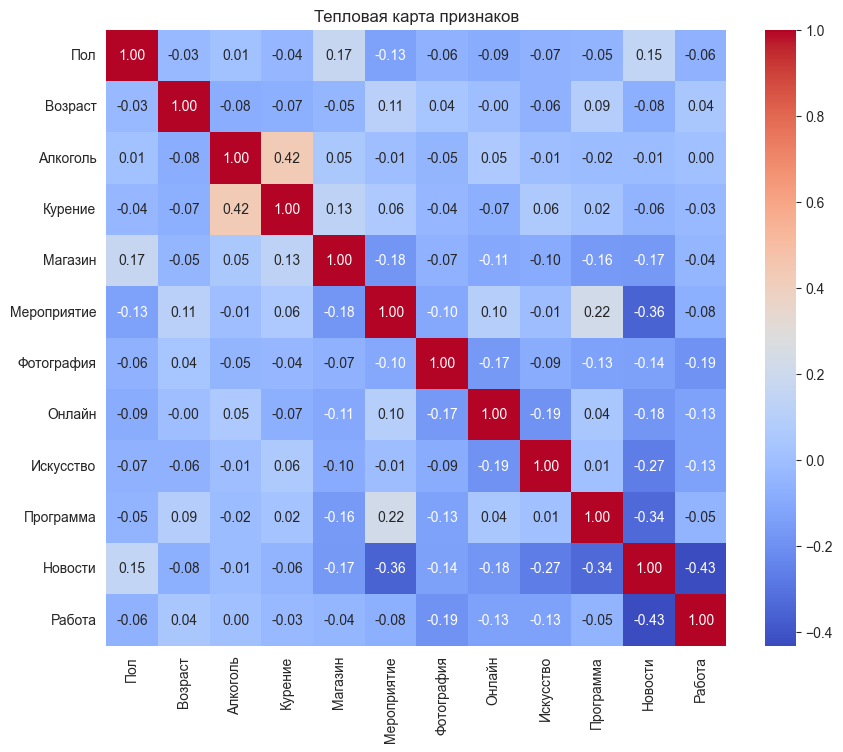

In [132]:
# –°–æ–∑–¥–∞–µ–º —Ç–µ–ø–ª–æ–≤—É—é –∫–∞—Ä—Ç—É
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('–¢–µ–ø–ª–æ–≤–∞—è –∫–∞—Ä—Ç–∞ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤')
plt.show()

### –ü—Ä–∏–º–µ–Ω–µ–Ω–∏–µ K-means

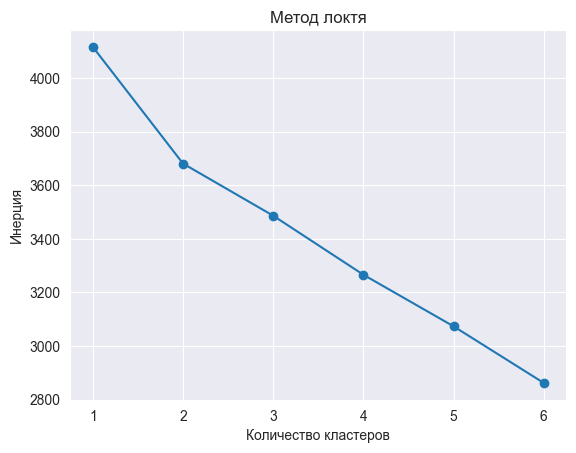

In [133]:
# –ü—É—Å—Ç–æ–π —Å–ø–∏—Å–æ–∫ –¥–ª—è —Å–æ—Ö—Ä–∞–Ω–µ–Ω–∏—è –∑–Ω–∞—á–µ–Ω–∏–π –∏–Ω–µ—Ä—Ü–∏–∏
inertia = []

# –ü—Ä–æ–±—É–µ–º —Ä–∞–∑–Ω–æ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∫–ª–∞—Å—Ç–µ—Ä–æ–≤ –æ—Ç 1 –¥–æ 6
for k in range(1, 7):
    # –°–æ–∑–¥–∞–µ–º –º–æ–¥–µ–ª—å KMeans —Å —Ç–µ–∫—É—â–∏–º –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ–º –∫–ª–∞—Å—Ç–µ—Ä–æ–≤
    model = KMeans(n_clusters=k, random_state=42)
    # –û–±—É—á–∞–µ–º –º–æ–¥–µ–ª—å –Ω–∞ –¥–∞–Ω–Ω—ã—Ö
    model.fit(df)
    # –°–æ—Ö—Ä–∞–Ω—è–µ–º –∑–Ω–∞—á–µ–Ω–∏–µ –∏–Ω–µ—Ä—Ü–∏–∏ –¥–ª—è —Ç–µ–∫—É—â–µ–≥–æ —á–∏—Å–ª–∞ –∫–ª–∞—Å—Ç–µ—Ä–æ–≤
    inertia.append(model.inertia_)

# –°—Ç—Ä–æ–∏–º –≥—Ä–∞—Ñ–∏–∫ –º–µ—Ç–æ–¥–∞ –ª–æ–∫—Ç—è
plt.plot(range(1, 7), inertia, marker='o')
plt.xlabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∫–ª–∞—Å—Ç–µ—Ä–æ–≤')
plt.ylabel('–ò–Ω–µ—Ä—Ü–∏—è')
plt.title('–ú–µ—Ç–æ–¥ –ª–æ–∫—Ç—è')
plt.show()

In [134]:
model = KMeans(n_clusters=6)
model.fit(df)

KMeans(n_clusters=6)

In [135]:
old_df["–ì—Ä—É–ø–ø–∞"] = model.labels_

old_df

–ü–æ–¥–ø–∏—Å—á–∏–∫–∏  –û–±—â–∏–µ –¥—Ä—É–∑—å—è  –ü–æ–ª        –ò–º—è      –§–∞–º–∏–ª–∏—è  –í–æ–∑—Ä–∞—Å—Ç  \
id                                                                         
800367           741             2    2    –í–∏—Ç–∞–ª–∏–π      –ß–æ–±–æ—Ç–æ–∫     38.0   
3677059          309             3    1  –ê–Ω–∞—Å—Ç–∞—Å–∏—è       –ú–µ—Ö–æ–≤–∞     38.0   
5243790          703             3    2    –î–º–∏—Ç—Ä–∏–π        –§–µ–¥–∏–Ω     38.0   
8888273         1389             0    2    –ï–≤–≥–µ–Ω–∏–π      –í—ã—Å–æ–∫–æ–≤     38.0   
10738440         530             1    2     –ù–∏–∫–∏—Ç–∞        –ì–∞–ø–æ–Ω     25.0   
...              ...           ...  ...        ...          ...      ...   
1679360          795             1    2  –ê–ª–µ–∫—Å–∞–Ω–¥—Ä     –ì–æ–Ω—á–∞—Ä–æ–≤     38.0   
1685737         4384             1    1      –û–ª—å–≥–∞    –¢—Ä–æ—Ñ–∏–º–æ–≤–∞     38.0   
1688008         1402             1    1      –ò—Ä–∏–Ω–∞    –ú–∏—Ö–∞–π–ª–æ–≤–∞     38.0   
1703036          407             1    2      –ê–π–¥–∞—Ä  –ê–±–¥—Ä–∞—Ö–º–∞–Ω–æ–≤     38.0   
1724359         2170             1    2     –ê–Ω–¥—Ä–µ–π        –õ–∏–¥–µ—Ä     38.0   

          –ê–ª–∫–æ–≥–æ–ª—å  –ö—É—Ä–µ–Ω–∏–µ  –ú–∞–≥–∞–∑–∏–Ω  –ú–µ—Ä–æ–ø—Ä–∏—è—Ç–∏–µ  –§–æ—Ç–æ–≥—Ä–∞—Ñ–∏—è  –û–Ω–ª–∞–π–Ω  \
id                                                                      
800367         3.0      3.0      0.0         11.0        28.0     6.0   
3677059        3.0      3.0      0.0         19.0         0.0     0.0   
5243790        3.0      3.0     17.0          2.0        13.0     6.0   
8888273        3.0      3.0      2.0          9.0         9.0     2.0   
10738440       3.0      3.0     12.0          1.0         5.0    11.0   
...            ...      ...      ...          ...         ...     ...   
1679360        3.0      3.0      5.0         11.0         4.0     3.0   
1685737        3.0      3.0      4.0          8.0        18.0     7.0   
1688008        3.0      3.0      6.0         15.0         5.0     3.0   
1703036        3.0      3.0      0.0          9.0         3.0     6.0   
1724359        3.0      3.0      3.0          5.0        16.0     0.0   

          –ò—Å–∫—É—Å—Å—Ç–≤–æ  –ü—Ä–æ–≥—Ä–∞–º–º–∞  –ù–æ–≤–æ—Å—Ç–∏  –†–∞–±–æ—Ç–∞  –ì—Ä—É–ø–ø–∞  
id                                                       
800367         17.0        0.0     17.0    22.0       3  
3677059         0.0       12.0     23.0    46.0       0  
5243790         0.0        2.0     39.0    20.0       1  
8888273         0.0        0.0     58.0    19.0       1  
10738440        2.0        2.0     42.0    25.0       1  
...             ...        ...      ...     ...     ...  
1679360         6.0        7.0     47.0    18.0       1  
1685737        20.0        7.0     19.0    16.0       0  
1688008        21.0       23.0      5.0    22.0       4  
1703036        39.0        6.0     21.0    15.0       3  
1724359         5.0        3.0     41.0    27.0       1  

[343 rows x 17 columns]

In [136]:
old_df['–ì—Ä—É–ø–ø–∞'].value_counts()

–ì—Ä—É–ø–ø–∞
0    99
1    92
5    45
2    38
4    36
3    33
Name: count, dtype: int64

In [137]:
# –°–ø–∏—Å–æ–∫ —Å—Ç–æ–ª–±—Ü–æ–≤, –¥–ª—è –∫–æ—Ç–æ—Ä—ã—Ö –Ω—É–∂–Ω–æ –≤—ã—á–∏—Å–ª–∏—Ç—å —Å—Ä–µ–¥–Ω–µ–µ –∑–Ω–∞—á–µ–Ω–∏–µ
columns_to_mean = ['–ü–æ–¥–ø–∏—Å—á–∏–∫–∏', '–û–±—â–∏–µ –¥—Ä—É–∑—å—è', '–ü–æ–ª', '–í–æ–∑—Ä–∞—Å—Ç',                   '–ê–ª–∫–æ–≥–æ–ª—å', '–ö—É—Ä–µ–Ω–∏–µ',
                   '–ú–∞–≥–∞–∑–∏–Ω', '–ú–µ—Ä–æ–ø—Ä–∏—è—Ç–∏–µ', '–§–æ—Ç–æ–≥—Ä–∞—Ñ–∏—è', '–û–Ω–ª–∞–π–Ω',
                   '–ò—Å–∫—É—Å—Å—Ç–≤–æ', '–ü—Ä–æ–≥—Ä–∞–º–º–∞', '–ù–æ–≤–æ—Å—Ç–∏', '–ì—Ä—É–ø–ø–∞','–†–∞–±–æ—Ç–∞']

# –ì—Ä—É–ø–ø–∏—Ä–æ–≤–∫–∞ –¥–∞–Ω–Ω—ã—Ö –ø–æ —Å—Ç–æ–ª–±—Ü—É '–ì—Ä—É–ø–ø–∞' –∏ –≤—ã—á–∏—Å–ª–µ–Ω–∏–µ —Å—Ä–µ–¥–Ω–∏—Ö –∑–Ω–∞—á–µ–Ω–∏–π –¥–ª—è –∫–∞–∂–¥–æ–π –≥—Ä—É–ø–ø—ã
mean_df = old_df.groupby('–ì—Ä—É–ø–ø–∞')[columns_to_mean].mean()

mean_df

–ü–æ–¥–ø–∏—Å—á–∏–∫–∏  –û–±—â–∏–µ –¥—Ä—É–∑—å—è       –ü–æ–ª    –í–æ–∑—Ä–∞—Å—Ç  –ê–ª–∫–æ–≥–æ–ª—å   –ö—É—Ä–µ–Ω–∏–µ  \
–ì—Ä—É–ø–ø–∞                                                                       
0       1584.282828      6.010101  1.070707  35.151515  3.020202  2.979798   
1        889.717391      9.945652  1.663043  36.717391  3.032609  2.978261   
2        855.657895      5.552632  1.947368  32.026316  3.210526  3.394737   
3       2524.545455      2.272727  1.757576  35.636364  3.000000  2.969697   
4       1838.888889      6.416667  1.666667  38.472222  3.027778  3.027778   
5       1073.422222      7.888889  1.911111  33.955556  2.822222  2.377778   

          –ú–∞–≥–∞–∑–∏–Ω  –ú–µ—Ä–æ–ø—Ä–∏—è—Ç–∏–µ  –§–æ—Ç–æ–≥—Ä–∞—Ñ–∏—è     –û–Ω–ª–∞–π–Ω  –ò—Å–∫—É—Å—Å—Ç–≤–æ  –ü—Ä–æ–≥—Ä–∞–º–º–∞  \
–ì—Ä—É–ø–ø–∞                                                                        
0        5.191919    12.868687   11.636364  10.818182   8.404040   6.282828   
1        3.815217     3.978261   10.217391   6.608696   3.173913   2.184783   
2       27.684211     3.710526    7.631579   7.052632   5.184211   2.000000   
3        4.181818     8.787879    7.030303   4.363636  31.484848   5.757576   
4        4.611111    13.638889    6.527778  10.138889   5.166667  24.361111   
5        5.133333     4.000000    7.155556  10.755556   3.133333   4.866667   

          –ù–æ–≤–æ—Å—Ç–∏  –ì—Ä—É–ø–ø–∞     –†–∞–±–æ—Ç–∞  
–ì—Ä—É–ø–ø–∞                                
0       20.454545     0.0  24.252525  
1       54.565217     1.0  15.445652  
2       28.315789     2.0  18.500000  
3       21.848485     3.0  16.727273  
4       20.277778     4.0  15.388889  
5       24.577778     5.0  40.333333

<Axes: xlabel='–ì—Ä—É–ø–ø–∞'>

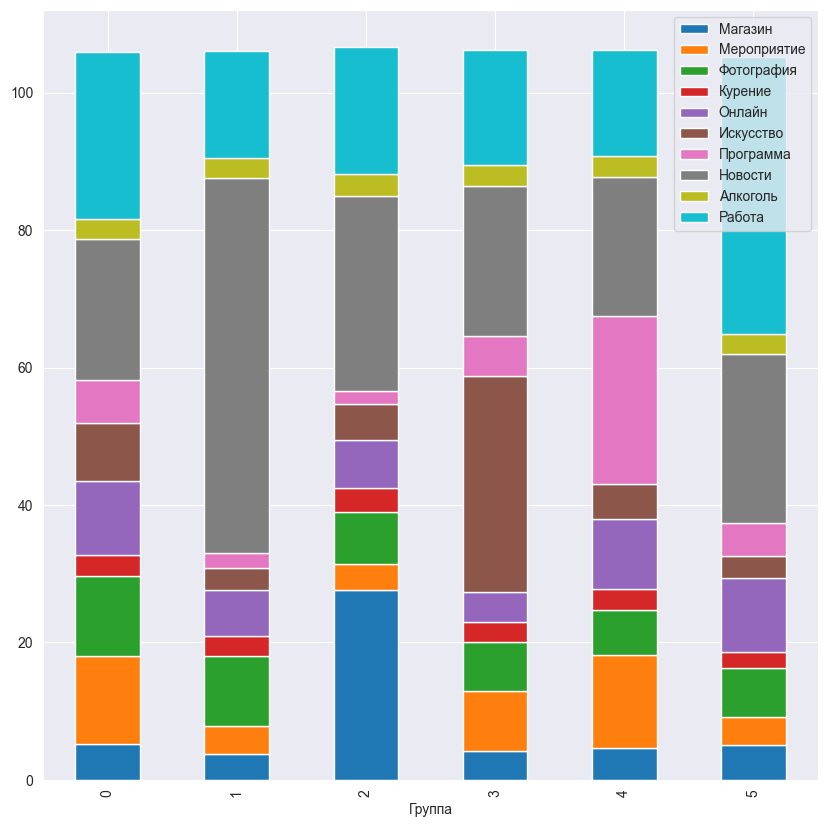

In [138]:
# –ü—Ä–∏–º–µ–Ω–µ–Ω–∏–µ reset_index() –¥–ª—è –ø–æ–ª—É—á–µ–Ω–∏—è DataFrame –±–µ–∑ –∏–Ω–¥–µ–∫—Å–∞
mean_df_reset = mean_df.reset_index(drop=True)

# –î–æ–±–∞–≤–ª–µ–Ω–∏–µ —Å—Ç–æ–ª–±—Ü–∞ '–ì—Ä—É–ø–ø–∞'
mean_df_reset['–ì—Ä—É–ø–ø–∞'] = mean_df.index

# –í—ã–±–æ—Ä –Ω—É–∂–Ω—ã—Ö —Å—Ç–æ–ª–±—Ü–æ–≤ –∏ –ø–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ —Å—Ç–æ–ª–±—á–∞—Ç–æ–π –¥–∏–∞–≥—Ä–∞–º–º—ã
mean_df_reset[
    [
        '–ì—Ä—É–ø–ø–∞', '–ú–∞–≥–∞–∑–∏–Ω', '–ú–µ—Ä–æ–ø—Ä–∏—è—Ç–∏–µ', '–§–æ—Ç–æ–≥—Ä–∞—Ñ–∏—è', '–ö—É—Ä–µ–Ω–∏–µ',
        '–û–Ω–ª–∞–π–Ω', '–ò—Å–∫—É—Å—Å—Ç–≤–æ', '–ü—Ä–æ–≥—Ä–∞–º–º–∞', '–ù–æ–≤–æ—Å—Ç–∏', '–ê–ª–∫–æ–≥–æ–ª—å', '–†–∞–±–æ—Ç–∞'
    ]
].plot.bar(
    x='–ì—Ä—É–ø–ø–∞',  # –ò—Å–ø–æ–ª—å–∑—É–µ–º —Å—Ç–æ–ª–±–µ—Ü '–ì—Ä—É–ø–ø–∞' –≤ –∫–∞—á–µ—Å—Ç–≤–µ –æ—Å–∏ x
    stacked=True,
    figsize=(10, 10)
)


In [139]:
# –ò–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∞—Ü–∏—è –ø–æ–ª–æ–≤
old_df.loc[old_df["–ü–æ–ª"] == 1, "–ü–æ–ª"] = "–ñ–µ–Ω—Å–∫–∏–π"
old_df.loc[old_df["–ü–æ–ª"] == 2, "–ü–æ–ª"] = "–ú—É–∂—Å–∫–æ–π"

/var/folders/p7/ftvgtpd17gn8nl3x825cfq8m0000gn/T/ipykernel_5391/1195945072.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '–ñ–µ–Ω—Å–∫–∏–π' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  old_df.loc[old_df["–ü–æ–ª"] == 1, "–ü–æ–ª"] = "–ñ–µ–Ω—Å–∫–∏–π"


In [143]:
clusters = {
    "–†–∞–±–æ—Ç–∞ –∏ –ù–æ–≤–æ—Å—Ç–∏": old_df[old_df["–ì—Ä—É–ø–ø–∞"] == 0],
    "–ù–æ–≤–æ—Å—Ç–∏": old_df[old_df["–ì—Ä—É–ø–ø–∞"] == 1],
    "–ú–∞–≥–∞–∑–∏–Ω –∏ –†–∞–±–æ—Ç–∞": old_df[old_df["–ì—Ä—É–ø–ø–∞"] == 2],
    "–ò—Å–∫—É—Å—Å—Ç–≤–æ": old_df[old_df["–ì—Ä—É–ø–ø–∞"] == 3],
    "–ü—Ä–æ–≥—Ä–∞–º–º–∞": old_df[old_df["–ì—Ä—É–ø–ø–∞"] == 4],
    "–†–∞–±–æ—Ç–∞": old_df[old_df["–ì—Ä—É–ø–ø–∞"] == 5],
    }

## –ü–æ–¥–±–æ—Ä —Ü–µ–ª–µ–≤–æ–π –∞—É–¥–∏—Ç–æ—Ä–∏–∏

In [144]:
interests_dropdown = widgets.Dropdown(
    options=clusters.keys(),
    value=list(clusters.keys())[0],
    description="–ò–Ω—Ç–µ—Ä–µ—Å—ã:"
    )

age_dropdown = widgets.Dropdown(
    options=["–õ—é–±–æ–π", "–¢–æ–ª—å–∫–æ 18+"],
    value="–õ—é–±–æ–π",
    description="–í–æ–∑—Ä–∞—Å—Ç:"
    )

gender_dropdown = widgets.Dropdown(
    options=["–õ—é–±–æ–π", "–ú—É–∂—Å–∫–æ–π", "–ñ–µ–Ω—Å–∫–∏–π"],
    value="–õ—é–±–æ–π",
    description="–ü–æ–ª:"
    )

generate_button = widgets.Button(description='–°—Ñ–æ—Ä–º–∏—Ä–æ–≤–∞—Ç—å —Å–ø–∏—Å–æ–∫')

def filter_data(_):
    selected_cluster = clusters[interests_dropdown.value]
    if age_dropdown.value == "–¢–æ–ª—å–∫–æ 18+":
        selected_cluster = selected_cluster[selected_cluster["–í–æ–∑—Ä–∞—Å—Ç"] >= 18]
    if gender_dropdown.value != "–õ—é–±–æ–π":
        selected_cluster = selected_cluster[selected_cluster["–ü–æ–ª"] == gender_dropdown.value]
    print(selected_cluster[["–ò–º—è", "–§–∞–º–∏–ª–∏—è", "–í–æ–∑—Ä–∞—Å—Ç", "–ü–æ–ª"]])
    print(list(selected_cluster.index))

generate_button.on_click(filter_data)

widgets.VBox([interests_dropdown, age_dropdown, gender_dropdown, generate_button])

In [142]:
import ipywidgets as widgets

# –ü—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ –¥–∞–Ω–Ω—ã—Ö –≤ —Å–ø–∏—Å–æ–∫ —Å—Ç—Ä–æ–∫
users_list = old_df['–§–∞–º–∏–ª–∏—è'].tolist()

# –°–æ–∑–¥–∞–Ω–∏–µ –≤–∏–¥–∂–µ—Ç–∞ –≤—ã–ø–∞–¥–∞—é—â–µ–≥–æ —Å–ø–∏—Å–∫–∞ –¥–ª—è –≤—ã–±–æ—Ä–∞ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è
user_dropdown = widgets.Dropdown(options=users_list, description="–ü–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—å:")

# –°–æ–∑–¥–∞–Ω–∏–µ —Ñ—É–Ω–∫—Ü–∏–∏ –¥–ª—è —Ñ–∏–ª—å—Ç—Ä–∞—Ü–∏–∏ –¥–∞–Ω–Ω—ã—Ö –∏ –≤—ã–≤–æ–¥–∞ –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–∏ –æ –∫–ª–∞—Å—Ç–µ—Ä–µ
def filter_data(_):
    user = user_dropdown.value
    # –ó–¥–µ—Å—å –≤—ã –º–æ–∂–µ—Ç–µ –ø–æ–ª—É—á–∏—Ç—å –∏–Ω–¥–µ–∫—Å –≤—ã–±—Ä–∞–Ω–Ω–æ–≥–æ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è –≤ —Å–ø–∏—Å–∫–µ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π
    user_index = users_list.index(user)
    # –ò –∑–∞—Ç–µ–º –ø–æ–ª—É—á–∏—Ç—å –∑–Ω–∞—á–µ–Ω–∏–µ –∫–ª–∞—Å—Ç–µ—Ä–∞ –∏–∑ —Å–ª–æ–≤–∞—Ä—è –ø–æ –∏–Ω–¥–µ–∫—Å—É
    cluster_name = list(clusters.keys())[user_index]
    print(f"–†–µ–∫–æ–º–µ–Ω–¥–∞—Ü–∏–∏ –¥–ª—è –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è {user}: {cluster_name}")

# –°–æ–∑–¥–∞–Ω–∏–µ –∫–Ω–æ–ø–∫–∏ "–°—Ñ–æ—Ä–º–∏—Ä–æ–≤–∞—Ç—å —Å–ø–∏—Å–æ–∫"
generate_button = widgets.Button(description='–°—Ñ–æ—Ä–º–∏—Ä–æ–≤–∞—Ç—å —Å–ø–∏—Å–æ–∫')
generate_button.on_click(filter_data)

# –û—Ç–æ–±—Ä–∞–∂–µ–Ω–∏–µ –≤–∏–¥–∂–µ—Ç–æ–≤ –≤–µ—Ä—Ç–∏–∫–∞–ª—å–Ω–æ
widgets.VBox([user_dropdown, generate_button])
